<a href="https://colab.research.google.com/github/KaylumCassidy/BMCA3/blob/main/Predicting_Wind_Energy_Generation__C20323831_FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting wind energy generation to enable transmission system operator (TSO) supply planning.**

This dissertation focuses on using high-frequency short-term weather forecasting to predict wind production in Ireland. The aim is to prepare microgrid control systems for periods of low wind power generation, crucial for stabilizing the country's energy mix. Clear objectives include testing predictive analytical techniques, finding the most accurate model algorithm, determining influential weather variables, and validating against existing models

## Irish weather data

### Import libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import io
import requests

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from datetime import tzinfo, timedelta, datetime
minDate = "2017-01-01 00:00:00"

In [ ]:
  # This Python 3 environment comes with many helpful analytics libraries installed
  # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
  # For example, here's several helpful packages to load in

  import numpy as np # linear algebra
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

  import io
  import requests

  import plotly.offline as py
  py.init_notebook_mode(connected=True)
  import plotly.graph_objs as go
  from plotly import tools
  import plotly.figure_factory as ff
  from plotly.subplots import make_subplots

  import warnings
  warnings.filterwarnings('ignore')

  import matplotlib.pyplot as plt
  plt.style.use('seaborn-whitegrid')

  from datetime import tzinfo, timedelta, datetime, date

In [ ]:
minDate = "2017-01-01 00:00:00"

### Loading MerEire dataset 2017-2023

This dataset is from MetEire website form 2017-2023 I choose 7 weather station(Dublin Airport, Shannon Airport, Mayo, Donegal, Galway, Cork) each recroding every hour of evvery day. (Dataset colm meaning in photo below)

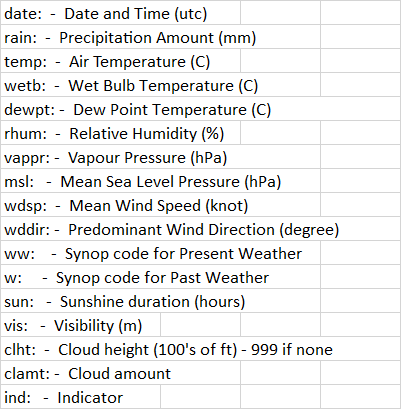![image.png]()

**CORK**

In [ ]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/CorkAirport.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
corkairportds = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(corkairportds.columns)

# Convert the 'date' column to datetime format
corkairportds['date'] = pd.to_datetime(corkairportds['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
corkairportds['wdsp'].replace(to_replace=' ', value=0, inplace=True)
corkairportds['wdsp'] = corkairportds['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
corkairportds = corkairportds[corkairportds['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


**Shannon Airport**

In [ ]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/ShannonAirport.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
shannonAirport = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(shannonAirport.columns)

# Convert the 'date' column to datetime format
shannonAirport['date'] = pd.to_datetime(shannonAirport['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
shannonAirport['wdsp'].replace(to_replace=' ', value=0, inplace=True)
shannonAirport['wdsp'] = shannonAirport['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
shannonAirport = shannonAirport[shannonAirport['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


**Galway**

In [ ]:
import pandas as pd
import requests
from io import StringIO


github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/Galway.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
galway = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(galway.columns)

# Convert the 'date' column to datetime format
galway['date'] = pd.to_datetime(galway['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
galway['wdsp'].replace(to_replace=' ', value=0, inplace=True)
galway['wdsp'] = galway['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
galway = galway[galway['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype='object')


**Dublin Airport**

In [ ]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/DublinAirport.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
dublinairportds = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(dublinairportds.columns)

# Convert the 'date' column to datetime format
dublinairportds['date'] = pd.to_datetime(dublinairportds['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
dublinairportds['wdsp'].replace(to_replace=' ', value=0, inplace=True)
dublinairportds['wdsp'] = dublinairportds['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
dublinairportds = dublinairportds[dublinairportds['date'] >= minDate]


Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


In [ ]:
dublinairportds.describe()

ind          rain         ind.1          temp         ind.2  \
count  61345.000000  61345.000000  61345.000000  61345.000000  61345.000000   
mean       0.493765      0.087166      0.019594     10.113817      0.027614   
std        0.980092      0.420248      0.138602      5.062082      0.163866   
min        0.000000      0.000000      0.000000     -5.600000      0.000000   
25%        0.000000      0.000000      0.000000      6.600000      0.000000   
50%        0.000000      0.000000      0.000000     10.100000      0.000000   
75%        0.000000      0.000000      0.000000     13.700000      0.000000   
max        3.000000     13.800000      1.000000     29.100000      1.000000   

               wetb        dewpt         vappr          rhum           msl  \
count  61345.000000  61345.00000  61345.000000  61345.000000  61345.000000   
mean       8.597198      6.93634     10.400083     81.755172   1013.401697   
std        4.457445      4.52180      3.173393     11.991678     12.671529   
min       -5.900000     -8.90000      3.100000     24.000000    961.800000   
25%        5.400000      3.60000      7.900000     74.000000   1005.400000   
50%        8.700000      7.10000     10.100000     84.000000   1014.900000   
75%       12.000000     10.20000     12.500000     91.000000   1022.300000   
max       21.400000     19.50000     22.600000    100.000000   1048.200000   

              ind.3          wdsp         ind.4         wddir            ww  \
count  61345.000000  61345.000000  61345.000000  61345.000000  61345.000000   
mean       2.000065      9.475866      2.000065    206.367919     14.756769   
std        0.011420      4.681316      0.011420     81.329671     22.707006   
min        2.000000      0.000000      2.000000      0.000000      1.000000   
25%        2.000000      6.000000      2.000000    140.000000      2.000000   
50%        2.000000      9.000000      2.000000    230.000000      2.000000   
75%        2.000000     12.000000      2.000000    270.000000     21.000000   
max        4.000000     44.000000      4.000000    360.000000     97.000000   

                  w           sun          clht         clamt  
count  61345.000000  61345.000000  61345.000000  61345.000000  
mean      29.447388      0.169494    286.170055      5.583797  
std       26.964605      0.323256    401.147943      2.223360  
min        0.000000      0.000000      0.000000      0.000000  
25%       11.000000      0.000000     24.000000      4.000000  
50%       11.000000      0.000000     50.000000      7.000000  
75%       62.000000      0.100000    250.000000      7.000000  
max       98.000000      1.000000    999.000000      9.000000

**Malin Head(Donengal)**

In [ ]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/Malin%20Head.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
malinHead = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(malinHead.columns)

# Convert the 'date' column to datetime format
malinHead['date'] = pd.to_datetime(malinHead['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
malinHead['wdsp'].replace(to_replace=' ', value=0, inplace=True)
malinHead['wdsp'] = malinHead['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
malinHead = malinHead[malinHead['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype='object')


**BELMULLET**

In [ ]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/BELMULLET.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
belmullet = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(belmullet.columns)

# Convert the 'date' column to datetime format
belmullet['date'] = pd.to_datetime(belmullet['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
belmullet['wdsp'].replace(to_replace=' ', value=0, inplace=True)
belmullet['wdsp'] = belmullet['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
belmullet = belmullet[belmullet['date'] >= minDate]

# Now you can continue with your data analysis or processi

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype='object')


### Merge Irish weather Dataset*

In [ ]:
left = belmullet.set_index(['date']).copy()
right = dublinairportds.set_index(['date'])
#right.index = right.index.tz_convert(None)

newdf = left.join(right, lsuffix="_BEL", rsuffix="_DUB")

right = shannonAirport.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_SHA")

right = corkairportds.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_COR")

right = galway.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_GAL")

right = malinHead.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_DON")

newdf = newdf.reset_index()

In [ ]:

newdf.columns

Index(['date', 'ind_BEL', 'rain_BEL', 'ind.1_BEL', 'temp_BEL', 'ind.2_BEL',
       'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL',
       ...
       'ind.2_DON', 'wetb_DON', 'dewpt_DON', 'vappr_DON', 'rhum_DON',
       'msl_DON', 'ind.3_DON', 'wdsp_DON', 'ind.4_DON', 'wddir_DON'],
      dtype='object', length=103)

In [ ]:

newdf

date  ind_BEL  rain_BEL  ind.1_BEL  temp_BEL  ind.2_BEL  \
0     2017-01-01 00:00:00        0       0.0          0       5.2          0   
1     2017-01-01 01:00:00        0       0.5          0       4.7          0   
2     2017-01-01 02:00:00        0       0.0          0       5.7          0   
3     2017-01-01 03:00:00        0       0.4          0       5.6          0   
4     2017-01-01 04:00:00        0       0.6          0       4.7          0   
...                   ...      ...       ...        ...       ...        ...   
61340 2023-12-31 20:00:00        0       0.1          0       8.2          0   
61341 2023-12-31 21:00:00        0       0.0          0       7.6          0   
61342 2023-12-31 22:00:00        0       0.0          0       7.5          0   
61343 2023-12-31 23:00:00        0       0.1          0       7.4          0   
61344 2024-01-01 00:00:00        0       0.1          0       7.5          0   

       wetb_BEL  dewpt_BEL  vappr_BEL  rhum_BEL  ...  ind.2_DON  wetb_DON  \
0           3.9        2.0        7.1        79  ...          0       4.3   
1           3.4        1.4        6.8        78  ...          0       4.1   
2           3.8        0.7        6.4        70  ...          0       4.1   
3           3.3       -0.6        5.9        64  ...          0       4.5   
4           3.1        0.5        6.3        74  ...          0       4.6   
...         ...        ...        ...       ...  ...        ...       ...   
61340       6.5        4.3        8.3        76  ...          0       6.6   
61341       5.9        3.7        8.0        76  ...          0       6.2   
61342       5.9        3.6        7.9        76  ...          0       6.6   
61343       5.7        3.4        7.8        75  ...          0       6.3   
61344       6.0        3.9        8.1        77  ...          0       5.9   

       dewpt_DON  vappr_DON  rhum_DON  msl_DON  ind.3_DON  wdsp_DON  \
0            1.4        6.7        70   1020.6          2      19.0   
1            2.2        7.2        80   1021.1          2      22.0   
2            1.0        6.6        69   1021.6          2      24.0   
3            1.6        6.8        70   1022.0          2      23.0   
4            1.7        6.9        71   1022.4          2      27.0   
...          ...        ...       ...      ...        ...       ...   
61340        5.6        9.1        89    985.0          2      25.0   
61341        5.2        8.8        88    986.4          2      32.0   
61342        5.3        8.9        85    988.0          2      27.0   
61343        4.4        8.4        79    988.7          2      23.0   
61344        3.7        8.0        77    989.8          2      24.0   

       ind.4_DON  wddir_DON  
0              2        340  
1              2        340  
2              2        350  
3              2        360  
4              2        360  
...          ...        ...  
61340          2        300  
61341          2        310  
61342          2        320  
61343          2        310  
61344          2        300  

[61345 rows x 103 columns]

In [ ]:
newdf['wdsp_BEL'].describe()

count    61345.000000
mean        11.884114
std          6.536866
min          0.000000
25%          7.000000
50%         11.000000
75%         16.000000
max         45.000000
Name: wdsp_BEL, dtype: float64

In [ ]:

newdf.to_csv("IrelandWeatherData.csv", index=False)

## Eirgrid data

### Import libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import io
import requests


from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from datetime import tzinfo, timedelta, datetime, date

# Any results you write to the current directory are saved as output.

import plotly.express as px
import seaborn as sns

### Data Scraping Eirgrid data

This data was scape form EirGrid Dashbored - https://www.smartgriddashboard.com/#all/wind

**Eirgrid Wind generation**

In [ ]:

#sample_url  = 'https://www.smartgriddashboard.com/DashboardService.svc/data?area=windactual&region=ALL&datefrom=01-Jan-2022+00%3A00&dateto=31-Jan-2023+23%3A59'

sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jan-2018%2000:00&dateto=31-Jan-2018%2023:59'

url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-'
url_mid = '%2000:00&dateto='
url_end = '%2023:59'

years = ['2017', '2018', '2019', '2020', '2021']
  #years = ['2020', '2021']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
endDay= [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
tempds = []
months_years = []

for year in years:
    i = 0
    for month in months:
      # Stop after Aug 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29

      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)


wgds = pd.concat(tempds, keys=months_years)

wgds = wgds.reset_index()
wgds = wgds.drop('level_0', axis=1)
wgds = wgds.drop('level_1', axis=1)
wgds = wgds.drop('DATE & TIME', axis=1)



http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jul-2017%2000:00&datet

**Eirgrid Actual System Generation**

In [ ]:

  # Wind energy Actual and Prediction
sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=23-Jan-2021%2000:00&dateto=21-Feb-2021%2001:15'

url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-'

tempds = []
months_years = []

for year in years:
    i = 0
    for month in months:
      # Stop after Feb 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29

      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)
      #url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Dec-2020%2000:00&dateto=31-Dec-2020%2023:59'


sgds = pd.concat(tempds, keys=months_years)

sgds = sgds.reset_index()
sgds = sgds.drop('level_0', axis=1)
sgds = sgds.drop('level_1', axis=1)
sgds = sgds.drop('DATE & TIME', axis=1)

http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&reg

**System Demand: Actual and Prediction**

In [ ]:
  # Demand Actual and Prediction
sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=18-Jan-2021%2000:00&dateto=16-Feb-2021%2023:59'
url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-'

i = 0
tempds = []

for year in years:
    i = 0
    for month in months:
       # Stop after Feb 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29
      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)

sdds = pd.concat(tempds, keys=months_years)
sdds = sdds.reset_index()
sdds = sdds.drop('level_0', axis=1)
sdds = sdds.drop('level_1', axis=1)
sdds = sdds.drop('DATE & TIME', axis=1)

http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Jul-2017

In [ ]:


  # Interconnections Actual and Prediction
sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=27-Jan-2021%2000:00&dateto=25-Feb-2021%2022:00'
url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-'

url_mid = '%2000:00&dateto='
url_end = '%2023:59'

tempds = []
months_years = []

i = 0
tempds = []

for year in years:
    i = 0
    for month in months:
      # Stop after Feb 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29
      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)

icds = pd.concat(tempds, keys=months_years)
icds = icds.reset_index()
icds = icds.drop('level_0', axis=1)
icds = icds.drop('level_1', axis=1)
icds = icds.drop('DATE & TIME', axis=1)


http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL

### Merge all of EirGrid data based on Date

In [ ]:

left = sdds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
middle = wgds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
right = sgds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
  #right.index = right.index.tz_convert(None)

newdf2 = left.join(middle)
newdf2 = newdf2.join(right)
newdf2 = newdf2.reset_index()

newdf2 = newdf2.rename(columns={' ACTUAL DEMAND(MW)' : 'ActualDemandMW'})
newdf2 = newdf2.rename(columns={'  ACTUAL WIND(MW)' : 'ActualWindMW'})

newdf2 = newdf2.rename(columns={' FORECAST WIND(MW)' : 'ForecastWndMW'})
newdf2 = newdf2.rename(columns={' ACTUAL GENERATION(MW)' : 'ActualGenerationMW'})


  # Region doesn't apply to Interconnections
left = newdf2.set_index(['date', 'Year', 'Month', 'DayTime'])
right = icds.set_index(['date', 'Year', 'Month', 'DayTime'])
newdf2 = left.join(right)
newdf2 = newdf2.reset_index()
newdf2 = newdf2.rename(columns={' NET TOTAL(MW)': 'NetTotal_MW'})
newdf2 = newdf2.rename(columns={' EWIC(MW)': 'EWIC_MW'})
newdf2 = newdf2.rename(columns={' MOYLE(MW)': 'MOYLE_MW'})

newdf2.to_csv("IslandElectricityOnly2017_2020v3.csv")


def settimeatt(row):
    row["hour"] = row.date.hour
    row["isweekday"] = (row.date.isoweekday() < 6)
    row["month"] = row.date.month
    row["year"] = row.date.year
    return row
newdf2 = newdf2.apply(settimeatt, axis='columns')

newdf2.head()

date  Year Month    DayTime      REGION  ActualDemandMW  \
0 2017-01-01 00:00:00  2017   Jan  01, 00:00  All Island          3696.0   
1 2017-01-01 00:15:00  2017   Jan  01, 00:15  All Island          3661.0   
2 2017-01-01 00:30:00  2017   Jan  01, 00:30  All Island          3622.0   
3 2017-01-01 00:45:00  2017   Jan  01, 00:45  All Island          3492.0   
4 2017-01-01 01:00:00  2017   Jan  01, 01:00  All Island          3457.0   

    FORECAST DEMAND(MW)  ForecastWndMW  ActualWindMW  ActualGenerationMW  \
0                   NaN         1172.0        1214.0              4126.0   
1                   NaN         1198.0        1168.0              4184.0   
2                   NaN         1224.0        1131.0              4187.0   
3                   NaN         1250.0        1025.0              4059.0   
4                   NaN         1280.0        1123.0              4094.0   

   NetTotal_MW  EWIC_MW  MOYLE_MW  hour  isweekday  month  year  
0       -448.0   -170.0    -278.0     0      False      1  2017  
1       -541.0   -244.0    -297.0     0      False      1  2017  
2       -583.0   -286.0    -297.0     0      False      1  2017  
3       -585.0   -287.0    -298.0     0      False      1  2017  
4       -584.0   -287.0    -297.0     1      False      1  2017

In [ ]:
  #fileP = 'IslandElectricityOnly2017_2020v3.csv'
fileP = 'IslandElectricityOnly2017_2020v3.csv'
newdf = pd.read_csv(fileP, parse_dates=[1])

newdf["hour"] = 0
newdf["isweekday"] = False
newdf["month"] = 0
newdf["year"] = 0

def settimeatt(row):
    row["hour"] = row.date.hour
    row["isweekday"] = (row.date.isoweekday() < 6)
    row["month"] = row.date.month
    row["year"] = row.date.year
    return row
newdf = newdf.apply(settimeatt, axis='columns')

newdf.head()

Unnamed: 0                date  Year Month    DayTime      REGION  \
0           0 2017-01-01 00:00:00  2017   Jan  01, 00:00  All Island   
1           1 2017-01-01 00:15:00  2017   Jan  01, 00:15  All Island   
2           2 2017-01-01 00:30:00  2017   Jan  01, 00:30  All Island   
3           3 2017-01-01 00:45:00  2017   Jan  01, 00:45  All Island   
4           4 2017-01-01 01:00:00  2017   Jan  01, 01:00  All Island   

   ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ActualWindMW  \
0          3696.0                   NaN         1172.0        1214.0   
1          3661.0                   NaN         1198.0        1168.0   
2          3622.0                   NaN         1224.0        1131.0   
3          3492.0                   NaN         1250.0        1025.0   
4          3457.0                   NaN         1280.0        1123.0   

   ActualGenerationMW  NetTotal_MW  EWIC_MW  MOYLE_MW  hour  isweekday  month  \
0              4126.0       -448.0   -170.0    -278.0     0      False      1   
1              4184.0       -541.0   -244.0    -297.0     0      False      1   
2              4187.0       -583.0   -286.0    -297.0     0      False      1   
3              4059.0       -585.0   -287.0    -298.0     0      False      1   
4              4094.0       -584.0   -287.0    -297.0     1      False      1   

   year  
0  2017  
1  2017  
2  2017  
3  2017  
4  2017

In [ ]:
newdf.columns

Index(['Unnamed: 0', 'date', 'Year', 'Month', 'DayTime', ' REGION',
       'ActualDemandMW', ' FORECAST DEMAND(MW)', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year'],
      dtype='object')

In [ ]:

# Checking how many months do we have in our dataset (if the year is complete)
newdf.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:

print('-----------DATA SIZE -------------')
print(newdf.shape)           # 10 Columns, 35044 rows
count_row = newdf.shape[0]   # 10 Columns
count_col = newdf.shape[1]   # 35044 rows
print('Rows: ', count_row, ', Columns: ', count_col)

print('-----------DATA INFO -------------')
print(newdf.info())

print('-----------DATA MAX Values -------------')
newdf.max()

print('-----------DATA COLUMNS-------------')
columns = newdf.columns.values.tolist()
print (columns)

print('-----------BASIC STATISTICS-------------')
newdf.tail()

-----------DATA SIZE -------------
(166480, 18)
Rows:  166480 , Columns:  18
-----------DATA INFO -------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166480 entries, 0 to 166479
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            166480 non-null  int64         
 1   date                  166480 non-null  datetime64[ns]
 2   Year                  166480 non-null  int64         
 3   Month                 166480 non-null  object        
 4   DayTime               166480 non-null  object        
 5    REGION               166480 non-null  object        
 6   ActualDemandMW        166410 non-null  float64       
 7    FORECAST DEMAND(MW)  0 non-null       float64       
 8   ForecastWndMW         166341 non-null  float64       
 9   ActualWindMW          166410 non-null  float64       
 10  ActualGenerationMW    166410 non-null  float64       
 11  NetTo

Unnamed: 0                date  Year Month    DayTime      REGION  \
166475      166475 2021-09-30 22:45:00  2021   Sep  30, 22:45  All Island   
166476      166476 2021-09-30 23:00:00  2021   Sep  30, 23:00  All Island   
166477      166477 2021-09-30 23:15:00  2021   Sep  30, 23:15  All Island   
166478      166478 2021-09-30 23:30:00  2021   Sep  30, 23:30  All Island   
166479      166479 2021-09-30 23:45:00  2021   Sep  30, 23:45  All Island   

        ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ActualWindMW  \
166475          4168.0                   NaN         3300.0        2416.0   
166476          4041.0                   NaN         3356.0        2409.0   
166477          3901.0                   NaN         3375.0        2462.0   
166478          3797.0                   NaN         3395.0        2567.0   
166479          3705.0                   NaN         3414.0        2532.0   

        ActualGenerationMW  NetTotal_MW  EWIC_MW  MOYLE_MW  hour  isweekday  \
166475              4769.0       -612.0   -294.0    -318.0    22       True   
166476              4674.0       -645.0   -339.0    -306.0    23       True   
166477              4428.0       -535.0   -266.0    -269.0    23       True   
166478              4359.0       -500.0   -191.0    -309.0    23       True   
166479              4278.0       -508.0   -196.0    -312.0    23       True   

        month  year  
166475      9  2021  
166476      9  2021  
166477      9  2021  
166478      9  2021  
166479      9  2021

## Load Weather Data

In [ ]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/IrelandWeatherData.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
weatherData = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(weatherData.columns)

weatherds = pd.read_csv("IrelandWeatherData(2).csv", na_values=" ")

weatherds

Index(['date', 'ind_BEL', 'rain_BEL', 'ind.1_BEL', 'temp_BEL', 'ind.2_BEL',
       'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL',
       ...
       'ind.2_DON', 'wetb_DON', 'dewpt_DON', 'vappr_DON', 'rhum_DON',
       'msl_DON', 'ind.3_DON', 'wdsp_DON', 'ind.4_DON', 'wddir_DON'],
      dtype='object', length=103)


date  ind_BEL  rain_BEL  ind.1_BEL  temp_BEL  ind.2_BEL  \
0      01/01/2017 00:00        0       0.0          0       5.2          0   
1      01/01/2017 01:00        0       0.5          0       4.7          0   
2      01/01/2017 02:00        0       0.0          0       5.7          0   
3      01/01/2017 03:00        0       0.4          0       5.6          0   
4      01/01/2017 04:00        0       0.6          0       4.7          0   
...                 ...      ...       ...        ...       ...        ...   
41612  30/09/2021 20:00        0       0.0          0      13.0          0   
41613  30/09/2021 21:00        0       0.0          0      12.8          0   
41614  30/09/2021 22:00        0       0.2          0      13.0          0   
41615  30/09/2021 23:00        0       1.4          0      11.8          0   
41616  01/10/2021 00:00        0       0.0          0      12.7          0   

       wetb_BEL  dewpt_BEL  vappr_BEL  rhum_BEL  ...  ind.2_DON  wetb_DON  \
0           3.9        2.0        7.1        79  ...          0       4.3   
1           3.4        1.4        6.8        78  ...          0       4.1   
2           3.8        0.7        6.4        70  ...          0       4.1   
3           3.3       -0.6        5.9        64  ...          0       4.5   
4           3.1        0.5        6.3        74  ...          0       4.6   
...         ...        ...        ...       ...  ...        ...       ...   
41612      11.9       10.9       13.1        87  ...          0      11.1   
41613      11.9       11.1       13.2        89  ...          0      10.9   
41614      12.3       11.6       13.7        91  ...          0      10.6   
41615      10.9       10.1       12.3        89  ...          0      11.0   
41616      11.0        9.4       11.8        80  ...          0      10.7   

       dewpt_DON  vappr_DON  rhum_DON  msl_DON  ind.3_DON  wdsp_DON  \
0            1.4        6.7        70   1020.6          2        19   
1            2.2        7.2        80   1021.1          2        22   
2            1.0        6.6        69   1021.6          2        24   
3            1.6        6.8        70   1022.0          2        23   
4            1.7        6.9        71   1022.4          2        27   
...          ...        ...       ...      ...        ...       ...   
41612       10.4       12.6        91   1001.1          2        11   
41613       10.3       12.5        92   1000.4          2         8   
41614       10.1       12.3        93    999.6          2         7   
41615       10.6       12.8        94    998.5          2         8   
41616       10.2       12.5        94    997.0          2        10   

       ind.4_DON  wddir_DON  
0              2      340.0  
1              2      340.0  
2              2      350.0  
3              2      360.0  
4              2      360.0  
...          ...        ...  
41612          2      210.0  
41613          2      200.0  
41614          2      190.0  
41615          2      170.0  
41616          2      180.0  

[41617 rows x 97 columns]

In [ ]:

weatherds.describe()

ind_BEL      rain_BEL  ind.1_BEL      temp_BEL  ind.2_BEL  \
count  41617.0  41617.000000    41617.0  41617.000000    41617.0   
mean       0.0      0.151734        0.0     10.526352        0.0   
std        0.0      0.494055        0.0      4.013934        0.0   
min        0.0      0.000000        0.0     -3.300000        0.0   
25%        0.0      0.000000        0.0      7.700000        0.0   
50%        0.0      0.000000        0.0     10.500000        0.0   
75%        0.0      0.000000        0.0     13.500000        0.0   
max        0.0     10.200000        0.0     28.000000        0.0   

           wetb_BEL     dewpt_BEL     vappr_BEL      rhum_BEL       msl_BEL  \
count  41617.000000  41617.000000  41617.000000  41617.000000  41617.000000   
mean       9.100848      7.490799     10.748379     81.810006   1012.057431   
std        3.813173      4.272689      3.065398     11.207680     13.183539   
min       -4.400000     -9.700000      2.900000     24.000000    959.100000   
25%        6.300000      4.300000      8.300000     74.000000   1003.700000   
50%        9.200000      7.700000     10.500000     84.000000   1013.600000   
75%       12.000000     10.600000     12.800000     91.000000   1021.300000   
max       22.100000     19.400000     22.500000    100.000000   1050.600000   

       ...  ind.2_DON      wetb_DON     dewpt_DON     vappr_DON      rhum_DON  \
count  ...    41617.0  41617.000000  41617.000000  41617.000000  41617.000000   
mean   ...        0.0      8.703477      7.054180     10.439527     81.351107   
std    ...        0.0      3.804861      4.294393      3.015872      9.886587   
min    ...        0.0     -3.000000     -7.900000      3.400000     20.000000   
25%    ...        0.0      5.800000      3.800000      8.000000     75.000000   
50%    ...        0.0      8.700000      7.200000     10.100000     82.000000   
75%    ...        0.0     11.700000     10.300000     12.500000     89.000000   
max    ...        0.0     19.800000     17.900000     20.500000    100.000000   

            msl_DON  ind.3_DON      wdsp_DON     ind.4_DON     wddir_DON  
count  41617.000000    41617.0  41617.000000  41617.000000  41615.000000  
mean    1011.589062        2.0     14.706754      2.000240    199.572510  
std       13.246404        0.0      7.277758      0.034661     86.750518  
min      956.600000        2.0      1.000000      2.000000     10.000000  
25%     1002.900000        2.0      9.000000      2.000000    140.000000  
50%     1013.200000        2.0     14.000000      2.000000    200.000000  
75%     1020.900000        2.0     19.000000      2.000000    260.000000  
max     1051.200000        2.0     48.000000      7.000000    360.000000  

[8 rows x 96 columns]

In [ ]:
# Reduce timeframe 2017-07-01
cutOffDate = "2021-10-01 14:45:00"
weatherds = weatherds[(weatherds.date >= "2017-07-01 00:00:00") & (weatherds.date < cutOffDate)]

In [ ]:
weatherds.isnull().sum()[0:50]

date         0.0
ind_BEL      0.0
rain_BEL     0.0
ind.1_BEL    0.0
temp_BEL     0.0
ind.2_BEL    0.0
wetb_BEL     0.0
dewpt_BEL    0.0
vappr_BEL    0.0
rhum_BEL     0.0
msl_BEL      0.0
ind.3_BEL    0.0
wdsp_BEL     0.0
ind.4_BEL    0.0
wddir_BEL    0.0
ind_DUB      0.0
rain_DUB     0.0
ind.1_DUB    0.0
temp_DUB     0.0
ind.2_DUB    0.0
wetb_DUB     0.0
dewpt_DUB    0.0
vappr_DUB    0.0
rhum_DUB     0.0
msl_DUB      0.0
ind.3_DUB    0.0
wdsp_DUB     0.0
ind.4_DUB    0.0
wddir_DUB    0.0
ww           0.0
w            0.0
sun          0.0
vis          0.0
clht         0.0
clamt        0.0
ind          0.0
rain         0.0
ind.1        0.0
temp         0.0
ind.2        0.0
wetb         0.0
dewpt        0.0
vappr        0.0
rhum         0.0
msl          0.0
ind.3        0.0
wdsp         0.0
ind.4        0.0
wddir        0.0
ww_SHA       0.0
dtype: float64

In [ ]:
weatherds.isnull().sum()[50:120]

w_SHA        0.0
sun_SHA      0.0
vis_SHA      0.0
clht_SHA     0.0
clamt_SHA    0.0
ind_COR      0.0
rain_COR     0.0
ind.1_COR    0.0
temp_COR     0.0
ind.2_COR    0.0
wetb_COR     0.0
dewpt_COR    0.0
vappr_COR    0.0
rhum_COR     0.0
msl_COR      0.0
ind.3_COR    0.0
wdsp_COR     0.0
ind.4_COR    0.0
wddir_COR    0.0
ind_GAL      0.0
rain_GAL     0.0
ind.1_GAL    0.0
temp_GAL     0.0
ind.2_GAL    0.0
wetb_GAL     0.0
dewpt_GAL    0.0
vappr_GAL    0.0
rhum_GAL     0.0
msl_GAL      0.0
ind.3_GAL    0.0
wdsp_GAL     0.0
ind.4_GAL    0.0
wddir_GAL    0.0
ind_DON      0.0
rain_DON     0.0
ind.1_DON    0.0
temp_DON     0.0
ind.2_DON    0.0
wetb_DON     0.0
dewpt_DON    0.0
vappr_DON    0.0
rhum_DON     0.0
msl_DON      0.0
ind.3_DON    0.0
wdsp_DON     0.0
ind.4_DON    0.0
wddir_DON    0.0
dtype: float64

In [ ]:
# Backfill a few missing values
weatherds.fillna(method='ffill', limit=3, inplace=True)

## Merge MetEire and EireGrid dataset

In [ ]:
import pandas as pd

# Assuming df_weather is the DataFrame for the new dataset, and it has the datetime column named 'date'
weatherds['date'] = pd.to_datetime(weatherds['date'])

# Set the 'date' column as the index
weatherds.set_index('date', inplace=True)

# Assuming newdf_hourly is the DataFrame from the previous merging and hourly aggregation
newdf['date'] = pd.to_datetime(newdf['date'])
newdf.set_index('date', inplace=True)

# Merge the two DataFrames based on the 'date' column
merged_df = newdf.join(weatherds)

# Reset the index to have a regular 'date' column
merged_df.reset_index(inplace=True)

# Forward fill missing values
merged_df.fillna(method='ffill', inplace=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv("MergedIslandData.csv", index=False)

## Remove dates between 0:15-0:45 and keep hour mark

converts the 'date' column to datetime format, sets it as the index, resamples the data to an hourly frequency, resets the index, and then prints the head of the resulting DataFrame.

In [ ]:

merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df = merged_df.set_index('date')

# Resample to hourly frequency
merged_df_hourly = merged_df.resample('H').first()

# Reset the index to get back the 'date' column
merged_df_hourly = merged_df_hourly.reset_index()

# Display the head of the new DataFrame
print(merged_df_hourly.head())

                 date  Unnamed: 0  Year Month    DayTime      REGION  \
0 2017-01-01 00:00:00           0  2017   Jan  01, 00:00  All Island   
1 2017-01-01 01:00:00           4  2017   Jan  01, 01:00  All Island   
2 2017-01-01 02:00:00           8  2017   Jan  01, 02:00  All Island   
3 2017-01-01 03:00:00          12  2017   Jan  01, 03:00  All Island   
4 2017-01-01 04:00:00          16  2017   Jan  01, 04:00  All Island   

   ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ActualWindMW  ...  \
0          3696.0                   NaN         1172.0        1214.0  ...   
1          3457.0                   NaN         1280.0        1123.0  ...   
2          3244.0                   NaN         1398.0        1528.0  ...   
3          3005.0                   NaN         1361.0        1612.0  ...   
4          2847.0                   NaN         1364.0        1473.0  ...   

   ind.2_DON  wetb_DON  dewpt_DON  vappr_DON  rhum_DON  msl_DON  ind.3_DON  \
0        NaN       NaN    

So, the combination of resample('H') and first() effectively downsamples the original DataFrame to hourly intervals, choosing the first data point within each hour.

In [ ]:
# Assuming your new DataFrame is named merged_df_hourly
merged_df_hourly.to_csv("HourlyMergedData.csv", index=False)


Dropping unneeded colms

In [ ]:
# Unused indicator numbers
merged_df_hourly = merged_df_hourly.drop(['ind', 'ind.1', 'ind.2', 'ind.3', 'ind.4'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_BEL', 'ind.1_BEL', 'ind.2_BEL', 'ind.3_BEL', 'ind.4_BEL'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_COR', 'ind.1_COR', 'ind.2_COR', 'ind.3_COR', 'ind.4_COR'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_DUB', 'ind.1_DUB', 'ind.2_DUB', 'ind.3_DUB', 'ind.4_DUB'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_GAL', 'ind.1_GAL', 'ind.2_GAL', 'ind.3_GAL', 'ind.4_GAL'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind.2_DON', 'ind.3_DON', 'ind.4_DON'], axis=1)


In [ ]:

merged_df_hourly.head()

date  Unnamed: 0  Year Month    DayTime      REGION  \
0 2017-01-01 00:00:00           0  2017   Jan  01, 00:00  All Island   
1 2017-01-01 01:00:00           4  2017   Jan  01, 01:00  All Island   
2 2017-01-01 02:00:00           8  2017   Jan  01, 02:00  All Island   
3 2017-01-01 03:00:00          12  2017   Jan  01, 03:00  All Island   
4 2017-01-01 04:00:00          16  2017   Jan  01, 04:00  All Island   

   ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ActualWindMW  ...  \
0          3696.0                   NaN         1172.0        1214.0  ...   
1          3457.0                   NaN         1280.0        1123.0  ...   
2          3244.0                   NaN         1398.0        1528.0  ...   
3          3005.0                   NaN         1361.0        1612.0  ...   
4          2847.0                   NaN         1364.0        1473.0  ...   

   rain_DON  ind.1_DON  temp_DON  wetb_DON  dewpt_DON  vappr_DON  rhum_DON  \
0       NaN        NaN       NaN       NaN        NaN        NaN       NaN   
1       NaN        NaN       NaN       NaN        NaN        NaN       NaN   
2       NaN        NaN       NaN       NaN        NaN        NaN       NaN   
3       NaN        NaN       NaN       NaN        NaN        NaN       NaN   
4       NaN        NaN       NaN       NaN        NaN        NaN       NaN   

   msl_DON  wdsp_DON  wddir_DON  
0      NaN       NaN        NaN  
1      NaN       NaN        NaN  
2      NaN       NaN        NaN  
3      NaN       NaN        NaN  
4      NaN       NaN        NaN  

[5 rows x 86 columns]

In [ ]:
# Assuming your new DataFrame is named merged_df_hourly
merged_df_hourly.to_csv("HourlyMergedData.csv", index=False)

In [ ]:

merged_df_hourly.columns

Index(['date', 'Unnamed: 0', 'Year', 'Month', 'DayTime', ' REGION',
       'ActualDemandMW', ' FORECAST DEMAND(MW)', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 'rain_DON', 'ind.1_DON', 'temp_DON'

## Wind capacity

In [ ]:
import pandas as pd

# Assuming the Excel file is uploaded as 'WindInstalledCapacities_MW_Monthly - Sheet1.xlsx'
file_path = 'WindInstalledCapacities_MW_Monthly - Sheet1.csv'

# Specify the engine as 'openpyxl' for reading Excel files
windcap_df = pd.read_csv(file_path)


# Display the first few rows of the DataFrame
windcap_df.head()


YYYY  Mon   Month TSO_IRE DSO_IRE Total_IRE  TSO_NI  DSO_NI Total_NI  \
0  1992  Jan  Jan-92    -       -         -       -       -        -      
1  1992  Feb  Feb-92    -       -         -       -       -        -      
2  1992  Mar  Mar-92    -       -         -       -       -        -      
3  1992  Apr  Apr-92    -       -         -       -       -        -      
4  1992  May  May-92    -       -         -       -       -        -      

    Total  
0    -     
1    -     
2    -     
3    -     
4    -

In [ ]:
windcap_df.tail(10)

YYYY  Mon   Month   TSO_IRE   DSO_IRE Total_IRE TSO_NI    DSO_NI  \
373  2023  Mar  Mar-23  2,277.45  2,292.63  4,570.08  121.1       NaN   
374  2023  Apr  Apr-23  2,295.45  2,292.63  4,588.08  121.1       NaN   
375  2023  May  May-23  2,295.45  2,292.63  4,588.08  121.1       NaN   
376  2023  Jun  Jun-23  2,345.65  2,292.63  4,638.28  121.1       NaN   
377  2023  Jul  Jul-23  2,369.45  2,296.23  4,665.68  121.1       NaN   
378  2023  Aug  Aug-23  2,403.85  2,296.23  4,700.08  121.1       NaN   
379  2023  Sep  Sep-23  2,416.75  2,296.35  4,713.10  121.1       NaN   
380  2023  Oct  Oct-23  2,416.75       NaN       NaN  121.1       NaN   
381  2023  Nov  Nov-23  2,416.75       NaN       NaN  121.1       NaN   
382  2023  Dec  Dec-23  2,416.75       NaN       NaN  121.1  1,243.21   

     Total_NI Total  
373       NaN   NaN  
374       NaN   NaN  
375       NaN   NaN  
376       NaN   NaN  
377       NaN   NaN  
378       NaN   NaN  
379       NaN   NaN  
380       NaN   NaN  
381       NaN   NaN  
382  1,364.31   NaN

In [ ]:
print(windcap_df.columns)


Index(['YYYY', 'Mon', 'Month', 'TSO_IRE', 'DSO_IRE', 'Total_IRE', 'TSO_NI',
       'DSO_NI', 'Total_NI', 'Total'],
      dtype='object')


In [ ]:
# Map abbreviated month names to numerical values
month_mapping = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
}

# Create a new column 'date' by combining 'YYYY' and 'Month' columns
windcap_df['date'] = windcap_df['YYYY'].astype(str) + '-' + windcap_df['Month'].map(month_mapping)

# Display the first few rows of the DataFrame
print(windcap_df.head())


   YYYY  Mon   Month TSO_IRE DSO_IRE Total_IRE  TSO_NI  DSO_NI Total_NI  \
0  1992  Jan  Jan-92    -       -         -       -       -        -      
1  1992  Feb  Feb-92    -       -         -       -       -        -      
2  1992  Mar  Mar-92    -       -         -       -       -        -      
3  1992  Apr  Apr-92    -       -         -       -       -        -      
4  1992  May  May-92    -       -         -       -       -        -      

    Total date  
0    -     NaN  
1    -     NaN  
2    -     NaN  
3    -     NaN  
4    -     NaN  


In [ ]:

windcapa_P = '/content/WindInstalledCapacities_MW_Monthly - Sheet1 (1).csv'
windcapa_df = pd.read_csv(windcapa_P, header=3, na_values=['-   ', "  -   "],
                          skipinitialspace=True, thousands=",")

In [ ]:

windcapa_df['day'] = "01-"
windcapa_df['date'] = windcapa_df['day'] + windcapa_df['Month']


In [ ]:
windcapa_df['date'] = pd.to_datetime(windcapa_df['date'].str.replace('.Sept.', '-Sep-', regex=True), format="%d-%b-%Y")

In [ ]:
windcapa_df.rename(columns={'Total.2' : 'TotalWindCapacityMW'}, inplace=True)

## Merge Wind capacity dataset with the hourly dataset

In [ ]:

left = merged_df_hourly.set_index(['date'])
right = windcapa_df[['date', 'TotalWindCapacityMW']].set_index(['date'])
merged_df_hourly_df = left.join(right)



In [ ]:

merged_df_hourly_df['TotalWindCapacityMW'].fillna(method='ffill', inplace=True)
merged_df_hourly_df = merged_df_hourly_df.reset_index()
merged_df_hourly_df.isnull().sum()

date                       0
Unnamed: 0                 0
Year                       0
Month                      0
DayTime                    0
                       ...  
rhum_DON               41616
msl_DON                41616
wdsp_DON               41616
wddir_DON              41616
TotalWindCapacityMW        0
Length: 87, dtype: int64

In [ ]:

merged_df_hourly_df.to_csv("IslandElectricity2017_2021v4.csv")

In [ ]:
merged_df_hourly_df.columns

Index(['date', 'Unnamed: 0', 'Year', 'Month', 'DayTime', ' REGION',
       'ActualDemandMW', ' FORECAST DEMAND(MW)', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 'rain_DON', 'ind.1_DON', 'temp_DON'

In [ ]:
merged_df_hourly_df.head()

Unnamed: 0.1                 date  Unnamed: 0  Year Month    DayTime  \
0             0  2017-01-01 00:00:00           0  2017   Jan  01, 00:00   
1             1  2017-01-01 01:00:00           4  2017   Jan  01, 01:00   
2             2  2017-01-01 02:00:00           8  2017   Jan  01, 02:00   
3             3  2017-01-01 03:00:00          12  2017   Jan  01, 03:00   
4             4  2017-01-01 04:00:00          16  2017   Jan  01, 04:00   

       REGION  ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ...  \
0  All Island          3696.0                   NaN         1172.0  ...   
1  All Island          3457.0                   NaN         1280.0  ...   
2  All Island          3244.0                   NaN         1398.0  ...   
3  All Island          3005.0                   NaN         1361.0  ...   
4  All Island          2847.0                   NaN         1364.0  ...   

   vappr_DON  rhum_DON  msl_DON  wdsp_DON  wddir_DON  TotalWindCapacityMW  \
0        6.7      70.0   1020.6      19.0      340.0             3747.979   
1        7.2      80.0   1021.1      22.0      340.0             3747.979   
2        6.6      69.0   1021.6      24.0      350.0             3747.979   
3        6.8      70.0   1022.0      23.0      360.0             3747.979   
4        6.9      71.0   1022.4      27.0      360.0             3747.979   

   average_temp  average_wind_speed  average_wind_dir  rounded_wind_direction  
0     12.000000           12.000000        335.000000                      NW  
1     12.500000           12.500000        330.000000                      NW  
2     13.333333           13.333333        338.333333                       N  
3     15.166667           15.166667        345.000000                       N  
4     15.833333           15.833333        286.666667                       W  

[5 rows x 92 columns]

## EDA

### Setting up EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# GitHub URL to your CSV file
github_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/IslandElectricity2017_2021v4.csv'

# Read the CSV file into a Pandas DataFrame
merged_df_hourly_df = pd.read_csv(github_url)
merged_df_hourly_df['date'] = pd.to_datetime(merged_df_hourly_df['date'])
# Display the first few rows of the DataFrame to understand its structure
print(merged_df_hourly_df.head())

   Unnamed: 0.1                date  Unnamed: 0  Year Month    DayTime  \
0             0 2017-01-01 00:00:00           0  2017   Jan  01, 00:00   
1             1 2017-01-01 01:00:00           4  2017   Jan  01, 01:00   
2             2 2017-01-01 02:00:00           8  2017   Jan  01, 02:00   
3             3 2017-01-01 03:00:00          12  2017   Jan  01, 03:00   
4             4 2017-01-01 04:00:00          16  2017   Jan  01, 04:00   

       REGION  ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ...  \
0  All Island          3696.0                   NaN         1172.0  ...   
1  All Island          3457.0                   NaN         1280.0  ...   
2  All Island          3244.0                   NaN         1398.0  ...   
3  All Island          3005.0                   NaN         1361.0  ...   
4  All Island          2847.0                   NaN         1364.0  ...   

   ind.1_DON  temp_DON  wetb_DON  dewpt_DON  vappr_DON  rhum_DON  msl_DON  \
0        0.0       6.3     

*Making Average cols*

In [ ]:
# Calculate average temperature across regions
temperature_columns = ['wdsp_BEL', 'wdsp_DUB', 'wdsp_DON', 'wdsp', 'wdsp_GAL', 'wdsp_COR']
merged_df_hourly_df['average_temp'] = merged_df_hourly_df[temperature_columns].mean(axis=1)

# Calculate average wind speed across regions
wind_speed_columns = ['wdsp_BEL', 'wdsp_DUB', 'wdsp_DON', 'wdsp', 'wdsp_GAL', 'wdsp_COR']
merged_df_hourly_df['average_wind_speed'] = merged_df_hourly_df[wind_speed_columns].mean(axis=1)


# Calculate average wind sdir across regions
wind_dir_columns = ['wddir_BEL', 'wddir_DUB', 'wddir_DON', 'wddir', 'wddir_GAL', 'wddir_DON']
merged_df_hourly_df['average_wind_dir'] = merged_df_hourly_df[wind_dir_columns].mean(axis=1)

# Calculate average wind speed across regions
rain_columns = ['rain_BEL', 'rain_DUB', 'rain_DON', 'rain', 'rain_GAL', 'rain_DON']
merged_df_hourly_df['average_rain'] = merged_df_hourly_df[rain_columns].mean(axis=1)

merged_df_hourly_df.tail()

Unnamed: 0.1                date  Unnamed: 0  Year Month    DayTime  \
41611         41611 2021-09-30 19:00:00      166460  2021   Sep  30, 19:00   
41612         41612 2021-09-30 20:00:00      166464  2021   Sep  30, 20:00   
41613         41613 2021-09-30 21:00:00      166468  2021   Sep  30, 21:00   
41614         41614 2021-09-30 22:00:00      166472  2021   Sep  30, 22:00   
41615         41615 2021-09-30 23:00:00      166476  2021   Sep  30, 23:00   

           REGION  ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ...  \
41611  All Island          5372.0                   NaN         2396.0  ...   
41612  All Island          5400.0                   NaN         2628.0  ...   
41613  All Island          5048.0                   NaN         2876.0  ...   
41614  All Island          4539.0                   NaN         3134.0  ...   
41615  All Island          4041.0                   NaN         3356.0  ...   

       vappr_DON  rhum_DON  msl_DON  wdsp_DON  wddir_DON  TotalWindCapacityMW  \
41611       12.9      90.0   1001.6      13.0      210.0             5576.095   
41612       12.6      91.0   1001.1      11.0      210.0             5576.095   
41613       12.5      92.0   1000.4       8.0      200.0             5576.095   
41614       12.3      93.0    999.6       7.0      190.0             5576.095   
41615       12.8      94.0    998.5       8.0      170.0             5576.095   

       average_temp  average_wind_speed  average_wind_dir  average_rain  
41611     12.000000           12.000000        216.666667      0.066667  
41612     11.333333           11.333333        213.333333      0.100000  
41613     11.333333           11.333333        208.333333      0.000000  
41614     11.166667           11.166667        205.000000      0.050000  
41615     12.833333           12.833333        205.000000      0.316667  

[5 rows x 92 columns]

*Making fuction do get wind direction in word e.g. north,west,east and south*

In [ ]:
def round_wind_direction(direction):
    """
    Round wind direction to cardinal directions.

    Parameters:
    - direction (float): Wind direction in degrees.

    Returns:
    - str: Rounded cardinal direction.
    """
    if direction is None or pd.isnull(direction):
        return 'Unknown'

    # Define directional ranges
    directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N']

    # Convert the wind direction to degrees
    direction_degrees = float(direction)

    # Calculate the index based on the direction
    index = round((direction_degrees % 360) / 45)

    # Return the corresponding cardinal direction
    return directions[index]

# Example usage:
merged_df_hourly_df['rounded_wind_direction'] = merged_df_hourly_df['average_wind_dir'].apply(round_wind_direction)

In [ ]:
# Check the available columns in the DataFrame
print("Available Columns:")
print(merged_df_hourly_df.columns)

Available Columns:
Index(['Unnamed: 0.1', 'date', 'Unnamed: 0', 'Year', 'Month', 'DayTime',
       ' REGION', 'ActualDemandMW', ' FORECAST DEMAND(MW)', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 

In [ ]:
merged_df_hourly_df.head()

Unnamed: 0.1                date  Unnamed: 0  Year Month    DayTime  \
0             0 2017-01-01 00:00:00           0  2017   Jan  01, 00:00   
1             1 2017-01-01 01:00:00           4  2017   Jan  01, 01:00   
2             2 2017-01-01 02:00:00           8  2017   Jan  01, 02:00   
3             3 2017-01-01 03:00:00          12  2017   Jan  01, 03:00   
4             4 2017-01-01 04:00:00          16  2017   Jan  01, 04:00   

       REGION  ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ...  \
0  All Island          3696.0                   NaN         1172.0  ...   
1  All Island          3457.0                   NaN         1280.0  ...   
2  All Island          3244.0                   NaN         1398.0  ...   
3  All Island          3005.0                   NaN         1361.0  ...   
4  All Island          2847.0                   NaN         1364.0  ...   

   rhum_DON  msl_DON  wdsp_DON  wddir_DON  TotalWindCapacityMW  average_temp  \
0      70.0   1020.6      19.0      340.0             3747.979     12.000000   
1      80.0   1021.1      22.0      340.0             3747.979     12.500000   
2      69.0   1021.6      24.0      350.0             3747.979     13.333333   
3      70.0   1022.0      23.0      360.0             3747.979     15.166667   
4      71.0   1022.4      27.0      360.0             3747.979     15.833333   

   average_wind_speed  average_wind_dir  average_rain  rounded_wind_direction  
0           12.000000        335.000000      0.300000                      NW  
1           12.500000        330.000000      0.283333                      NW  
2           13.333333        338.333333      0.050000                       N  
3           15.166667        345.000000      0.083333                       N  
4           15.833333        286.666667      0.150000                       W  

[5 rows x 93 columns]

In [ ]:
merged_df_hourly_df.to_csv("IslandElectricity2017_2021v5.csv")

### Summary stats

In [ ]:

columns_of_interest = ['date', 'Unnamed: 0', 'Year', 'Month', 'DayTime',
       ' REGION', 'ActualDemandMW', ' FORECAST DEMAND(MW)', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 'rain_DON', 'ind.1_DON', 'temp_DON', 'wetb_DON',
       'dewpt_DON', 'vappr_DON', 'rhum_DON', 'msl_DON', 'wdsp_DON',
       'wddir_DON', 'TotalWindCapacityMW', 'average_temp',
       'average_wind_speed', 'average_wind_dir', 'rounded_wind_direction']

# Create a subset of the dataframe with selected columns
subset_df = merged_df_hourly_df[columns_of_interest]

# Display summary statistics
summary_stats = subset_df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
           Unnamed: 0          Year  ActualDemandMW   FORECAST DEMAND(MW)  \
count   41616.000000  41616.000000    41616.000000                   0.0   
mean    83238.183775   2018.894464     4201.338548                   NaN   
std     48059.993083      1.371939      833.885405                   NaN   
min         0.000000   2017.000000     2413.000000                   NaN   
25%     41619.000000   2018.000000     3475.000000                   NaN   
50%     83238.000000   2019.000000     4272.000000                   NaN   
75%    124857.000000   2020.000000     4820.000000                   NaN   
max    166476.000000   2021.000000     6798.000000                   NaN   

       ForecastWndMW  ActualWindMW  ActualGenerationMW   NetTotal_MW  \
count   41616.000000  41616.000000        41616.000000  41616.000000   
mean     1329.856377   1293.847222         4213.243608     20.013144   
std      1063.490605    970.022068          739.811549    518.902843   
min   

### Scatter

In [ ]:

import plotly.express as px

fig = px.scatter(merged_df_hourly_df, x='date', y='ActualDemandMW')
fig.show()


In [ ]:
fig2 = px.scatter(merged_df_hourly_df, x='hour', y='ActualDemandMW', color='month')
fig2.show()


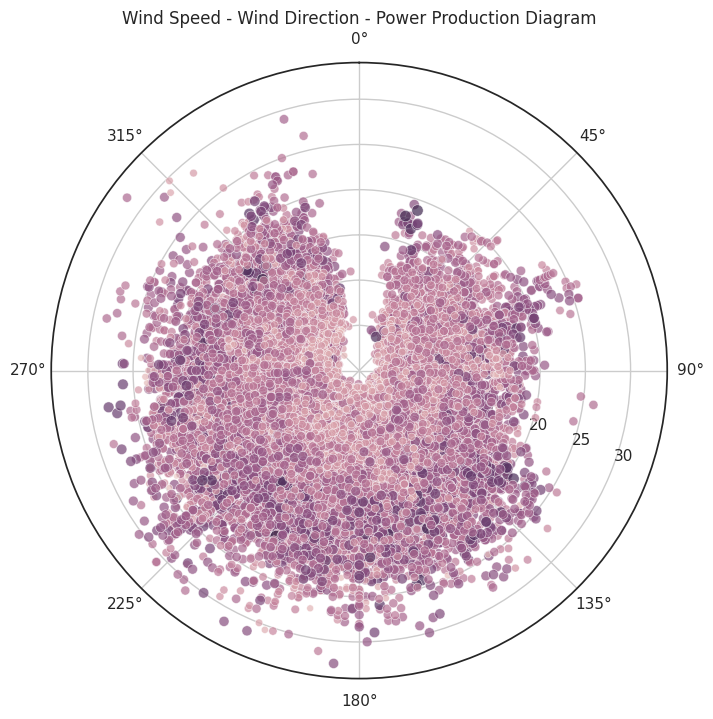

In [ ]:
# Creating the polar diagram
from math import radians

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
# Inside circles are the wind speed and marker color and size represents the amount of power production
sns.scatterplot(x=[radians(x) for x in merged_df_hourly_df['average_wind_dir']],
                y=merged_df_hourly_df['average_wind_speed'],
                size=merged_df_hourly_df['ActualGenerationMW'],
                hue=merged_df_hourly_df['ActualGenerationMW'],
                alpha=0.7, legend=None)
# Setting the polar diagram's top represents the North
ax.set_theta_zero_location('N')
# Setting -1 to start the wind direction clockwise
ax.set_theta_direction(-1)
# Setting wind speed labels in a better position to see
ax.set_rlabel_position(110)
plt.title('Wind Speed - Wind Direction - Power Production Diagram')
plt.ylabel(None);


In [ ]:
fig = px.scatter(newdf, x='hour', y='ActualDemandMW', facet_col='month', color='isweekday')
fig.show()

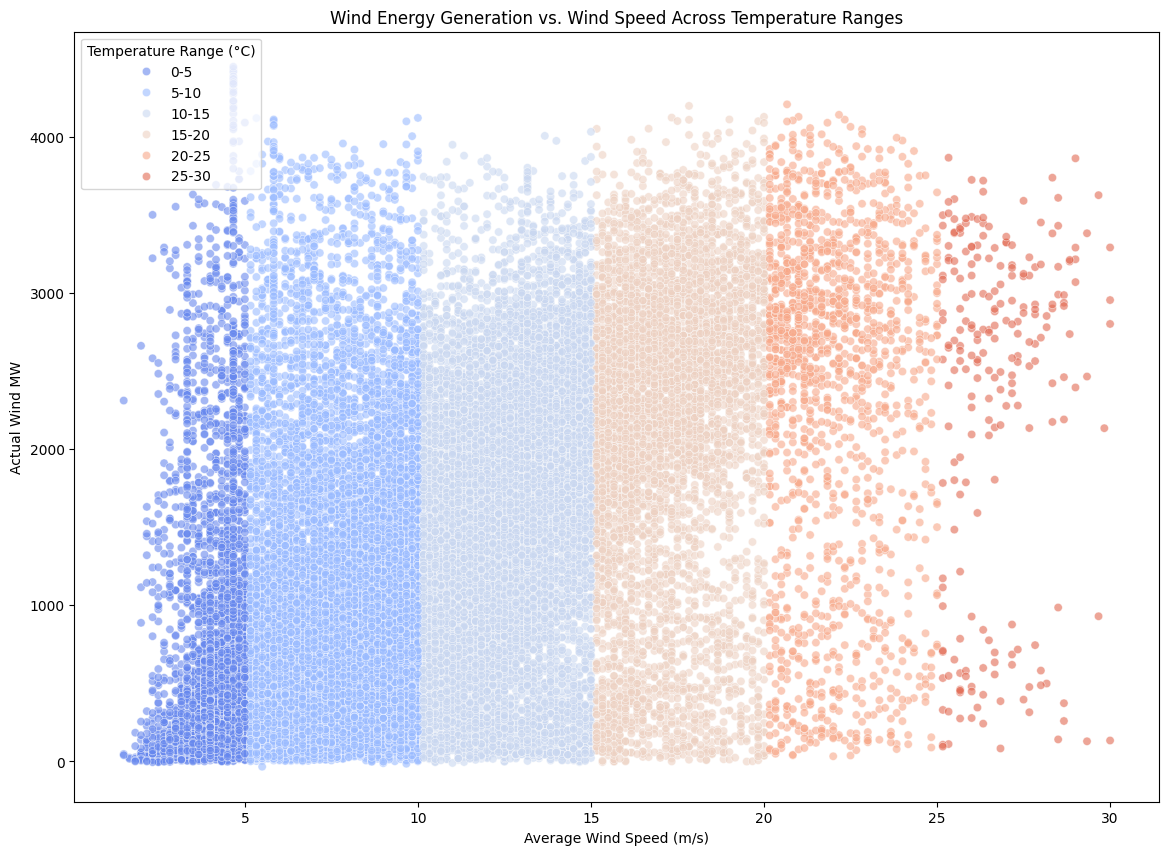

In [ ]:
# Categorizing temperature into ranges for easier analysis
data_cleaned['temp_category'] = pd.cut(data_cleaned['average_temp'], bins=[0, 5, 10, 15, 20, 25, 30], labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30'])

# Plotting wind energy generation as a function of wind speed and temperature category
plt.figure(figsize=(14, 10))
sns.scatterplot(x='average_wind_speed', y='ActualWindMW', hue='temp_category', data=data_cleaned, palette='coolwarm', alpha=0.6)
plt.title('Wind Energy Generation vs. Wind Speed Across Temperature Ranges')
plt.xlabel('Average Wind Speed (m/s)')
plt.ylabel('Actual Wind MW')
plt.legend(title='Temperature Range (°C)', loc='upper left')
plt.show()



### LinePlot

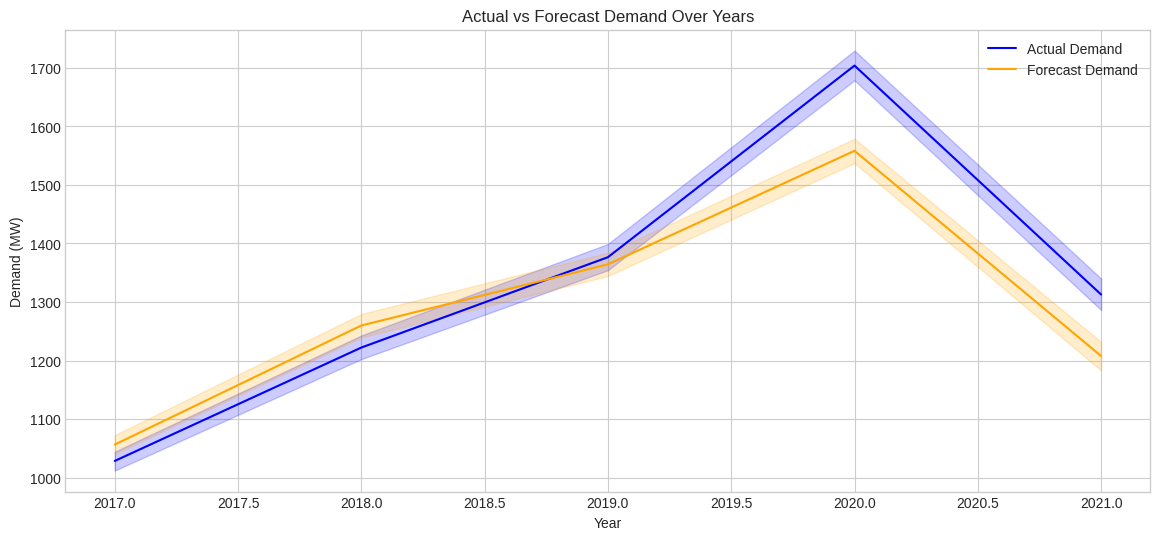

In [ ]:
# Line plot for Actual Demand and Forecast Demand over Years
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='ForecastWndMW', data=merged_df_hourly_df, label='Actual Demand', color='blue')
sns.lineplot(x='Year', y='ActualWindMW', data=merged_df_hourly_df, label='Forecast Demand', color='orange')
plt.xlabel('Year')
plt.ylabel('Demand (MW)')
plt.title('Actual vs Forecast Demand Over Years')
plt.legend()
plt.show()

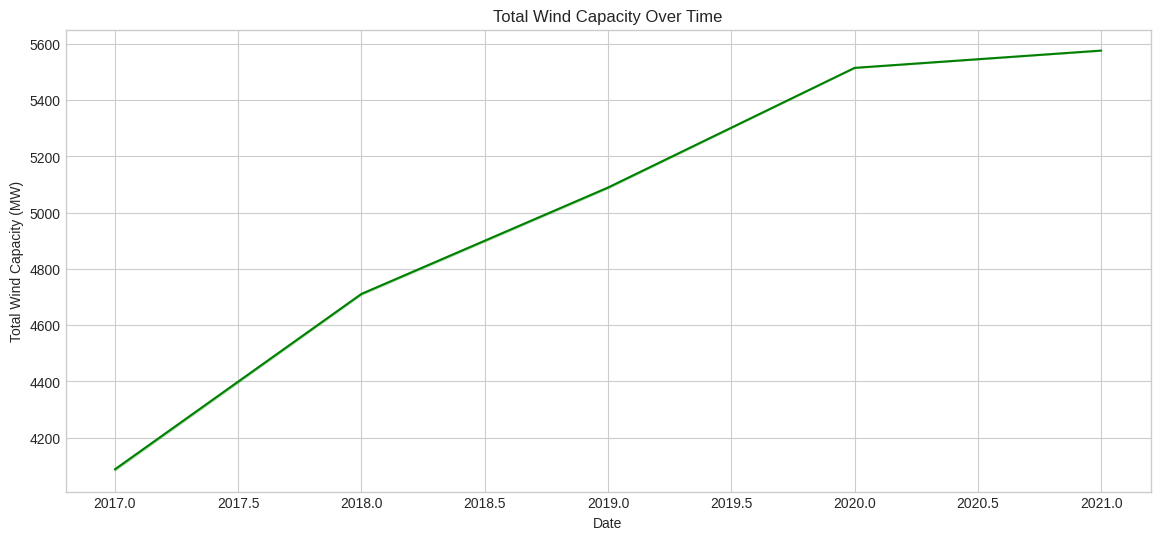

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='TotalWindCapacityMW', data=merged_df_hourly_df, color='green')
plt.xlabel('Date')
plt.ylabel('Total Wind Capacity (MW)')
plt.title('Total Wind Capacity Over Time')
plt.show()


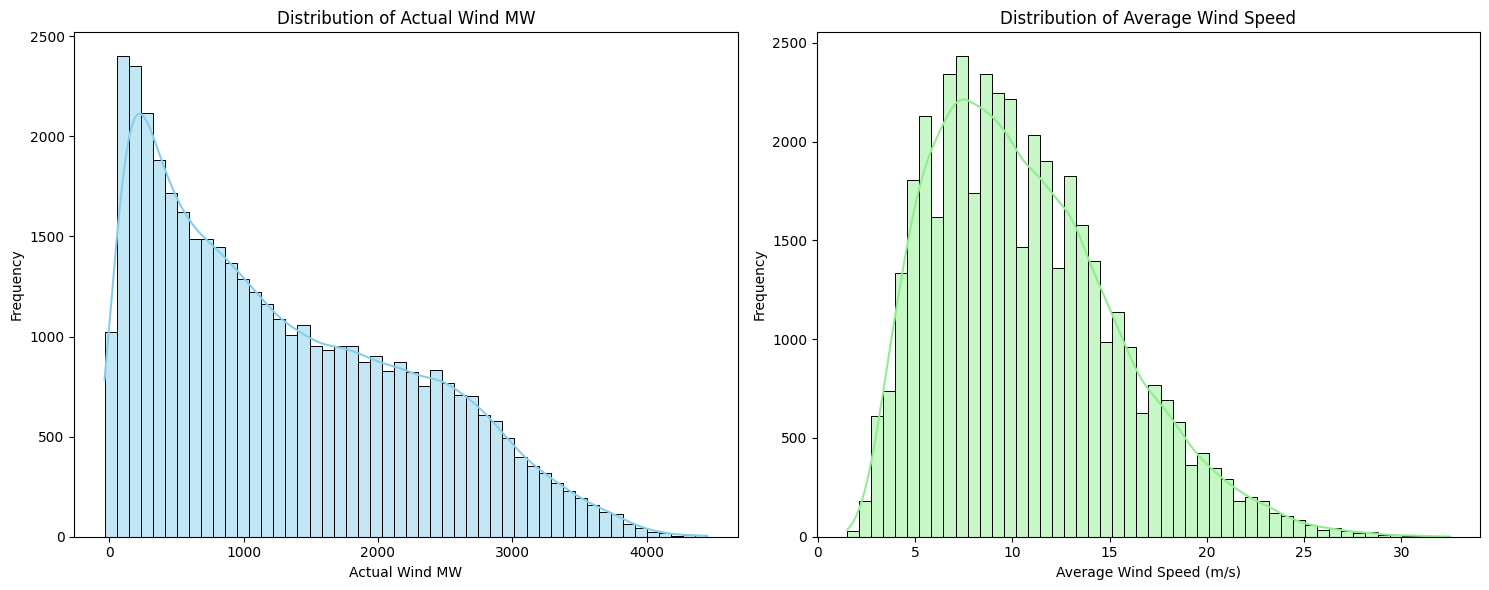

In [ ]:
# Plotting distributions of ActualWindMW and average_wind_speed
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# ActualWindMW distribution
sns.histplot(data_cleaned['ActualWindMW'], bins=50, ax=axs[0], kde=True, color='skyblue')
axs[0].set_title('Distribution of Actual Wind MW')
axs[0].set_xlabel('Actual Wind MW')
axs[0].set_ylabel('Frequency')

# Average Wind Speed distribution
sns.histplot(data_cleaned['average_wind_speed'], bins=50, ax=axs[1], kde=True, color='lightgreen')
axs[1].set_title('Distribution of Average Wind Speed')
axs[1].set_xlabel('Average Wind Speed (m/s)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Box Plot

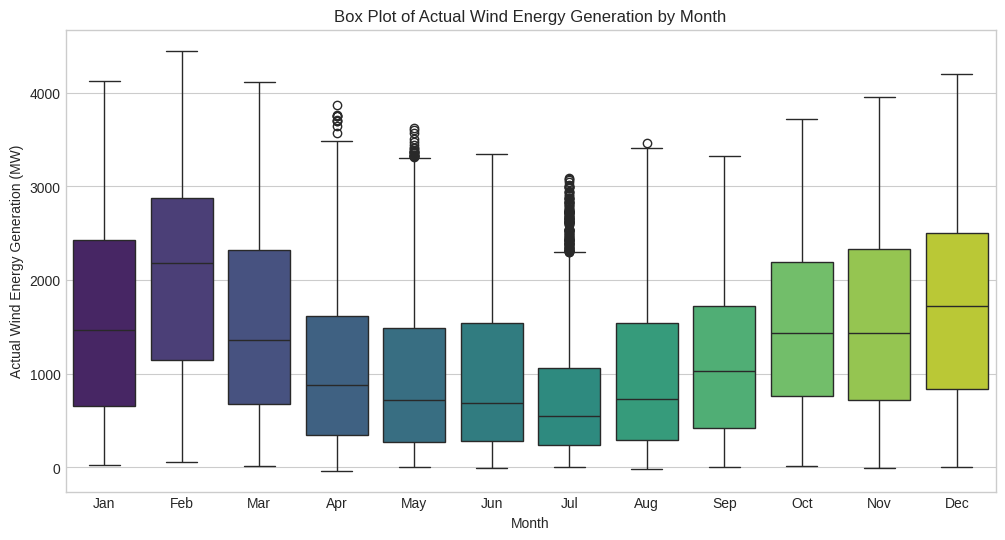

In [ ]:
# Box plot of Actual Wind Energy Generation by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='ActualWindMW', data=merged_df_hourly_df, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Actual Wind Energy Generation (MW)')
plt.title('Box Plot of Actual Wind Energy Generation by Month')
plt.show()

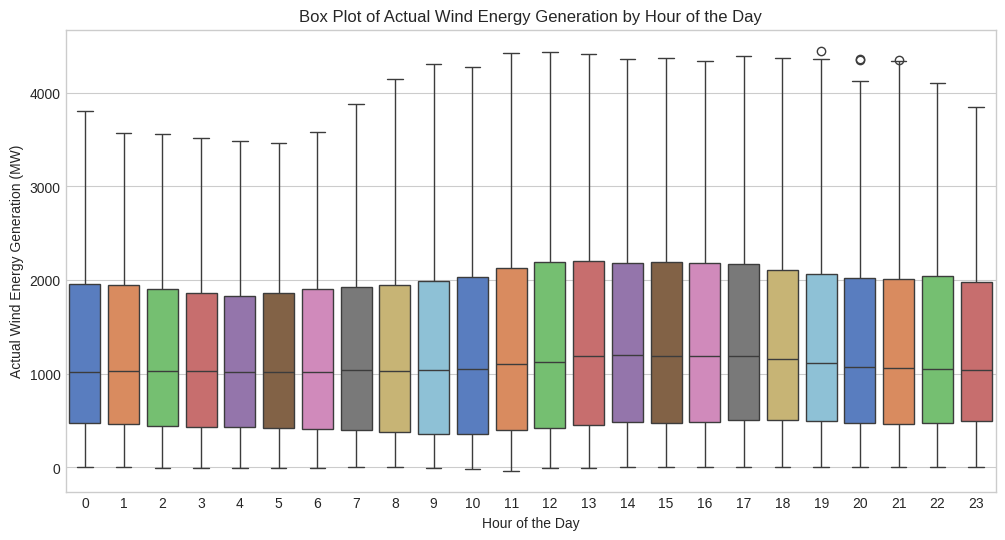

In [ ]:
# Box plot of Actual Wind Energy Generation by Hour of the Day
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='ActualWindMW', data=merged_df_hourly_df, palette='muted')
plt.xlabel('Hour of the Day')
plt.ylabel('Actual Wind Energy Generation (MW)')
plt.title('Box Plot of Actual Wind Energy Generation by Hour of the Day')
plt.show()

<ipython-input-8-931c29754764>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='average_wind_speed', data=merged_df_hourly_df, palette='muted')


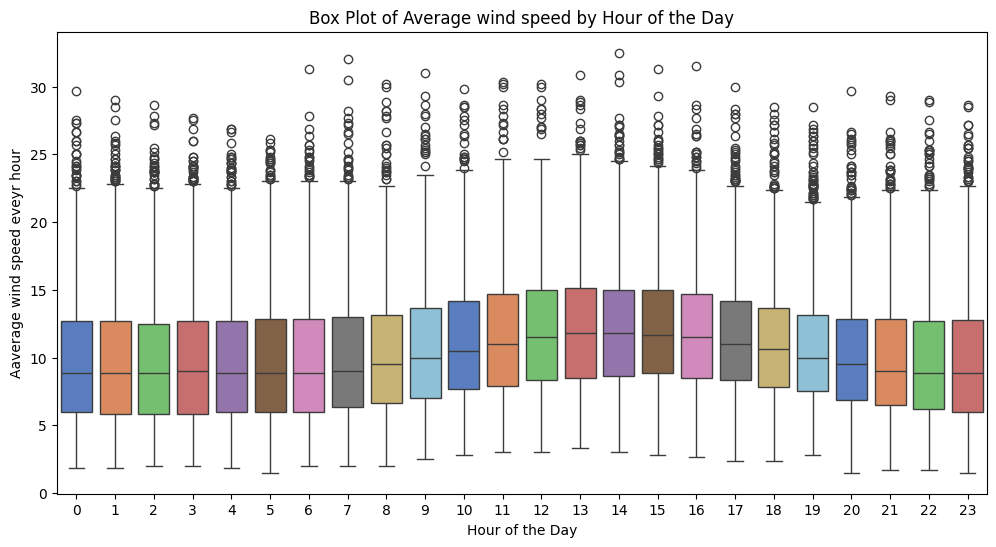

In [ ]:
# Box plot of average_wind_speed Generation by Hour of the Day
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='average_wind_speed', data=merged_df_hourly_df, palette='muted')
plt.xlabel('Hour of the Day')
plt.ylabel('Aaverage wind speed eveyr hour')
plt.title('Box Plot of Average wind speed by Hour of the Day')
plt.show()

<ipython-input-34-da566db2c8cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rounded_wind_direction', y='average_wind_speed', data=data_cleaned, palette="coolwarm")


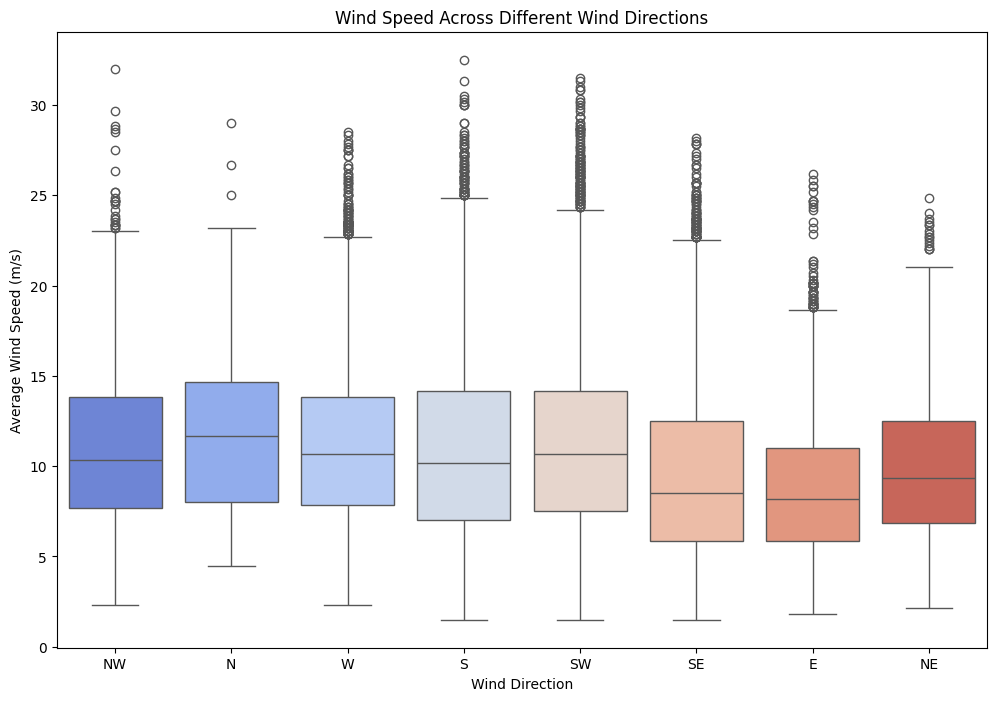

In [ ]:
# Plotting wind speed across different wind directions (rounded_wind_direction)
plt.figure(figsize=(12, 8))
sns.boxplot(x='rounded_wind_direction', y='average_wind_speed', data=data_cleaned, palette="coolwarm")
plt.title('Wind Speed Across Different Wind Directions')
plt.xlabel('Wind Direction')
plt.ylabel('Average Wind Speed (m/s)')
plt.show()


### BarChart

<ipython-input-11-3bff3dbc4397>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['BEL', 'DUB', 'SHAN', 'COR', 'GAL', 'DON'], y=[merged_df_hourly_df['wdsp_BEL'].mean(), merged_df_hourly_df['wdsp_DUB'].mean(),  merged_df_hourly_df['wdsp'].mean(),  merged_df_hourly_df['wdsp_COR'].mean(),  merged_df_hourly_df['wdsp_GAL'].mean(),  merged_df_hourly_df['wdsp_DON'].mean()], palette="viridis")


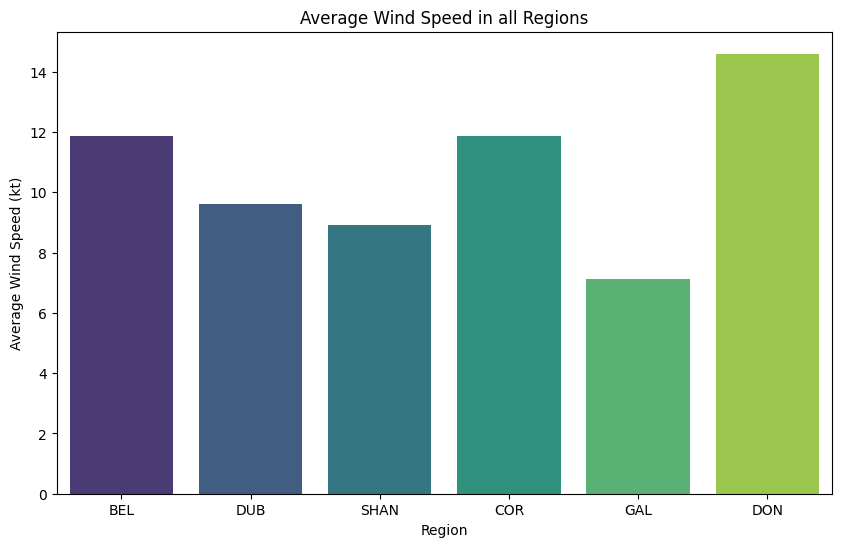

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a bar chart for average wind speed in all regions
plt.figure(figsize=(10, 6))
sns.barplot(x=['BEL', 'DUB', 'SHAN', 'COR', 'GAL', 'DON'], y=[merged_df_hourly_df['wdsp_BEL'].mean(), merged_df_hourly_df['wdsp_DUB'].mean(),  merged_df_hourly_df['wdsp'].mean(),  merged_df_hourly_df['wdsp_COR'].mean(),  merged_df_hourly_df['wdsp_GAL'].mean(),  merged_df_hourly_df['wdsp_DON'].mean()], palette="viridis")
plt.title('Average Wind Speed in all Regions')
plt.xlabel('Region')
plt.ylabel('Average Wind Speed (kt)')
plt.show()


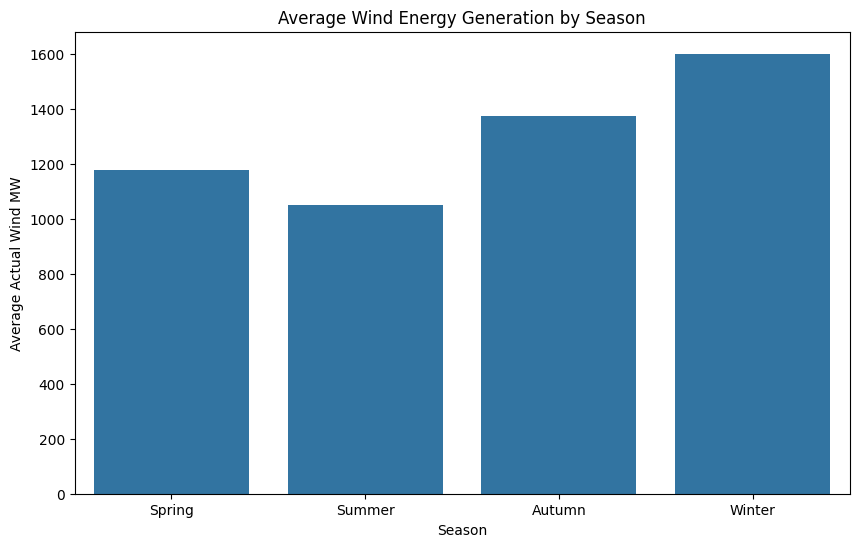

In [ ]:
# Adding a 'season' column based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data_cleaned['season'] = data_cleaned['date'].dt.month.apply(get_season)

# Aggregating wind energy generation by season
seasonal_wind_energy = data_cleaned.groupby('season')['ActualWindMW'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='ActualWindMW', data=seasonal_wind_energy, order=['Spring', 'Summer', 'Autumn', 'Winter'])
plt.title('Average Wind Energy Generation by Season')
plt.xlabel('Season')
plt.ylabel('Average Actual Wind MW')
plt.show()


### HeatMap

<ipython-input-13-bc2d52434909>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = merged_df_hourly_df[col_list_numerical].corr()


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, 'Year'),
  Text(0, 1.5, 'ActualDemandMW'),
  Text(0, 2.5, 'ForecastWndMW'),
  Text(0, 3.5, 'ActualWindMW'),
  Text(0, 4.5, 'ActualGenerationMW'),
  Text(0, 5.5, 'NetTotal_MW'),
  Text(0, 6.5, 'EWIC_MW'),
  Text(0, 7.5, 'MOYLE_MW'),
  Text(0, 8.5, 'hour'),
  Text(0, 9.5, 'isweekday'),
  Text(0, 10.5, 'month'),
  Text(0, 11.5, 'year'),
  Text(0, 12.5, 'average_wind_speed'),
  Text(0, 13.5, 'average_temp'),
  Text(0, 14.5, 'average_rain')])

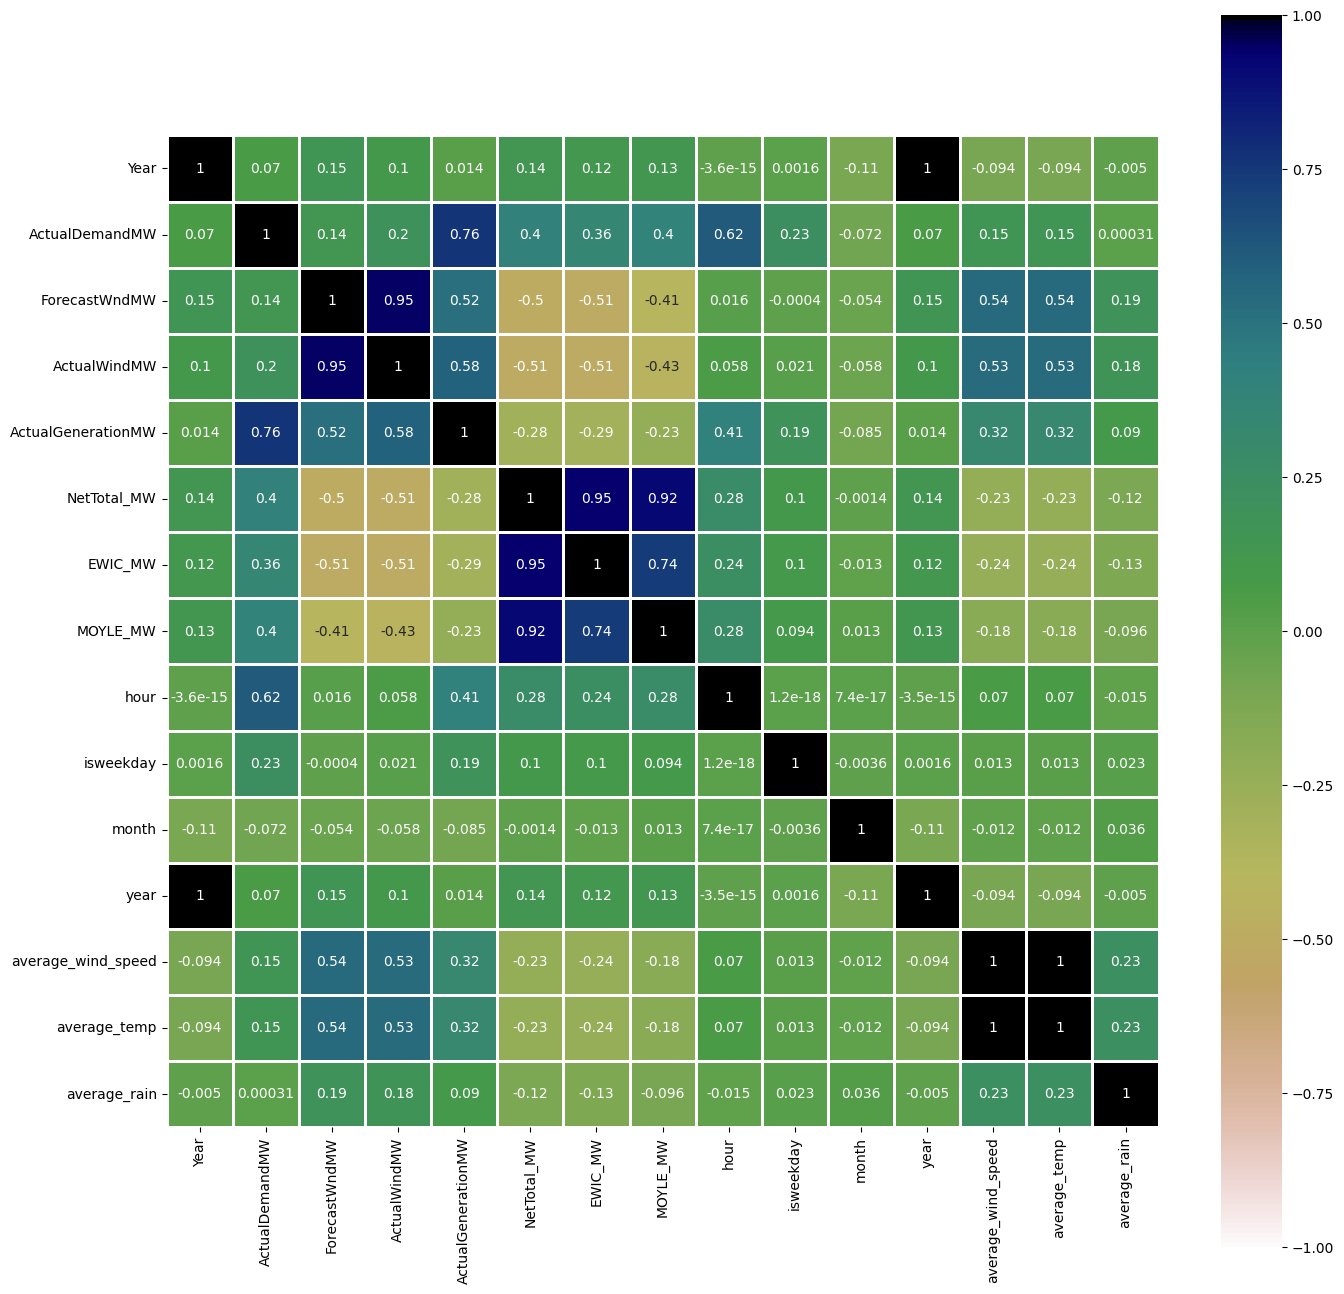

In [ ]:
col_list_numerical = ['date', 'Year', 'Month', 'DayTime', ' REGION', 'ActualDemandMW',
       'ForecastWndMW', 'ActualWindMW',
       'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW', 'MOYLE_MW', 'hour',
       'isweekday', 'month', 'year', 'average_wind_speed', 'average_temp', 'average_rain' ]

df_corr = merged_df_hourly_df[col_list_numerical].corr()

plt.figure(figsize=[16, 16])
sns.heatmap(data=df_corr, vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

<ipython-input-11-fc1148e84e7a>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = merged_df_hourly_df[col_list_numerical].corr()


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0, 0.5, 'Unnamed: 0.1'),
  Text(0, 1.5, 'Unnamed: 0'),
  Text(0, 2.5, 'Year'),
  Text(0, 3.5, 'ActualDemandMW'),
  Text(0, 4.5, 'ForecastWndMW'),
  Text(0, 5.5, 'ActualWindMW'),
  Text(0, 6.5, 'ActualGenerationMW'),
  Text(0, 7.5, 'NetTotal_MW'),
  Text(0, 8.5, 'EWIC_MW'),
  Text(0, 9.5, 'MOYLE_MW'),
  Text(0, 10.5, 'hour'),
  Text(0, 11.5, 'isweekday'),
  Text(0, 12.5, 'month'),
  Text(0, 13.5, 'year'),
  Text(0, 14.5, 'rain_BEL'),
  Text(0, 15.5, 'temp_BEL'),
  Text(0, 16.5, 'wetb_BEL'),
  Text(0, 17.5, 'dewpt_BEL'),
  Text(0, 18.5, 'vappr_BEL'),
  Text(0, 19.5, 'rhum_BEL'),
  Text(0, 20.5, 'msl_BEL'),
  Text(0, 21.5, 'wdsp_BEL'),
  Text(0, 22.5, 'wddir_BEL'),
  Text(0, 23.5, 'TotalWindCapacityMW')])

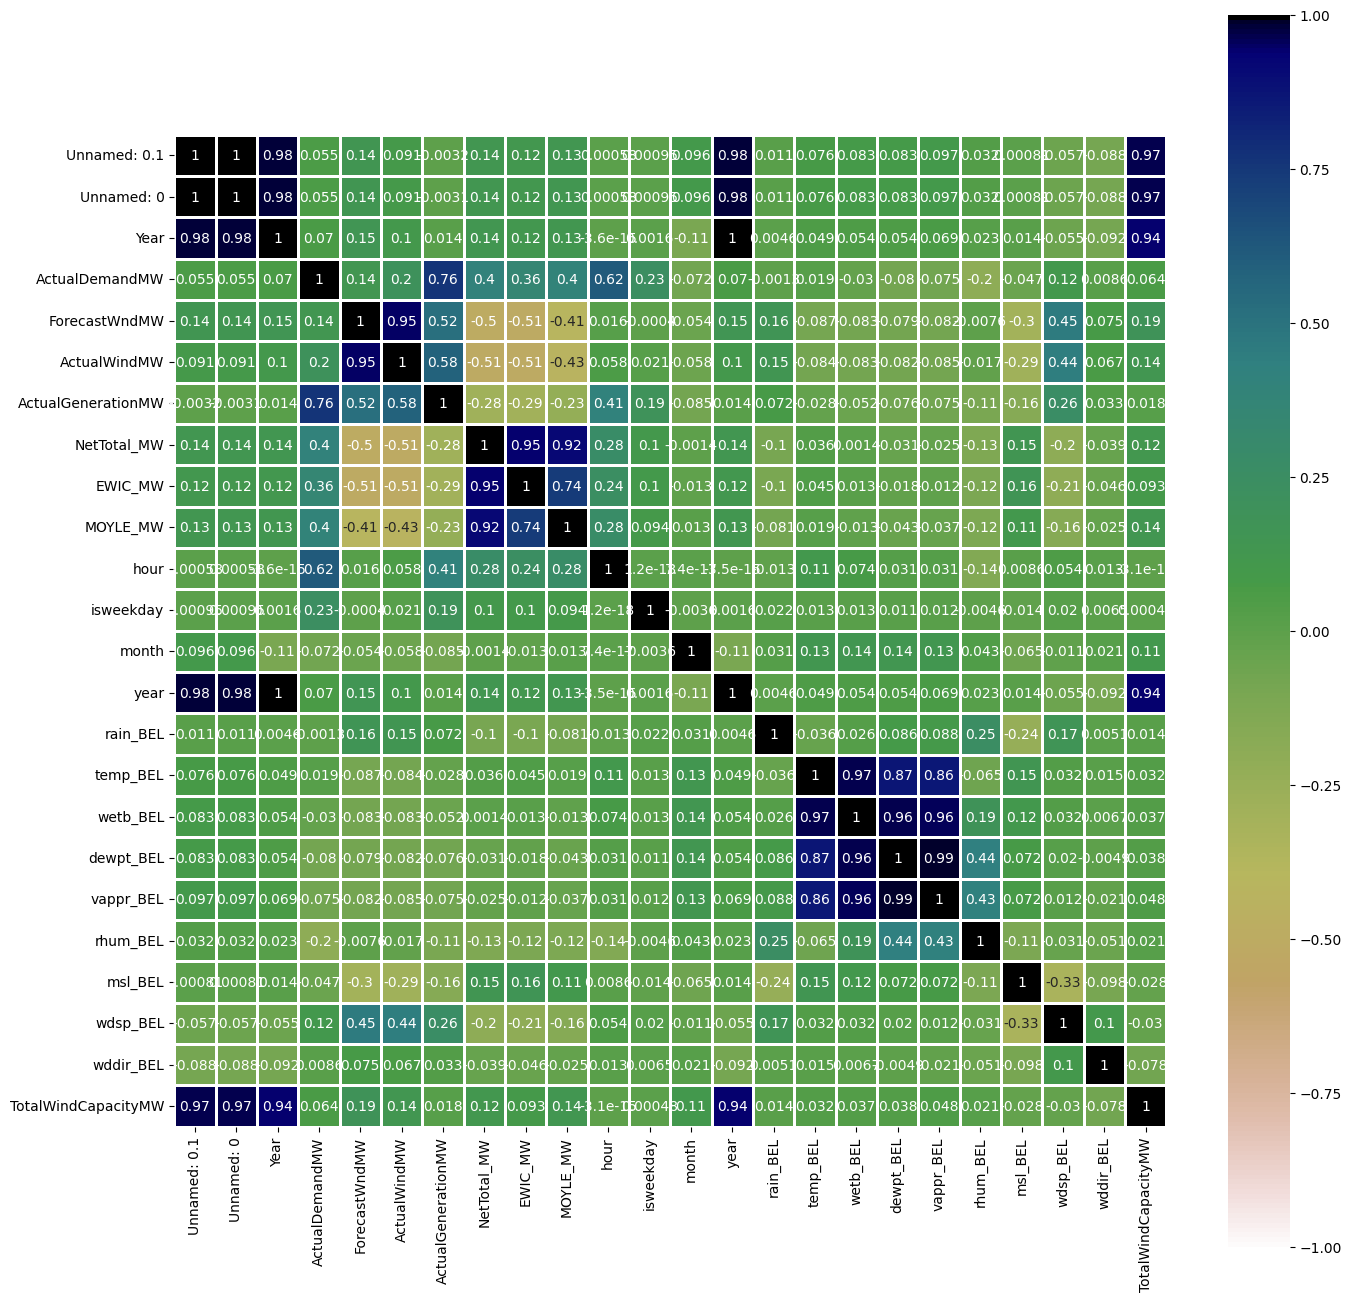

In [ ]:
col_list_numerical = ['Unnamed: 0.1', 'date', 'Unnamed: 0', 'Year', 'Month', 'DayTime',
       ' REGION', 'ActualDemandMW', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL',
       'TotalWindCapacityMW']

df_corr = merged_df_hourly_df[col_list_numerical].corr()

plt.figure(figsize=[16, 16])
sns.heatmap(data=df_corr, vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
import seaborn as sns

import io
import requests
# GitHub URL to your CSV file
github_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/IslandElectricity2017_2021v5.csv'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(github_url)

In [ ]:
# Dropping unnecessary columns
data_cleaned = data.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])

# Converting 'date' column to datetime format
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], format='%d/%m/%Y %H:%M')

# Checking for missing values in key columns
missing_values = data_cleaned.isnull().sum()

# Display missing values for key columns and data types of first few columns
data_types = data_cleaned.dtypes
missing_values_summary = missing_values[missing_values > 0]
data_types_summary = data_types[:10]  # Display data types for the first 10 columns for brevity

missing_values_summary, data_types_summary



( FORECAST DEMAND(MW)    41616
 dtype: int64,
 date                    datetime64[ns]
 Year                             int64
 Month                           object
 DayTime                         object
  REGION                         object
 ActualDemandMW                   int64
  FORECAST DEMAND(MW)           float64
 ForecastWndMW                    int64
 ActualWindMW                     int64
 ActualGenerationMW               int64
 dtype: object)

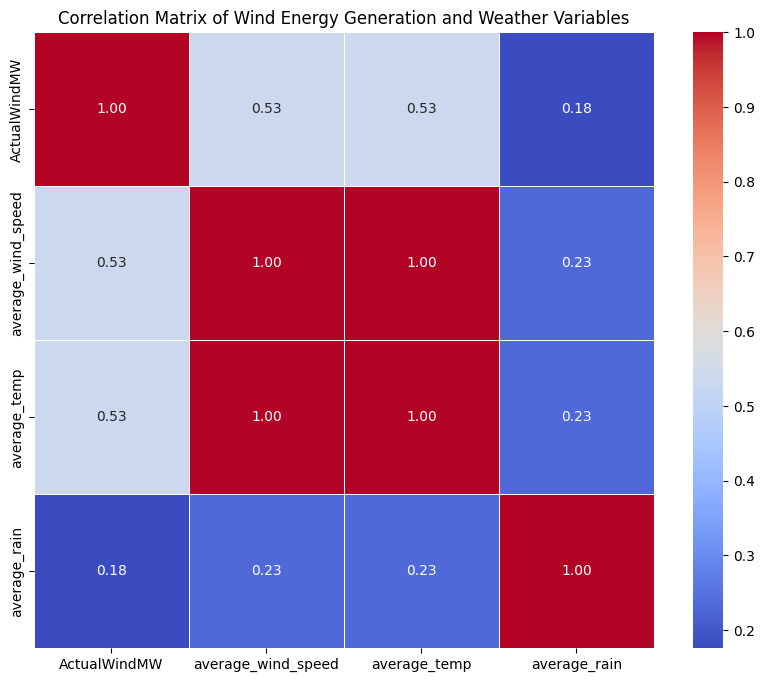

In [ ]:
# Calculating the correlation matrix
correlation_matrix = data_cleaned[['ActualWindMW', 'average_wind_speed', 'average_temp', 'average_rain']].corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Wind Energy Generation and Weather Variables')
plt.show()


### Violinplot

<ipython-input-33-efde7674e72c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isweekday', y='ActualWindMW', data=merged_df_hourly_df, palette='Set2')


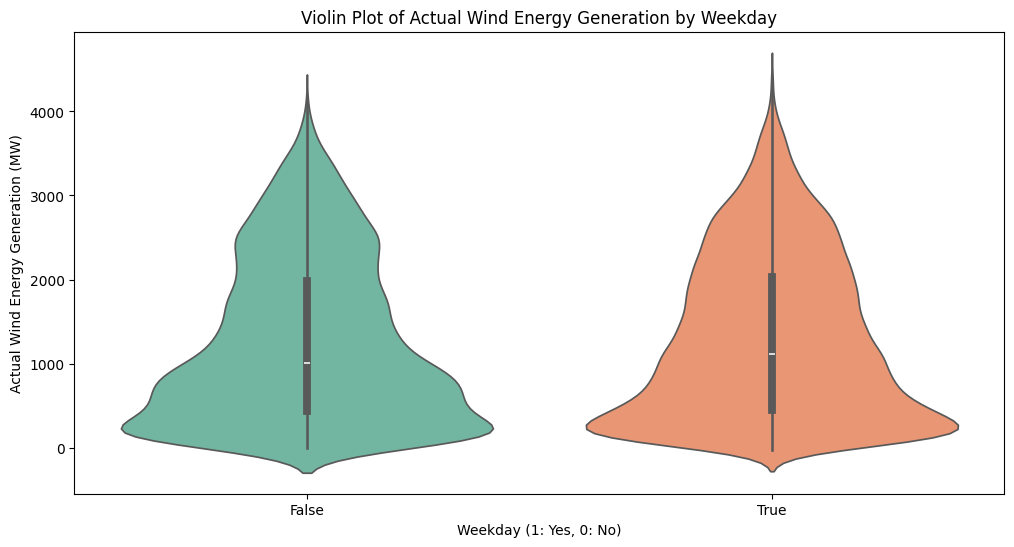

In [ ]:
# Violin plot for Actual Wind Energy Generation by weekday
plt.figure(figsize=(12, 6))
sns.violinplot(x='isweekday', y='ActualWindMW', data=merged_df_hourly_df, palette='Set2')
plt.xlabel('Weekday (1: Yes, 0: No)')
plt.ylabel('Actual Wind Energy Generation (MW)')
plt.title('Violin Plot of Actual Wind Energy Generation by Weekday')
plt.show()

### Kdeplot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(y=self.y, ax=self.ax_marg_y, **kwargs)


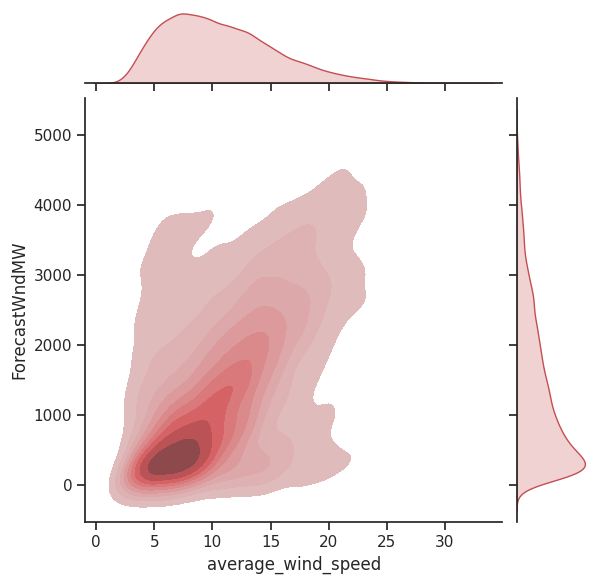

In [ ]:


#Relationship between 'average_wind_speed' and 'ForecastWndMW'.

sns.set( style='ticks', color_codes=True)
g = sns.JointGrid(x='average_wind_speed', y='ForecastWndMW',data=merged_df_hourly_df, height=6)
g = g.plot_joint(sns.kdeplot, color="r", shade=True)
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)

## ML MODELS

### Random forest (RF)

In [67]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler



In [68]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler

In [69]:

# GitHub URL to your CSV file
github_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/IslandElectricity2017_2021v5.csv'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(github_url)
data['date'] = pd.to_datetime(data['date'])

# Display the first few rows of the DataFrame to understand its structure
print(data.columns)

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'date', 'Unnamed: 0', 'Year', 'Month',
       'DayTime', ' REGION', 'ActualDemandMW', ' FORECAST DEMAND(MW)',
       'ForecastWndMW', 'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW',
       'EWIC_MW', 'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 'ra

In [44]:

# Simplify the dataset to include only necessary features
# Converting 'date' to datetime format and setting it as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Including specified features plus creating additional necessary features for modeling
selected_columns = [
    'Year', 'Month', 'DayTime', 'hour', 'isweekday',
    'average_temp', 'average_wind_speed', 'average_wind_dir', 'average_rain',
    'ActualWindMW'  # Target variable
]

# Filter the dataset to include only the selected columns
data_filtered = data[selected_columns]

# Generate lag features for ActualWindMW for 24 hours
for lag in range(1, 25):
    data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)

# Adding rolling averages and differences for 'ActualWindMW'
data_filtered['rolling_avg_wind'] = data_filtered['ActualWindMW'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_power'] = data_filtered['ActualWindMW'].diff().shift(1)


data_filtered['rolling_avg_wind_SPEED'] = data_filtered['average_wind_speed'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_SPEED'] = data_filtered['average_wind_speed'].diff().shift(1)

data_filtered['rolling_avg_wind_dir'] = data_filtered['average_wind_dir'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_dir'] = data_filtered['average_wind_dir'].diff().shift(1)
# Shift the target variable by one hour into the future
data_filtered['ActualWindMW_target'] = data_filtered['ActualWindMW'].shift(-1)

# Dropping rows with NaN values created by lagging
data_filtered.dropna(inplace=True)

data_filtered.head()





<ipython-input-44-f5d99be895db>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-44-f5d99be895db>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-44-f5d99be895db>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Year Month    DayTime  hour  isweekday  average_temp  \
date                                                                        
2017-01-02 00:00:00  2017   Jan  02, 00:00     0       True      6.666667   
2017-01-02 01:00:00  2017   Jan  02, 01:00     1       True      6.500000   
2017-01-02 02:00:00  2017   Jan  02, 02:00     2       True      7.000000   
2017-01-02 03:00:00  2017   Jan  02, 03:00     3       True      6.500000   
2017-01-02 04:00:00  2017   Jan  02, 04:00     4       True      7.333333   

                     average_wind_speed  average_wind_dir  average_rain  \
date                                                                      
2017-01-02 00:00:00            6.666667        125.000000      0.000000   
2017-01-02 01:00:00            6.500000        140.000000      0.000000   
2017-01-02 02:00:00            7.000000        141.666667      0.016667   
2017-01-02 03:00:00            6.500000        146.666667      0.000000   
2017-01-02 04:00:00            7.333333        141.666667      0.000000   

                     ActualWindMW  ...  ActualWindMW_lag22  \
date                               ...                       
2017-01-02 00:00:00          1313  ...              1528.0   
2017-01-02 01:00:00          1269  ...              1612.0   
2017-01-02 02:00:00          1053  ...              1473.0   
2017-01-02 03:00:00          1071  ...              1678.0   
2017-01-02 04:00:00           904  ...              1710.0   

                     ActualWindMW_lag23  ActualWindMW_lag24  rolling_avg_wind  \
date                                                                            
2017-01-02 00:00:00              1123.0              1214.0       1622.000000   
2017-01-02 01:00:00              1528.0              1123.0       1467.666667   
2017-01-02 02:00:00              1612.0              1528.0       1354.333333   
2017-01-02 03:00:00              1473.0              1612.0       1211.666667   
2017-01-02 04:00:00              1678.0              1473.0       1131.000000   

                     diff_wind_power  rolling_avg_wind_SPEED  diff_wind_SPEED  \
date                                                                            
2017-01-02 00:00:00           -128.0               14.277778        -1.666667   
2017-01-02 01:00:00           -168.0               11.555556        -6.500000   
2017-01-02 02:00:00            -44.0                8.777778        -0.166667   
2017-01-02 03:00:00           -216.0                6.722222         0.500000   
2017-01-02 04:00:00             18.0                6.666667        -0.500000   

                     rolling_avg_wind_dir  diff_wind_dir  ActualWindMW_target  
date                                                                           
2017-01-02 00:00:00             81.111111     -55.000000               1269.0  
2017-01-02 01:00:00             77.777778      98.333333               1053.0  
2017-01-02 02:00:00             97.222222      15.000000               1071.0  
2017-01-02 03:00:00            135.555556       1.666667                904.0  
2017-01-02 04:00:00            142.777778       5.000000                818.0  

[5 rows x 41 columns]

This method shifts the data by the specified number of periods (in this case, hours). When you use .shift(1), it moves all entries in the ActualWindMW column down by one row, meaning that the current row's ActualWindMW_lag1 value will be the ActualWindMW value from the previous row (1 hour ago).

For next 24-hour forecasting, including lags from the past 24 hours as features can be quite effective because:

Short-term Forecasting: It helps in capturing the short-term dependencies and fluctuations in wind power generation.
Model Training: During model training, these lag features serve as inputs that help the model learn the relationship between past and future wind power output. This learning is critical for making accurate forecasts.

Renewable Energy Forecasting Studies: Specific to renewable energy, numerous studies in journals such as "Renewable and Sustainable Energy Reviews" or "Applied Energy" frequently explore the use of lagged data for predicting wind energy output. For example, research articles that model wind speed or power output often utilize historical data points as features to improve forecast accuracy.

In [45]:

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
le = LabelEncoder()
data_filtered['Month'] = le.fit_transform(data_filtered['Month'])

# Splitting the dataset into training and testing sets
# We reserve the last 24 observations for testing to simulate forecasting the next 24 hours It's good practice to reserve the last 24 observations for testing
training_data = data_filtered.iloc[:-24]
testing_data = data_filtered.iloc[-24:]


# Exclude target variable and non-numeric 'DayTime'
X_train = training_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_train = training_data['ActualWindMW_target']

X_test = testing_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_test = testing_data['ActualWindMW_target']


# Splitting the dataset into training and testing sets again
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Since RandomForest does not need feature scaling, we'll create a simple
# But you can add preprocessing steps here if needed.
pipeline = Pipeline([
    ('rf', RandomForestRegressor(random_state=42))
])

# Hyperparameter grid for RandomForestRegressor (add ranseach)
param_grid = {
    'rf__n_estimators': [300],  # Smaller range
    'rf__max_depth': [20],  # Added a mid-point for diversity
    'rf__min_samples_split': [2],
    'rf__min_samples_leaf': [1],
    'rf__max_features': ['sqrt']
}


# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


# Save the best model
model_filename = 'rf_model_optimized.joblib'
joblib.dump(best_model, model_filename)
print(f'Model saved as {model_filename}')

# Predicting with the best model
predictions = best_model.predict(X_test)

# Calculate metrics
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}")


<ipython-input-45-39154e84b02f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Month'] = le.fit_transform(data_filtered['Month'])


Best parameters: {'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}
Model saved as rf_model_optimized.joblib
MAE: 184.6929813865756, MSE: 59000.677969492644, RMSE: 242.9005516039283, R^2: 0.1911073069507857


By including these lag features and additional derived features in your training dataset, the RandomForestRegressor model will be able to learn from the historical patterns in wind power generation. This is particularly important for time series forecasting, where past observations are predictive of future values.

'rf__n_estimators': [200, 300]: Specifies the number of trees in the forest to try out—200 and 300 trees.
'rf__max_depth': [None, 15]: Sets the maximum depth of the trees. None means that nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. 15 restricts the growth of the trees to a depth of 15.
'rf__min_samples_split': [4]: The minimum number of samples required to split an internal node is 4.
'rf__min_samples_leaf': [4]: The minimum number of samples required to be at a leaf node is 4. This helps in controlling overfitting by smoothing the model, especially in regression.
'rf__max_features': ['sqrt', 'log2']: Specifies the number of features to consider when looking for the best split. 'sqrt' means that sqrt(n_features) (the square root of the number of features) are considered at each split. 'log2' means that log2(n_features) (the log base 2 of the number of features) are considered. This is a way to control the diversity of trees in the ensemble.

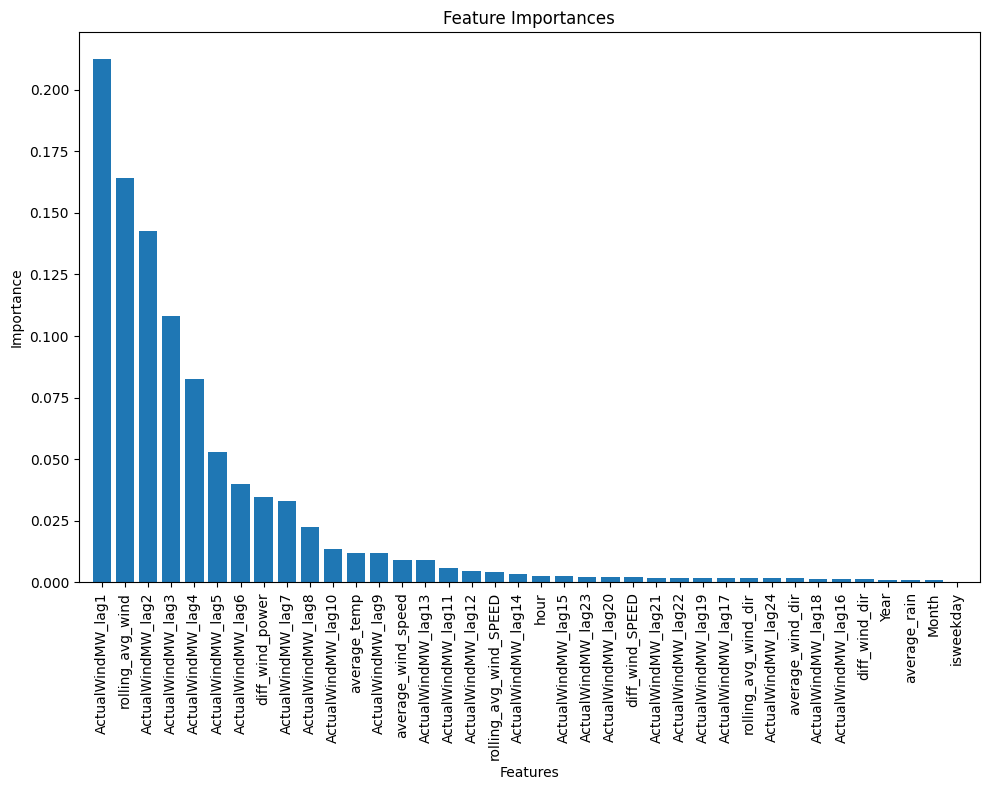

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train is your features DataFrame and best_model is your trained model
feature_names = X_train.columns

# Retrieving feature importances
feature_importances = best_model.named_steps['rf'].feature_importances_

# Sorting the features by their importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Visualizing the feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


In [49]:

import numpy as np

# Assuming y_true and y_pred are your arrays of actual and predicted values
y_true = np.array(y_test)    # Your actual values
predictions = predictions.flatten()  # Your predictions

# Calculate MAPE
mape = np.mean(np.abs((y_true - predictions) / y_true)) * 100

print(f"MAPE: {mape}%")


MAPE: 6.752228395325897%


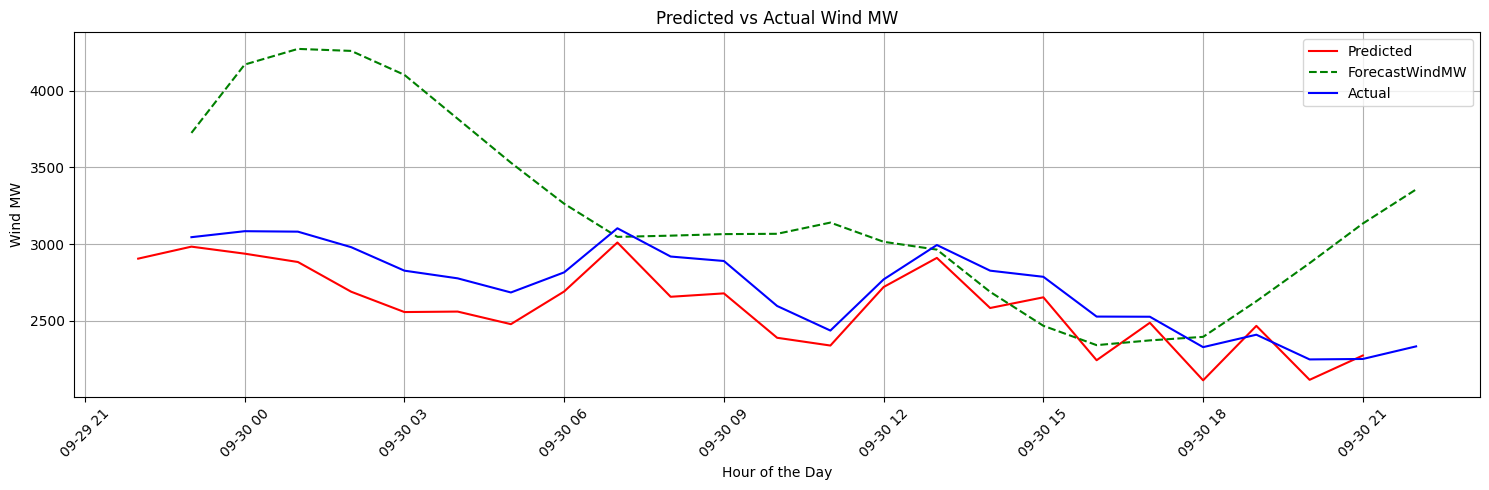

In [56]:


import pandas as pd
import matplotlib.pyplot as plt


# Align predictions with the hour they are predicting, not the hour of data used
# The index for predictions should be one hour ahead of the actuals
predictions_index = data_filtered.index[-24:] + pd.Timedelta(hours=-1)# This assumes predictions are for the next hour

# Create a DataFrame for predictions with the correct future index
predictions_df = pd.DataFrame(predictions, index=predictions_index, columns=['Predicted'])

# Create a DataFrame for actuals
actuals_df = pd.DataFrame(data_filtered['ActualWindMW'].iloc[-24:].values, index=data_filtered.index[-24:], columns=['Actual'])
# Create a DataFrame for the forecasted wind MW from another model or source
forecast_wind_df = pd.DataFrame(data['ForecastWndMW'].iloc[-24:].values, index=data_filtered.index[-24:], columns=['ForecastWindMW'])

# Combine all three DataFrames: predictions, actuals, and forecast wind
combined_df = pd.concat([predictions_df, actuals_df, forecast_wind_df], axis=1)

# Assuming combined_df is correctly aligned
combined_df['Hour'] = combined_df.index.hour

# Now plot the data
plt.figure(figsize=(15, 5))
plt.plot(combined_df.index, combined_df['Predicted'], 'r-', label='Predicted')
plt.plot(combined_df.index, combined_df['ForecastWindMW'], 'g--', label='ForecastWindMW')
plt.plot(combined_df.index, combined_df['Actual'], 'b-', label='Actual')  # Make sure this is correct

plt.legend()
plt.xlabel('Hour of the Day')
plt.ylabel('Wind MW')
plt.title('Predicted vs Actual Wind MW')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


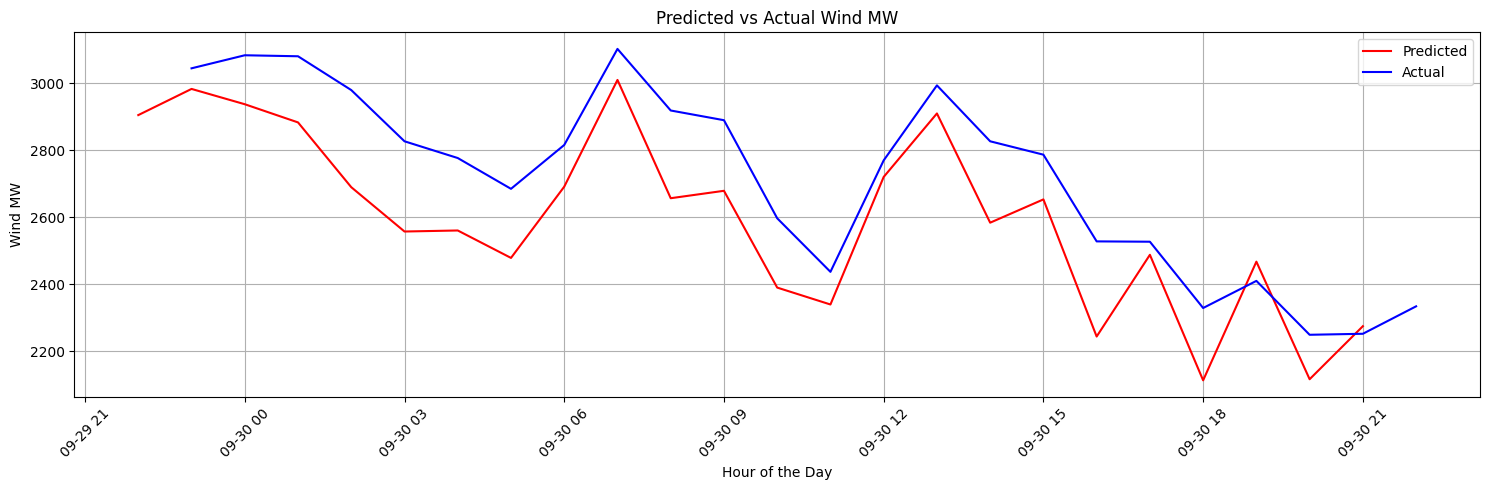

In [57]:


import pandas as pd
import matplotlib.pyplot as plt


# Align predictions with the hour they are predicting, not the hour of data used
# The index for predictions should be one hour ahead of the actuals
predictions_index = data_filtered.index[-24:] + pd.Timedelta(hours=-1)# This assumes predictions are for the next hour

# Create a DataFrame for predictions with the correct future index
predictions_df = pd.DataFrame(predictions, index=predictions_index, columns=['Predicted'])

# Create a DataFrame for actuals
actuals_df = pd.DataFrame(data_filtered['ActualWindMW'].iloc[-24:].values, index=data_filtered.index[-24:], columns=['Actual'])

# Combine all three DataFrames: predictions, actuals, and forecast wind
combined_df = pd.concat([predictions_df, actuals_df, forecast_wind_df], axis=1)

# Assuming combined_df is correctly aligned
combined_df['Hour'] = combined_df.index.hour

# Now plot the data
plt.figure(figsize=(15, 5))
plt.plot(combined_df.index, combined_df['Predicted'], 'r-', label='Predicted')

plt.plot(combined_df.index, combined_df['Actual'], 'b-', label='Actual')  # Make sure this is correct

plt.legend()
plt.xlabel('Hour of the Day')
plt.ylabel('Wind MW')
plt.title('Predicted vs Actual Wind MW')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
!pip install joblib
import joblib

# ... (previous code)

# Save the model to a file
model_filename = 'rf_model2.joblib'
joblib.dump(best_model, model_filename)

print(f'Model saved as {model_filename}')


Model saved as rf_model2.joblib


72 hour forecast

In [ ]:

# GitHub URL to your CSV file
github_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/IslandElectricity2017_2021v5.csv'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(github_url)
data['date'] = pd.to_datetime(data['date'])

# Display the first few rows of the DataFrame to understand its structure
print(data.columns)

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'date', 'Unnamed: 0', 'Year', 'Month',
       'DayTime', ' REGION', 'ActualDemandMW', ' FORECAST DEMAND(MW)',
       'ForecastWndMW', 'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW',
       'EWIC_MW', 'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 'ra

In [59]:

# Simplify the dataset to include only necessary features
# Converting 'date' to datetime format and setting it as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Including specified features plus creating additional necessary features for modeling
selected_columns = [
    'Year', 'Month', 'DayTime', 'hour', 'isweekday',
    'average_temp', 'average_wind_speed', 'average_wind_dir', 'average_rain',
    'ActualWindMW'  # Target variable
]

# Filter the dataset to include only the selected columns
data_filtered = data[selected_columns]

# Generate lag features for ActualWindMW for 24 hours
for lag in range(1, 25):
    data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)

data_filtered['wind_power_lag48'] = data_filtered['ActualWindMW'].shift(48)
data_filtered['wind_power_lag72'] = data_filtered['ActualWindMW'].shift(72)
# Adding rolling averages and differences for 'ActualWindMW'
data_filtered['rolling_avg_wind'] = data_filtered['ActualWindMW'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_power'] = data_filtered['ActualWindMW'].diff().shift(1)


data_filtered['rolling_avg_wind_SPEED'] = data_filtered['average_wind_speed'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_SPEED'] = data_filtered['average_wind_speed'].diff().shift(1)

data_filtered['rolling_avg_wind_dir'] = data_filtered['average_wind_dir'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_dir'] = data_filtered['average_wind_dir'].diff().shift(1)
# Shift the target variable by one hour into the future
data_filtered['ActualWindMW_target'] = data_filtered['ActualWindMW'].shift(-1)

# Dropping rows with NaN values created by lagging
data_filtered.dropna(inplace=True)

data_filtered.head()


<ipython-input-59-9cf76e358e8a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-59-9cf76e358e8a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-59-9cf76e358e8a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Year Month    DayTime  hour  isweekday  average_temp  \
date                                                                        
2017-01-04 00:00:00  2017   Jan  04, 00:00     0       True      3.666667   
2017-01-04 01:00:00  2017   Jan  04, 01:00     1       True      2.833333   
2017-01-04 02:00:00  2017   Jan  04, 02:00     2       True      4.333333   
2017-01-04 03:00:00  2017   Jan  04, 03:00     3       True      4.833333   
2017-01-04 04:00:00  2017   Jan  04, 04:00     4       True      5.666667   

                     average_wind_speed  average_wind_dir  average_rain  \
date                                                                      
2017-01-04 00:00:00            3.666667        191.666667      0.066667   
2017-01-04 01:00:00            2.833333        216.666667      0.000000   
2017-01-04 02:00:00            4.333333        265.000000      0.000000   
2017-01-04 03:00:00            4.833333        273.333333      0.033333   
2017-01-04 04:00:00            5.666667        263.333333      0.000000   

                     ActualWindMW  ...  ActualWindMW_lag24  wind_power_lag48  \
date                               ...                                         
2017-01-04 00:00:00           624  ...               262.0            1313.0   
2017-01-04 01:00:00           660  ...               259.0            1269.0   
2017-01-04 02:00:00           628  ...               364.0            1053.0   
2017-01-04 03:00:00           608  ...               364.0            1071.0   
2017-01-04 04:00:00           520  ...               466.0             904.0   

                     wind_power_lag72  rolling_avg_wind  diff_wind_power  \
date                                                                       
2017-01-04 00:00:00            1214.0        634.000000             13.0   
2017-01-04 01:00:00            1123.0        623.666667             -6.0   
2017-01-04 02:00:00            1528.0        638.000000             36.0   
2017-01-04 03:00:00            1612.0        637.333333            -32.0   
2017-01-04 04:00:00            1473.0        632.000000            -20.0   

                     rolling_avg_wind_SPEED  diff_wind_SPEED  \
date                                                           
2017-01-04 00:00:00               14.833333         1.500000   
2017-01-04 01:00:00               11.277778       -12.166667   
2017-01-04 02:00:00                7.444444        -0.833333   
2017-01-04 03:00:00                3.611111         1.500000   
2017-01-04 04:00:00                4.000000         0.500000   

                     rolling_avg_wind_dir  diff_wind_dir  ActualWindMW_target  
date                                                                           
2017-01-04 00:00:00            235.000000      10.000000                660.0  
2017-01-04 01:00:00            222.777778     -51.666667                628.0  
2017-01-04 02:00:00            217.222222      25.000000                608.0  
2017-01-04 03:00:00            224.444444      48.333333                520.0  
2017-01-04 04:00:00            251.666667       8.333333                449.0  

[5 rows x 43 columns]

72 hour forecast

In [61]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
le = LabelEncoder()
data_filtered['Month'] = le.fit_transform(data_filtered['Month'])

# Splitting the dataset into training and testing sets
# We reserve the last 72 observations for testing to simulate forecasting the next 72 hours
training_data = data_filtered.iloc[:-72]
testing_data = data_filtered.iloc[-72:]

# Exclude target variable and non-numeric 'DayTime'
X_train = training_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_train = training_data['ActualWindMW_target']

X_test = testing_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_test = testing_data['ActualWindMW_target']



# Splitting the dataset into training and testing sets again
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Since RandomForest does not need feature scaling, we'll create a simple
# But you can add preprocessing steps here if needed.
pipeline = Pipeline([
    ('rf', RandomForestRegressor(random_state=42))
])

param_grid = {
    'rf__n_estimators': [300],  # Smaller range
    'rf__max_depth': [20],  # Added a mid-point for diversity
    'rf__min_samples_split': [2],
    'rf__min_samples_leaf': [2],
    'rf__max_features': ['sqrt']
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Save the best model
model_filename = 'rf_model_optimized.joblib'
joblib.dump(best_model, model_filename)
print(f'Model saved as {model_filename}')

# Predicting with the best model
predictions = best_model.predict(X_test)

# Calculate metrics
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}")



<ipython-input-61-39cbef020aa3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Month'] = le.fit_transform(data_filtered['Month'])


Best parameters: {'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}
Model saved as rf_model_optimized.joblib
MAE: 215.17532110577673, MSE: 89471.92498003026, RMSE: 299.1185801317435, R^2: 0.8297134513590271


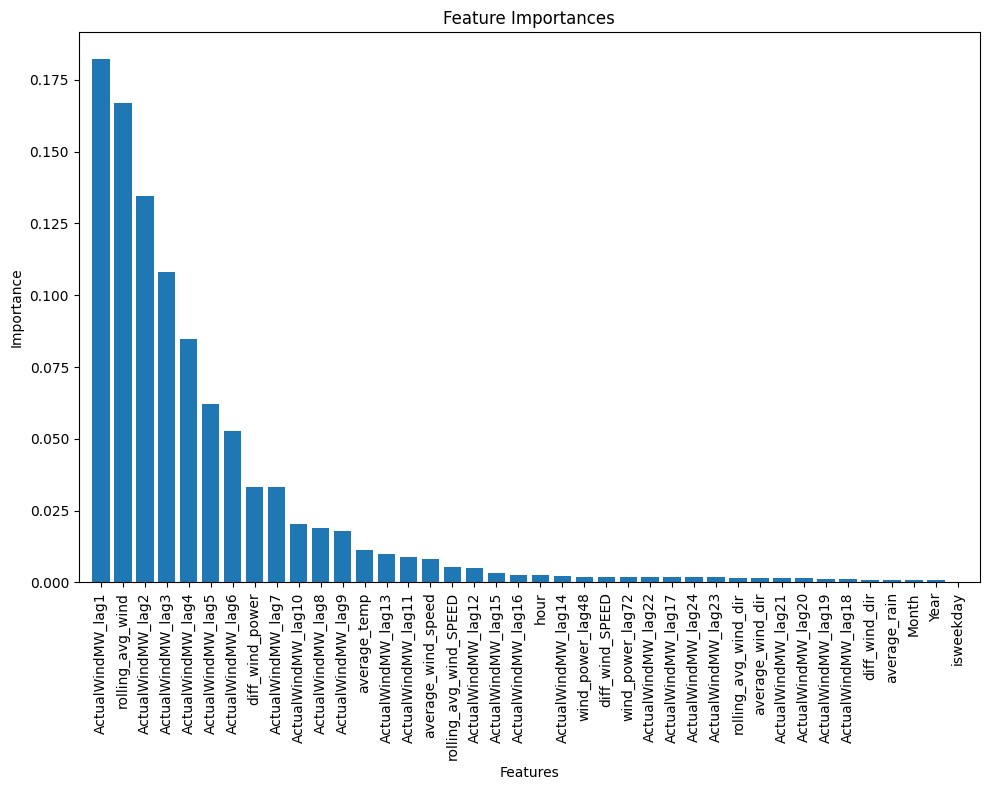

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train is your features DataFrame and best_model is your trained model
feature_names = X_train.columns

# Retrieving feature importances
feature_importances = best_model.named_steps['rf'].feature_importances_

# Sorting the features by their importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Visualizing the feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

In [63]:

import numpy as np

# Assuming y_true and y_pred are your arrays of actual and predicted values
y_true = np.array(y_test)    # Your actual values
predictions = predictions.flatten()  # Your predictions

# Calculate MAPE
mape = np.mean(np.abs((y_true - predictions) / y_true)) * 100

print(f"MAPE: {mape}%")



MAPE: 12.985716135928474%


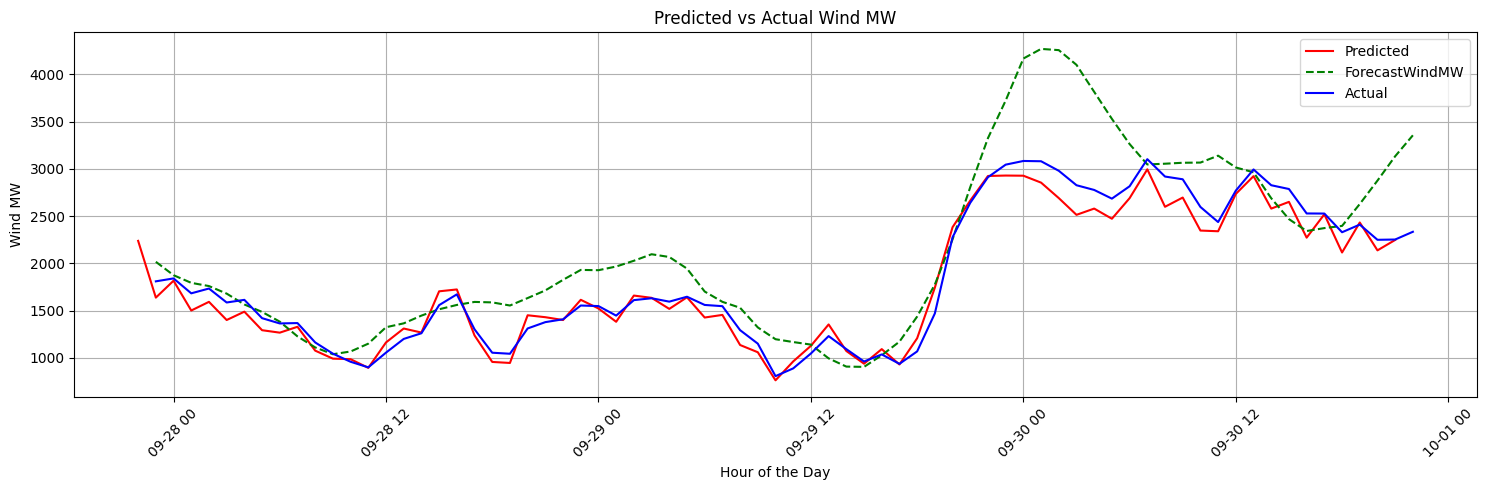

In [66]:


import pandas as pd
import matplotlib.pyplot as plt


# Align predictions with the hour they are predicting, not the hour of data used
# The index for predictions should be one hour ahead of the actuals
predictions_index = data_filtered.index[-72:] + pd.Timedelta(hours=-1)# This assumes predictions are for the next hour

# Create a DataFrame for predictions with the correct future index
predictions_df = pd.DataFrame(predictions, index=predictions_index, columns=['Predicted'])

# Create a DataFrame for actuals
actuals_df = pd.DataFrame(data_filtered['ActualWindMW'].iloc[-72:].values, index=data_filtered.index[-72:], columns=['Actual'])
# Create a DataFrame for the forecasted wind MW from another model or source
forecast_wind_df = pd.DataFrame(data['ForecastWndMW'].iloc[-72:].values, index=data_filtered.index[-72:], columns=['ForecastWindMW'])

# Combine all three DataFrames: predictions, actuals, and forecast wind
combined_df = pd.concat([predictions_df, actuals_df, forecast_wind_df], axis=1)

# Assuming combined_df is correctly aligned
combined_df['Hour'] = combined_df.index.hour

# Now plot the data
plt.figure(figsize=(15, 5))
plt.plot(combined_df.index, combined_df['Predicted'], 'r-', label='Predicted')
plt.plot(combined_df.index, combined_df['ForecastWindMW'], 'g--', label='ForecastWindMW')
plt.plot(combined_df.index, combined_df['Actual'], 'b-', label='Actual')  # Make sure this is correct

plt.legend()
plt.xlabel('Hour of the Day')
plt.ylabel('Wind MW')
plt.title('Predicted vs Actual Wind MW')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


1 month

In [70]:

# Simplify the dataset to include only necessary features
# Converting 'date' to datetime format and setting it as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Including specified features plus creating additional necessary features for modeling
selected_columns = [
    'Year', 'Month', 'DayTime', 'hour', 'isweekday',
    'average_temp', 'average_wind_speed', 'average_wind_dir', 'average_rain',
    'ActualWindMW'  # Target variable
]

# Filter the dataset to include only the selected columns
data_filtered = data[selected_columns]

# Generate lag features for ActualWindMW for 24 hours
for lag in range(1, 25):
    data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)

data_filtered['wind_power_lag48'] = data_filtered['ActualWindMW'].shift(48)
data_filtered['wind_power_lag72'] = data_filtered['ActualWindMW'].shift(72)

data_filtered['wind_power_lag48'] = data_filtered['ActualWindMW'].shift(124)
data_filtered['wind_power_lag72'] = data_filtered['ActualWindMW'].shift(300)
# Adding rolling averages and differences for 'ActualWindMW'
data_filtered['rolling_avg_wind'] = data_filtered['ActualWindMW'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_power'] = data_filtered['ActualWindMW'].diff().shift(1)


data_filtered['rolling_avg_wind_SPEED'] = data_filtered['average_wind_speed'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_SPEED'] = data_filtered['average_wind_speed'].diff().shift(1)

data_filtered['rolling_avg_wind_dir'] = data_filtered['average_wind_dir'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_dir'] = data_filtered['average_wind_dir'].diff().shift(1)
# Shift the target variable by one hour into the future
data_filtered['ActualWindMW_target'] = data_filtered['ActualWindMW'].shift(-1)

# Dropping rows with NaN values created by lagging
data_filtered.dropna(inplace=True)

data_filtered.head()


<ipython-input-70-e8951e99a1d0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-70-e8951e99a1d0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-70-e8951e99a1d0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Year Month    DayTime  hour  isweekday  average_temp  \
date                                                                        
2017-01-13 12:00:00  2017   Jan  13, 12:00    12       True     15.166667   
2017-01-13 13:00:00  2017   Jan  13, 13:00    13       True     15.333333   
2017-01-13 14:00:00  2017   Jan  13, 14:00    14       True     13.333333   
2017-01-13 15:00:00  2017   Jan  13, 15:00    15       True     11.500000   
2017-01-13 16:00:00  2017   Jan  13, 16:00    16       True     13.000000   

                     average_wind_speed  average_wind_dir  average_rain  \
date                                                                      
2017-01-13 12:00:00           15.166667        303.333333      0.033333   
2017-01-13 13:00:00           15.333333        303.333333      0.066667   
2017-01-13 14:00:00           13.333333        301.666667      0.016667   
2017-01-13 15:00:00           11.500000        303.333333      0.033333   
2017-01-13 16:00:00           13.000000        281.666667      0.000000   

                     ActualWindMW  ...  ActualWindMW_lag24  wind_power_lag48  \
date                               ...                                         
2017-01-13 12:00:00          1242  ...              1101.0             307.0   
2017-01-13 13:00:00          1022  ...              1446.0             311.0   
2017-01-13 14:00:00          1086  ...              1558.0             355.0   
2017-01-13 15:00:00          1212  ...              1636.0             421.0   
2017-01-13 16:00:00          1070  ...              1719.0             426.0   

                     wind_power_lag72  rolling_avg_wind  diff_wind_power  \
date                                                                       
2017-01-13 12:00:00            1214.0       1631.333333           -219.0   
2017-01-13 13:00:00            1123.0       1458.333333           -215.0   
2017-01-13 14:00:00            1528.0       1240.333333           -220.0   
2017-01-13 15:00:00            1612.0       1116.666667             64.0   
2017-01-13 16:00:00            1473.0       1106.666667            126.0   

                     rolling_avg_wind_SPEED  diff_wind_SPEED  \
date                                                           
2017-01-13 12:00:00               14.444444        -0.833333   
2017-01-13 13:00:00               14.666667         1.166667   
2017-01-13 14:00:00               14.833333         0.166667   
2017-01-13 15:00:00               14.611111        -2.000000   
2017-01-13 16:00:00               13.388889        -1.833333   

                     rolling_avg_wind_dir  diff_wind_dir  ActualWindMW_target  
date                                                                           
2017-01-13 12:00:00            301.111111      -1.666667               1022.0  
2017-01-13 13:00:00            301.666667       3.333333               1086.0  
2017-01-13 14:00:00            302.222222       0.000000               1212.0  
2017-01-13 15:00:00            302.777778      -1.666667               1070.0  
2017-01-13 16:00:00            302.777778       1.666667               1049.0  

[5 rows x 43 columns]

In [71]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
le = LabelEncoder()
data_filtered['Month'] = le.fit_transform(data_filtered['Month'])

# Splitting the dataset into training and testing sets
# We reserve the last 72 observations for testing to simulate forecasting the next 72 hours
training_data = data_filtered.iloc[:-720]
testing_data = data_filtered.iloc[-720:]

# Exclude target variable and non-numeric 'DayTime'
X_train = training_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_train = training_data['ActualWindMW_target']

X_test = testing_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_test = testing_data['ActualWindMW_target']



# Splitting the dataset into training and testing sets again
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Since RandomForest does not need feature scaling, we'll create a simple
# But you can add preprocessing steps here if needed.
pipeline = Pipeline([
    ('rf', RandomForestRegressor(random_state=42))
])

param_grid = {
    'rf__n_estimators': [300],  # Smaller range
    'rf__max_depth': [20],  # Added a mid-point for diversity
    'rf__min_samples_split': [2],
    'rf__min_samples_leaf': [2],
    'rf__max_features': ['sqrt']
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Save the best model
model_filename = 'rf_model_optimized.joblib'
joblib.dump(best_model, model_filename)
print(f'Model saved as {model_filename}')

# Predicting with the best model
predictions = best_model.predict(X_test)

# Calculate metrics
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}")



<ipython-input-71-013f828f5aeb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Month'] = le.fit_transform(data_filtered['Month'])


Best parameters: {'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}
Model saved as rf_model_optimized.joblib
MAE: 120.8753860364314, MSE: 32225.658191644587, RMSE: 179.51506396858338, R^2: 0.944201481821832


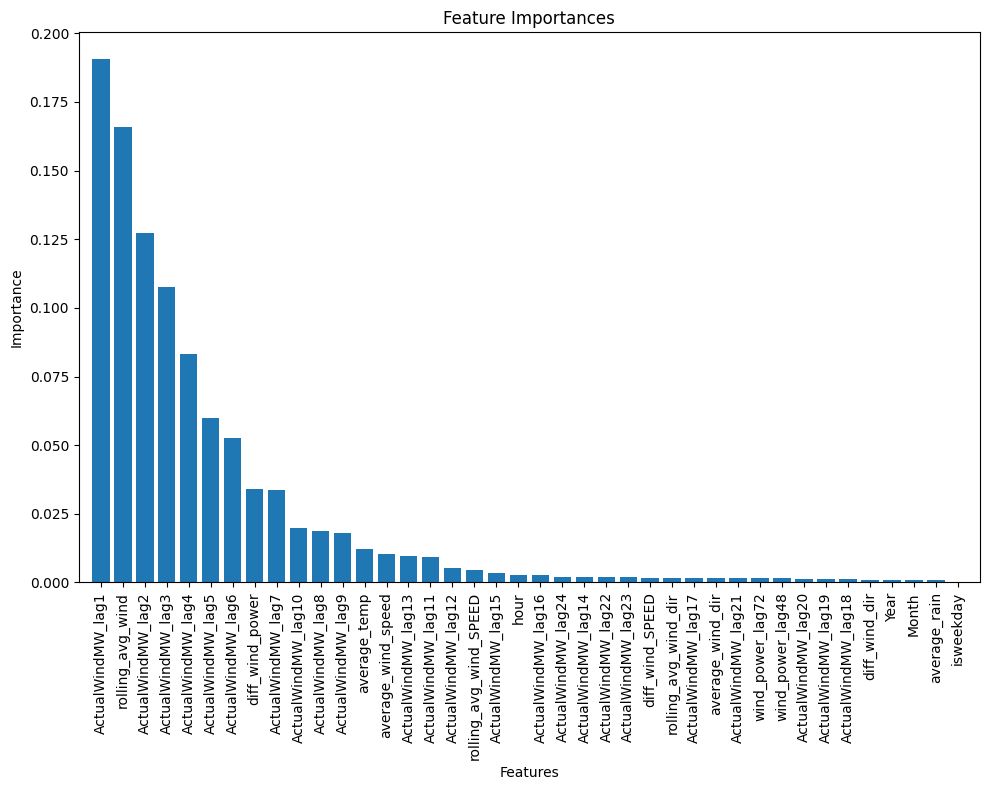

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train is your features DataFrame and best_model is your trained model
feature_names = X_train.columns

# Retrieving feature importances
feature_importances = best_model.named_steps['rf'].feature_importances_

# Sorting the features by their importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Visualizing the feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

In [73]:


import numpy as np

# Assuming y_true and y_pred are your arrays of actual and predicted values
y_true = np.array(y_test)    # Your actual values
predictions = predictions.flatten()  # Your predictions

# Calculate MAPE
mape = np.mean(np.abs((y_true - predictions) / y_true)) * 100

print(f"MAPE: {mape}%")


MAPE: 21.64998652066701%


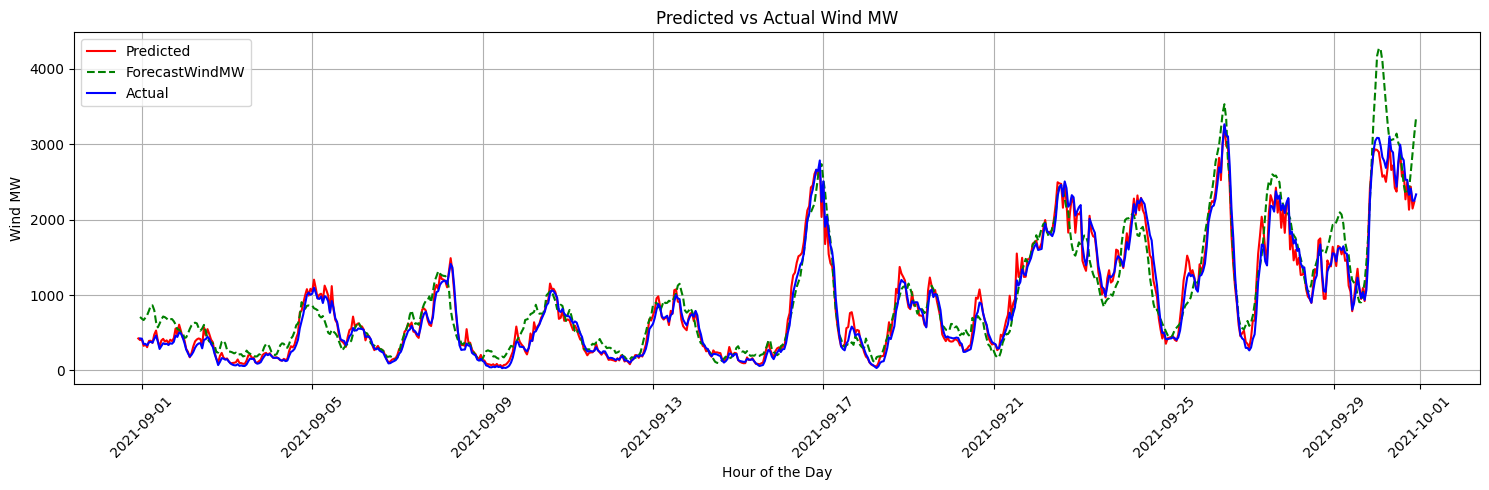

In [76]:

import pandas as pd
import matplotlib.pyplot as plt


# Align predictions with the hour they are predicting, not the hour of data used
# The index for predictions should be one hour ahead of the actuals
predictions_index = data_filtered.index[-720:] + pd.Timedelta(hours=-1)# This assumes predictions are for the next hour

# Create a DataFrame for predictions with the correct future index
predictions_df = pd.DataFrame(predictions, index=predictions_index, columns=['Predicted'])

# Create a DataFrame for actuals
actuals_df = pd.DataFrame(data_filtered['ActualWindMW'].iloc[-720:].values, index=data_filtered.index[-720:], columns=['Actual'])
# Create a DataFrame for the forecasted wind MW from another model or source
forecast_wind_df = pd.DataFrame(data['ForecastWndMW'].iloc[-720:].values, index=data_filtered.index[-720:], columns=['ForecastWindMW'])

# Combine all three DataFrames: predictions, actuals, and forecast wind
combined_df = pd.concat([predictions_df, actuals_df, forecast_wind_df], axis=1)

# Assuming combined_df is correctly aligned
combined_df['Hour'] = combined_df.index.hour

# Now plot the data
plt.figure(figsize=(15, 5))
plt.plot(combined_df.index, combined_df['Predicted'], 'r-', label='Predicted')
plt.plot(combined_df.index, combined_df['ForecastWindMW'], 'g--', label='ForecastWindMW')
plt.plot(combined_df.index, combined_df['Actual'], 'b-', label='Actual')  # Make sure this is correct

plt.legend()
plt.xlabel('Hour of the Day')
plt.ylabel('Wind MW')
plt.title('Predicted vs Actual Wind MW')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

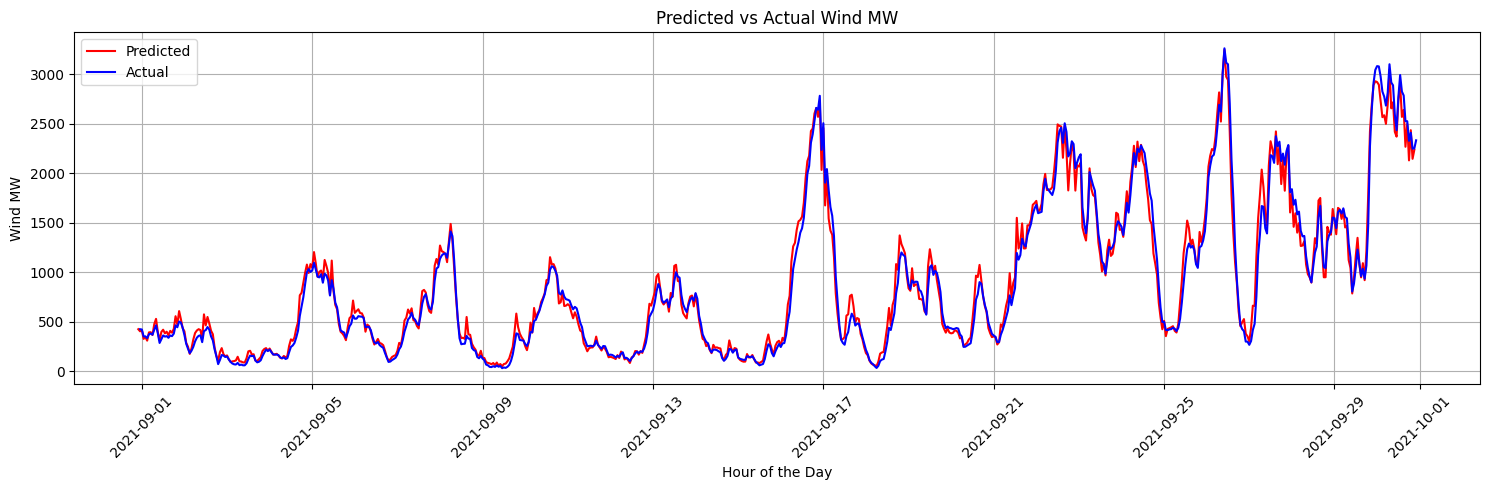

In [79]:

import pandas as pd
import matplotlib.pyplot as plt


# Align predictions with the hour they are predicting, not the hour of data used
# The index for predictions should be one hour ahead of the actuals
predictions_index = data_filtered.index[-720:] + pd.Timedelta(hours=-1)# This assumes predictions are for the next hour

# Create a DataFrame for predictions with the correct future index
predictions_df = pd.DataFrame(predictions, index=predictions_index, columns=['Predicted'])

# Create a DataFrame for actuals
actuals_df = pd.DataFrame(data_filtered['ActualWindMW'].iloc[-720:].values, index=data_filtered.index[-720:], columns=['Actual'])

# Combine all three DataFrames: predictions, actuals, and forecast wind
combined_df = pd.concat([predictions_df, actuals_df], axis=1)

# Assuming combined_df is correctly aligned
combined_df['Hour'] = combined_df.index.hour

# Now plot the data
plt.figure(figsize=(15, 5))
plt.plot(combined_df.index, combined_df['Predicted'], 'r-', label='Predicted')
plt.plot(combined_df.index, combined_df['Actual'], 'b-', label='Actual')  # Make sure this is correct

plt.legend()
plt.xlabel('Hour of the Day')
plt.ylabel('Wind MW')
plt.title('Predicted vs Actual Wind MW')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Extracting the last date from the dataset to start the forecast from the next hour
#last_date = data_filtered.index.max()

# Generating a date range for the next 24 hours starting from the last date + 1 hour
#forecast_dates = pd.date_range(start=last_date + pd.Timedelta(hours=1), periods=24, freq='H')

# Creating a DataFrame with the forecast dates and the predicted values
forecast_df2 = pd.DataFrame({
    #'DateTime': data_filtered['DayTime'].iloc[-24:],
    'ForecastedActualWindMW': predictions, #  predictions_ contains the last forecast
    'ActualWindMW': data_filtered['ActualWindMW'].iloc[-720:],
    'ForecastWindMW': data['ForecastWndMW'].iloc[-720:]
})


forecast_df2

ForecastedActualWindMW  ActualWindMW  ForecastWindMW
date                                                                     
2021-09-01 00:00:00              406.413355           421             709
2021-09-01 01:00:00              410.095381           351             686
2021-09-01 02:00:00              328.205010           352             668
2021-09-01 03:00:00              349.714692           334             699
2021-09-01 04:00:00              317.309734           373             733
...                                     ...           ...             ...
2021-09-30 19:00:00             2204.956658          2410            2396
2021-09-30 20:00:00             2403.685921          2249            2628
2021-09-30 21:00:00             2166.127722          2252            2876
2021-09-30 22:00:00             2255.805607          2334            3134
2021-09-30 23:00:00             2368.083181          2409            3356

[720 rows x 3 columns]

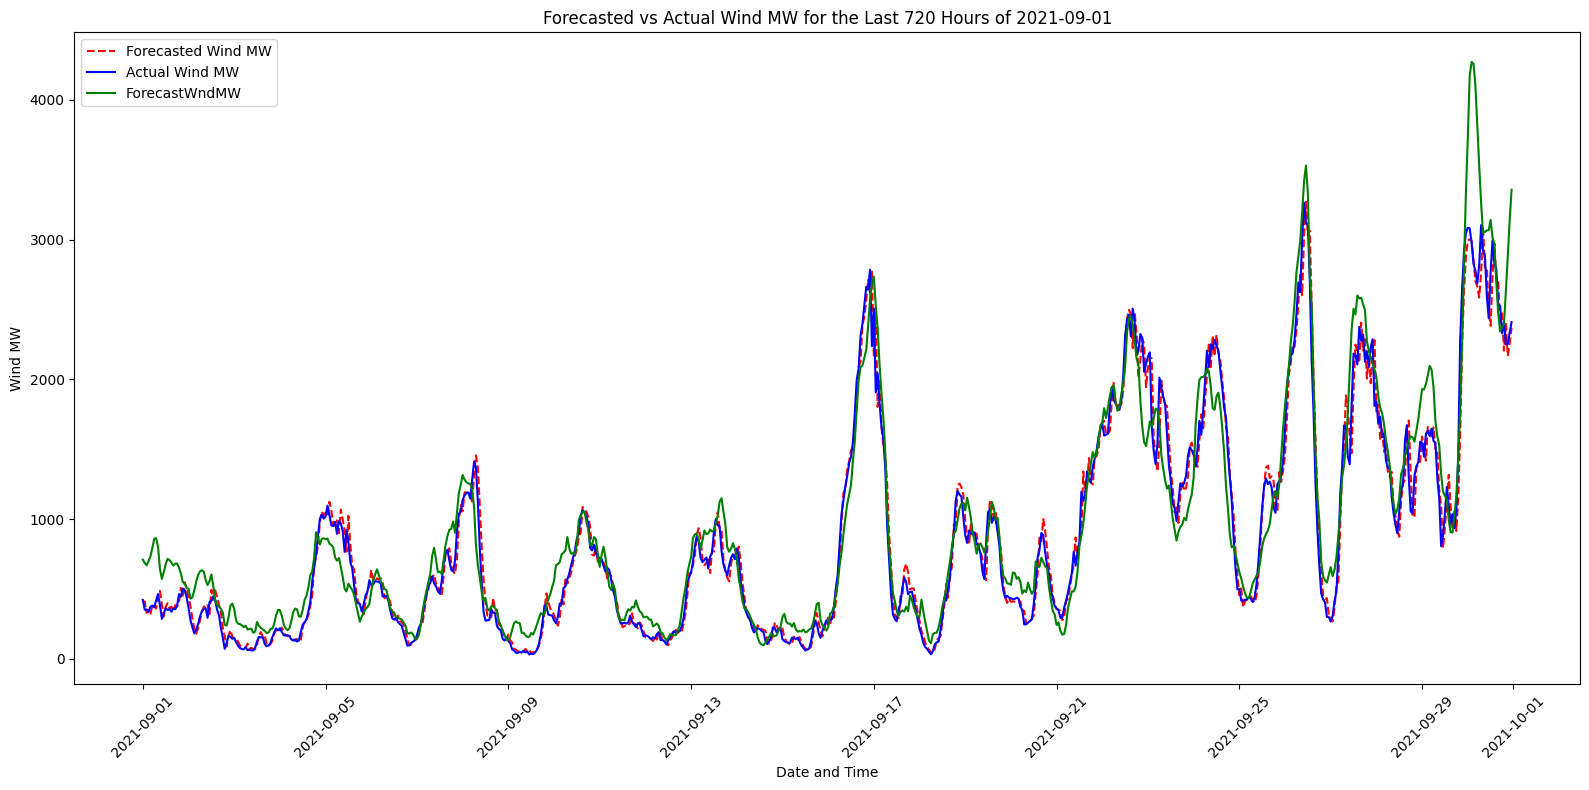

In [ ]:
# Given the structured DataFrame, we can visualize the forecasted versus actual wind MW using matplotlib

# Plotting the forecasted versus actual values
plt.figure(figsize=(16, 8))
plt.plot(forecast_df2.index, forecast_df2['ForecastedActualWindMW'], label='Forecasted Wind MW', color='red', linestyle='--')
plt.plot(forecast_df2.index, forecast_df2['ActualWindMW'], label='Actual Wind MW', color='blue')
plt.plot(forecast_df2.index, forecast_df2['ForecastWindMW'], label='ForecastWndMW', color='green')
plt.title('Forecasted vs Actual Wind MW for the Last 720 Hours of 2021-09-01')
plt.xlabel('Date and Time')
plt.ylabel('Wind MW')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Neural network model (NNM)

In [34]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler

# GitHub URL to your CSV file
github_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/IslandElectricity2017_2021v5.csv'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(github_url)
data['date'] = pd.to_datetime(data['date'])

# Display the first few rows of the DataFrame to understand its structure
print(data.columns)



Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'date', 'Unnamed: 0', 'Year', 'Month',
       'DayTime', ' REGION', 'ActualDemandMW', ' FORECAST DEMAND(MW)',
       'ForecastWndMW', 'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW',
       'EWIC_MW', 'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 'ra

In [18]:


# Simplify the dataset to include only necessary features
# Converting 'date' to datetime format and setting it as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Including specified features plus creating additional necessary features for modeling
selected_columns = [
    'Year', 'Month', 'DayTime', 'hour', 'isweekday',
    'average_temp', 'average_wind_speed', 'average_wind_dir', 'average_rain',
    'ActualWindMW'  # Target variable
]

# Filter the dataset to include only the selected columns
data_filtered = data[selected_columns]

# Generate lag features for ActualWindMW for 24 hours
for lag in range(1, 25):
    data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)

# Adding rolling averages and differences for 'ActualWindMW'
data_filtered['rolling_avg_wind'] = data_filtered['ActualWindMW'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_power'] = data_filtered['ActualWindMW'].diff().shift(1)


data_filtered['rolling_avg_wind_SPEED'] = data_filtered['average_wind_speed'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_SPEED'] = data_filtered['average_wind_speed'].diff().shift(1)

data_filtered['rolling_avg_wind_dir'] = data_filtered['average_wind_dir'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_dir'] = data_filtered['average_wind_dir'].diff().shift(1)

# Shift the target variable by one hour into the future
data_filtered['ActualWindMW_target'] = data_filtered['ActualWindMW'].shift(-1)



# Dropping rows with NaN values created by lagging
data_filtered.dropna(inplace=True)

data_filtered.head()




<ipython-input-18-6bb32f784407>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-18-6bb32f784407>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-18-6bb32f784407>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Year Month    DayTime  hour  isweekday  average_temp  \
date                                                                        
2017-01-02 00:00:00  2017   Jan  02, 00:00     0       True      6.666667   
2017-01-02 01:00:00  2017   Jan  02, 01:00     1       True      6.500000   
2017-01-02 02:00:00  2017   Jan  02, 02:00     2       True      7.000000   
2017-01-02 03:00:00  2017   Jan  02, 03:00     3       True      6.500000   
2017-01-02 04:00:00  2017   Jan  02, 04:00     4       True      7.333333   

                     average_wind_speed  average_wind_dir  average_rain  \
date                                                                      
2017-01-02 00:00:00            6.666667        125.000000      0.000000   
2017-01-02 01:00:00            6.500000        140.000000      0.000000   
2017-01-02 02:00:00            7.000000        141.666667      0.016667   
2017-01-02 03:00:00            6.500000        146.666667      0.000000   
2017-01-02 04:00:00            7.333333        141.666667      0.000000   

                     ActualWindMW  ...  ActualWindMW_lag22  \
date                               ...                       
2017-01-02 00:00:00          1313  ...              1528.0   
2017-01-02 01:00:00          1269  ...              1612.0   
2017-01-02 02:00:00          1053  ...              1473.0   
2017-01-02 03:00:00          1071  ...              1678.0   
2017-01-02 04:00:00           904  ...              1710.0   

                     ActualWindMW_lag23  ActualWindMW_lag24  rolling_avg_wind  \
date                                                                            
2017-01-02 00:00:00              1123.0              1214.0       1622.000000   
2017-01-02 01:00:00              1528.0              1123.0       1467.666667   
2017-01-02 02:00:00              1612.0              1528.0       1354.333333   
2017-01-02 03:00:00              1473.0              1612.0       1211.666667   
2017-01-02 04:00:00              1678.0              1473.0       1131.000000   

                     diff_wind_power  rolling_avg_wind_SPEED  diff_wind_SPEED  \
date                                                                            
2017-01-02 00:00:00           -128.0               14.277778        -1.666667   
2017-01-02 01:00:00           -168.0               11.555556        -6.500000   
2017-01-02 02:00:00            -44.0                8.777778        -0.166667   
2017-01-02 03:00:00           -216.0                6.722222         0.500000   
2017-01-02 04:00:00             18.0                6.666667        -0.500000   

                     rolling_avg_wind_dir  diff_wind_dir  ActualWindMW_target  
date                                                                           
2017-01-02 00:00:00             81.111111     -55.000000               1269.0  
2017-01-02 01:00:00             77.777778      98.333333               1053.0  
2017-01-02 02:00:00             97.222222      15.000000               1071.0  
2017-01-02 03:00:00            135.555556       1.666667                904.0  
2017-01-02 04:00:00            142.777778       5.000000                818.0  

[5 rows x 41 columns]

In [19]:
pip install -U keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.6 MB/s eta 0:00:00


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import kerastuner as kt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
le = LabelEncoder()
data_filtered['Month'] = le.fit_transform(data_filtered['Month'])

# Splitting the dataset into training and testing sets
# We reserve the last 24 observations for testing to simulate forecasting the next 24 hours It's good practice to reserve the last 24 observations for testing
training_data = data_filtered.iloc[:-24]
testing_data = data_filtered.iloc[-24:]

# Exclude target variable and non-numeric 'DayTime'
X_train = training_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_train = training_data['ActualWindMW_target']

X_test = testing_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_test = testing_data['ActualWindMW_target']

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Early Stopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,   #How many epochs to wait after the last time the monitored metric improved
    restore_best_weights=True
)

# Data preparation and normalization...
def model_builder(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    for i in range(hp.Int('layers', 1, 3)):
        model.add(Dense(hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

tuner = kt.Hyperband(model_builder,
                     objective='val_mae',
                     max_epochs=10,
                     directory='my_dir',
                     project_name='intro_to_kt')

# Perform the hyperparameter search
tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

# Extract the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Set epochs. You might want to manually set this based on the tuner's output or your preference
epochs = 20  # Example value, adjust based on your needs or tuner results

# Train the best model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=epochs, batch_size=32, verbose=1)

# Evaluate the model
loss, mae, mse = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test MAE: {mae}, Test MSE: {mse}")

# Predicting with the model
predictions = model.predict(X_test_scaled)

Trial 30 Complete [00h 00m 20s]
val_mae: 151.68638610839844

Best val_mae So Far: 149.01712036132812
Total elapsed time: 00h 08m 01s
Epoch 1/20
1040/1040 [==============================] - 5s 4ms/step - loss: 256964.0000 - mae: 325.2872 - mse: 256964.0000 - val_loss: 64866.1797 - val_mae: 196.4457 - val_mse: 64866.1797
Epoch 2/20
1040/1040 [==============================] - 4s 4ms/step - loss: 52537.6992 - mae: 168.2150 - mse: 52537.6992 - val_loss: 45800.8477 - val_mae: 158.7723 - val_mse: 45800.8477
Epoch 3/20
1040/1040 [==============================] - 4s 4ms/step - loss: 48593.0977 - mae: 160.1906 - mse: 48593.0977 - val_loss: 45005.6797 - val_mae: 156.6064 - val_mse: 45005.6797
Epoch 4/20
1040/1040 [==============================] - 4s 4ms/step - loss: 47896.7109 - mae: 158.5757 - mse: 47896.7109 - val_loss: 43753.5469 - val_mae: 151.5740 - val_mse: 43753.5469
Epoch 5/20
1040/1040 [==============================] - 4s 4ms/step - loss: 47311.0703 - mae: 157.0675 - mse: 47311.0703 

Sequential Model: The Sequential model is a linear stack of layers in Keras, making it straightforward to create a model by successively adding layers.

Dense Layer: Dense represents a densely-connected (also known as fully connected) neural network layer, where each neuron in the layer receives input from all neurons of the previous layer. The first argument units is the number of neurons in the layer, which is a hyperparameter that Keras Tuner will optimize. The activation argument specifies the activation function to use, in this case, 'relu' (Rectified Linear Activation).

Dropout Layer: Dropout is a regularization technique where input units are randomly set to 0 at each update during training time, which helps prevent overfitting. The dropout rate (dropout) is the fraction of the input units to drop, which is also a hyperparameter for optimization.

Hyperparameters:

hp.Int('units', min_value=32, max_value=512, step=32): This line defines a search space for the number of units in the Dense layers, ranging from 32 to 512 with a step of 32. Keras Tuner will explore different values within this range to find the best number of neurons.
hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1): This specifies the search space for the dropout rate, ranging from 0.0 to 0.5 with a step of 0.1.
For Loop for Additional Layers: The loop adds a variable number of additional Dense layers followed by Dropout layers, based on another hyperparameter layers that specifies how many such pairs to add. Each additional layer can have its own number of units and dropout rate, which are also optimized.

Output Layer: The final Dense layer has 1 unit, making it suitable for regression tasks (predicting a single continuous value). No activation function is specified for this layer, implying a linear activation (default).

Compilation: The model is compiled with the 'adam' optimizer and 'mean_squared_error' as the loss function, which is common for regression tasks. Metrics for evaluation include MAE (Mean Absolute Error) and MSE (Mean Squared Error).

In [21]:

# Calculate metrics
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}")

MAE: 178.4991251627604, MSE: 62182.531827678285, RMSE: 249.36425531274182, R^2: 0.1474844465903059


In [23]:

import numpy as np

# Assuming y_true and y_pred are your arrays of actual and predicted values
y_true = np.array(y_test)    # Your actual values
y_pred = predictions.flatten()  # Your predictions

# Calculate MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"MAPE: {mape}%")


MAPE: 6.577512053024187%


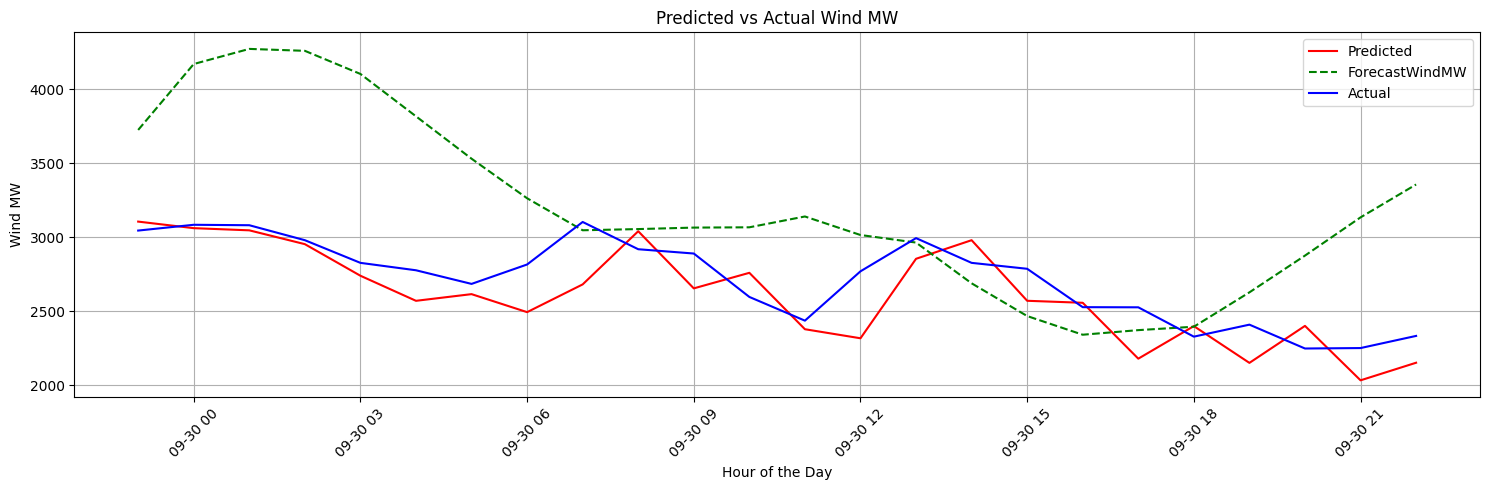

In [24]:


import pandas as pd
import matplotlib.pyplot as plt


# Align predictions with the hour they are predicting, not the hour of data used
# The index for predictions should be one hour ahead of the actuals
predictions_index = data_filtered.index[-24:]  # This assumes predictions are for the next hour

# Create a DataFrame for predictions with the correct future index
predictions_df = pd.DataFrame(predictions, index=predictions_index, columns=['Predicted'])

# Create a DataFrame for actuals
actuals_df = pd.DataFrame(data_filtered['ActualWindMW'].iloc[-24:].values, index=data_filtered.index[-24:], columns=['Actual'])
# Create a DataFrame for the forecasted wind MW from another model or source
forecast_wind_df = pd.DataFrame(data['ForecastWndMW'].iloc[-24:].values, index=data_filtered.index[-24:], columns=['ForecastWindMW'])

# Combine all three DataFrames: predictions, actuals, and forecast wind
combined_df = pd.concat([predictions_df, actuals_df, forecast_wind_df], axis=1)

# Assuming combined_df is correctly aligned
combined_df['Hour'] = combined_df.index.hour

# Now plot the data
plt.figure(figsize=(15, 5))
plt.plot(combined_df.index, combined_df['Predicted'], 'r-', label='Predicted')
plt.plot(combined_df.index, combined_df['ForecastWindMW'], 'g--', label='ForecastWindMW')
plt.plot(combined_df.index, combined_df['Actual'], 'b-', label='Actual')  # Make sure this is correct

plt.legend()
plt.xlabel('Hour of the Day')
plt.ylabel('Wind MW')
plt.title('Predicted vs Actual Wind MW')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

 model was trained to predict the wind power at the current hour (t) based on the wind power from the previous hours (t-1, t-2, ..., t-24), then using pd.Timedelta(hours=-1) would indeed correctly align the predictions with the actuals because no shifting would be necessary.

it appears that the use of pd.Timedelta(hours=-1) effectively aligns your predicted data with the actual observations in a way that matches your expectations for the forecast. This suggests that your model may be predicting the wind power for the current hour (t) using data from the past (t-1 and earlier).

In this case, your forecasted data does not need to be shifted forward because it's already aligned with the timeframe it's predicting for, which is the same as the timeframe of the input data. The forecast is understood to be for the current hour based on past data up to the previous hour. This method works well when you are continually updating the model with new data as it comes in and using it to make a prediction for the current hour.

72 hour

In [26]:


# Simplify the dataset to include only necessary features
# Converting 'date' to datetime format and setting it as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Including specified features plus creating additional necessary features for modeling
selected_columns = [
    'Year', 'Month', 'DayTime', 'hour', 'isweekday',
    'average_temp', 'average_wind_speed', 'average_wind_dir', 'average_rain',
    'ActualWindMW'  # Target variable
]

# Filter the dataset to include only the selected columns
data_filtered = data[selected_columns]

# Generate lag features for ActualWindMW for 24 hours
for lag in range(1, 25):
    data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
data_filtered['wind_power_lag48'] = data_filtered['ActualWindMW'].shift(48)
data_filtered['wind_power_lag72'] = data_filtered['ActualWindMW'].shift(72)
# Adding rolling averages and differences for 'ActualWindMW'
data_filtered['rolling_avg_wind'] = data_filtered['ActualWindMW'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_power'] = data_filtered['ActualWindMW'].diff().shift(1)


data_filtered['rolling_avg_wind_SPEED'] = data_filtered['average_wind_speed'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_SPEED'] = data_filtered['average_wind_speed'].diff().shift(1)

data_filtered['rolling_avg_wind_dir'] = data_filtered['average_wind_dir'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_dir'] = data_filtered['average_wind_dir'].diff().shift(1)

# Shift the target variable by one hour into the future
data_filtered['ActualWindMW_target'] = data_filtered['ActualWindMW'].shift(-1)



# Dropping rows with NaN values created by lagging
data_filtered.dropna(inplace=True)

data_filtered.head()


<ipython-input-26-3af4e3110757>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-26-3af4e3110757>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-26-3af4e3110757>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Year Month    DayTime  hour  isweekday  average_temp  \
date                                                                        
2017-01-04 00:00:00  2017   Jan  04, 00:00     0       True      3.666667   
2017-01-04 01:00:00  2017   Jan  04, 01:00     1       True      2.833333   
2017-01-04 02:00:00  2017   Jan  04, 02:00     2       True      4.333333   
2017-01-04 03:00:00  2017   Jan  04, 03:00     3       True      4.833333   
2017-01-04 04:00:00  2017   Jan  04, 04:00     4       True      5.666667   

                     average_wind_speed  average_wind_dir  average_rain  \
date                                                                      
2017-01-04 00:00:00            3.666667        191.666667      0.066667   
2017-01-04 01:00:00            2.833333        216.666667      0.000000   
2017-01-04 02:00:00            4.333333        265.000000      0.000000   
2017-01-04 03:00:00            4.833333        273.333333      0.033333   
2017-01-04 04:00:00            5.666667        263.333333      0.000000   

                     ActualWindMW  ...  ActualWindMW_lag24  wind_power_lag48  \
date                               ...                                         
2017-01-04 00:00:00           624  ...               262.0            1313.0   
2017-01-04 01:00:00           660  ...               259.0            1269.0   
2017-01-04 02:00:00           628  ...               364.0            1053.0   
2017-01-04 03:00:00           608  ...               364.0            1071.0   
2017-01-04 04:00:00           520  ...               466.0             904.0   

                     wind_power_lag72  rolling_avg_wind  diff_wind_power  \
date                                                                       
2017-01-04 00:00:00            1214.0        634.000000             13.0   
2017-01-04 01:00:00            1123.0        623.666667             -6.0   
2017-01-04 02:00:00            1528.0        638.000000             36.0   
2017-01-04 03:00:00            1612.0        637.333333            -32.0   
2017-01-04 04:00:00            1473.0        632.000000            -20.0   

                     rolling_avg_wind_SPEED  diff_wind_SPEED  \
date                                                           
2017-01-04 00:00:00               14.833333         1.500000   
2017-01-04 01:00:00               11.277778       -12.166667   
2017-01-04 02:00:00                7.444444        -0.833333   
2017-01-04 03:00:00                3.611111         1.500000   
2017-01-04 04:00:00                4.000000         0.500000   

                     rolling_avg_wind_dir  diff_wind_dir  ActualWindMW_target  
date                                                                           
2017-01-04 00:00:00            235.000000      10.000000                660.0  
2017-01-04 01:00:00            222.777778     -51.666667                628.0  
2017-01-04 02:00:00            217.222222      25.000000                608.0  
2017-01-04 03:00:00            224.444444      48.333333                520.0  
2017-01-04 04:00:00            251.666667       8.333333                449.0  

[5 rows x 43 columns]

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import kerastuner as kt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
le = LabelEncoder()
data_filtered['Month'] = le.fit_transform(data_filtered['Month'])

# Splitting the dataset into training and testing sets
# We reserve the last 24 observations for testing to simulate forecasting the next 24 hours It's good practice to reserve the last 24 observations for testing
training_data = data_filtered.iloc[:-72]
testing_data = data_filtered.iloc[-72:]

# Exclude target variable and non-numeric 'DayTime'
X_train = training_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_train = training_data['ActualWindMW_target']

X_test = testing_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_test = testing_data['ActualWindMW_target']

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Early Stopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,   #How many epochs to wait after the last time the monitored metric improved
    restore_best_weights=True
)

# Data preparation and normalization...
def model_builder(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    for i in range(hp.Int('layers', 1, 3)):
        model.add(Dense(hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

tuner = kt.Hyperband(model_builder,
                     objective='val_mae',
                     max_epochs=10,
                     directory='my_dir',
                     project_name='intro_to_kt')

# Perform the hyperparameter search
tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

# Extract the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Set epochs. You might want to manually set this based on the tuner's output or your preference
epochs = 20  # Example value, adjust based on your needs or tuner results

# Train the best model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=epochs, batch_size=32, verbose=1)

# Evaluate the model
loss, mae, mse = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test MAE: {mae}, Test MSE: {mse}")

# Predicting with the model
predictions = model.predict(X_test_scaled)

<ipython-input-27-c528551c7fda>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Month'] = le.fit_transform(data_filtered['Month'])


Reloading Tuner from my_dir/intro_to_kt/tuner0.json
Epoch 1/20
1037/1037 [==============================] - 5s 4ms/step - loss: 266469.8750 - mae: 331.3477 - mse: 266469.8750 - val_loss: 59264.5508 - val_mae: 185.6174 - val_mse: 59264.5508
Epoch 2/20
1037/1037 [==============================] - 4s 4ms/step - loss: 52201.4141 - mae: 168.0017 - mse: 52201.4141 - val_loss: 45287.9297 - val_mae: 158.3864 - val_mse: 45287.9297
Epoch 3/20
1037/1037 [==============================] - 5s 5ms/step - loss: 48786.6016 - mae: 160.5097 - mse: 48786.6016 - val_loss: 45007.5156 - val_mae: 156.7183 - val_mse: 45007.5156
Epoch 4/20
1037/1037 [==============================] - 4s 4ms/step - loss: 47831.2539 - mae: 158.5234 - mse: 47831.2539 - val_loss: 46918.6758 - val_mae: 161.8324 - val_mse: 46918.6758
Epoch 5/20
1037/1037 [==============================] - 4s 4ms/step - loss: 47727.2578 - mae: 158.1851 - mse: 47727.2578 - val_loss: 44389.2266 - val_mae: 154.1361 - val_mse: 44389.2266
Epoch 6/20
1037/

In [28]:

# Calculate metrics
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}")
import numpy as np

# Assuming y_true and y_pred are your arrays of actual and predicted values
y_true = np.array(y_test)    # Your actual values
y_pred = predictions.flatten()  # Your predictions

# Calculate MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"MAPE: {mape}%")


MAE: 203.80846489800348, MSE: 79205.46259612258, RMSE: 281.4346506671177, R^2: 0.8492529934723572
MAPE: 13.125022985405307%


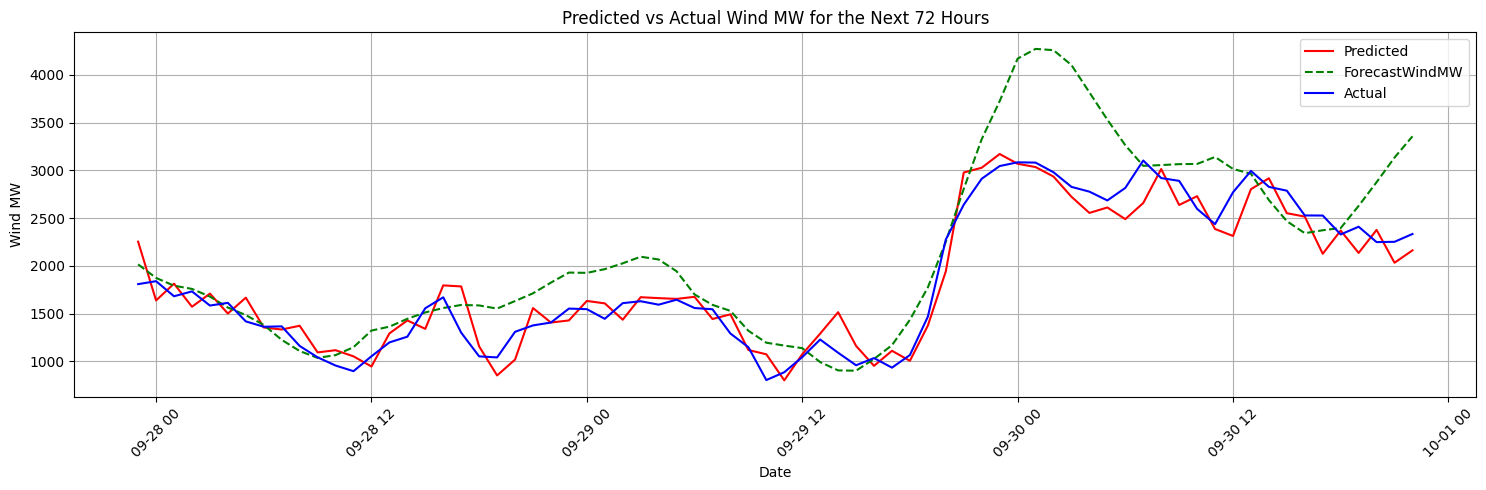

In [29]:

# The index for predictions should match the last 72 observations
predictions_index = data_filtered.index[-72:]  # Ensure this index is correct

# Create a DataFrame for predictions with the correct future index
predictions_df = pd.DataFrame(y_pred, index=predictions_index, columns=['Predicted'])

# Ensure actuals_df aligns with these 72 predictions
actuals_df = pd.DataFrame(data_filtered['ActualWindMW'].iloc[-72:].values, index=predictions_index, columns=['Actual'])

# Ensure forecast_wind_df is prepared correctly for the last 72 hours as well
forecast_wind_df = pd.DataFrame(data['ForecastWndMW'].iloc[-72:].values, index=predictions_index, columns=['ForecastWindMW'])

# Combine all three DataFrames
combined_df = pd.concat([predictions_df, actuals_df, forecast_wind_df], axis=1)

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(combined_df.index, combined_df['Predicted'], 'r-', label='Predicted')
plt.plot(combined_df.index, combined_df['ForecastWindMW'], 'g--', label='ForecastWindMW')
plt.plot(combined_df.index, combined_df['Actual'], 'b-', label='Actual')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Wind MW')
plt.title('Predicted vs Actual Wind MW for the Next 72 Hours')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

In [30]:
combined_df

Predicted  Actual  ForecastWindMW
date                                                    
2021-09-27 23:00:00  2253.266602    1809            2016
2021-09-28 00:00:00  1638.343262    1840            1874
2021-09-28 01:00:00  1813.986694    1682            1793
2021-09-28 02:00:00  1572.369995    1733            1759
2021-09-28 03:00:00  1709.811401    1585            1679
...                          ...     ...             ...
2021-09-30 18:00:00  2369.899414    2329            2396
2021-09-30 19:00:00  2135.506836    2410            2628
2021-09-30 20:00:00  2376.308105    2249            2876
2021-09-30 21:00:00  2032.981323    2252            3134
2021-09-30 22:00:00  2162.654785    2334            3356

[72 rows x 3 columns]

1 month

In [35]:


# Simplify the dataset to include only necessary features
# Converting 'date' to datetime format and setting it as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Including specified features plus creating additional necessary features for modeling
selected_columns = [
    'Year', 'Month', 'DayTime', 'hour', 'isweekday',
    'average_temp', 'average_wind_speed', 'average_wind_dir', 'average_rain',
    'ActualWindMW'  # Target variable
]

# Filter the dataset to include only the selected columns
data_filtered = data[selected_columns]

# Generate lag features for ActualWindMW for 24 hours
for lag in range(1, 25):
    data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
data_filtered['wind_power_lag48'] = data_filtered['ActualWindMW'].shift(48)
data_filtered['wind_power_lag72'] = data_filtered['ActualWindMW'].shift(72)
data_filtered['wind_power_lag48'] = data_filtered['ActualWindMW'].shift(125)
data_filtered['wind_power_lag72'] = data_filtered['ActualWindMW'].shift(720)
# Adding rolling averages and differences for 'ActualWindMW'
data_filtered['rolling_avg_wind'] = data_filtered['ActualWindMW'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_power'] = data_filtered['ActualWindMW'].diff().shift(1)


data_filtered['rolling_avg_wind_SPEED'] = data_filtered['average_wind_speed'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_SPEED'] = data_filtered['average_wind_speed'].diff().shift(1)

data_filtered['rolling_avg_wind_dir'] = data_filtered['average_wind_dir'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_dir'] = data_filtered['average_wind_dir'].diff().shift(1)

# Shift the target variable by one hour into the future
data_filtered['ActualWindMW_target'] = data_filtered['ActualWindMW'].shift(-1)



# Dropping rows with NaN values created by lagging
data_filtered.dropna(inplace=True)

data_filtered.head()


<ipython-input-35-de545aca70da>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-35-de545aca70da>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-35-de545aca70da>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Year Month    DayTime  hour  isweekday  average_temp  \
date                                                                        
2017-01-31 00:00:00  2017   Jan  31, 00:00     0       True     10.000000   
2017-01-31 01:00:00  2017   Jan  31, 01:00     1       True      9.166667   
2017-01-31 02:00:00  2017   Jan  31, 02:00     2       True      8.333333   
2017-01-31 03:00:00  2017   Jan  31, 03:00     3       True      6.000000   
2017-01-31 04:00:00  2017   Jan  31, 04:00     4       True      5.500000   

                     average_wind_speed  average_wind_dir  average_rain  \
date                                                                      
2017-01-31 00:00:00           10.000000        168.333333      0.466667   
2017-01-31 01:00:00            9.166667        166.666667      0.500000   
2017-01-31 02:00:00            8.333333        186.666667      0.166667   
2017-01-31 03:00:00            6.000000        145.000000      0.866667   
2017-01-31 04:00:00            5.500000        166.666667      0.400000   

                     ActualWindMW  ...  ActualWindMW_lag24  wind_power_lag48  \
date                               ...                                         
2017-01-31 00:00:00          1133  ...               491.0            3069.0   
2017-01-31 01:00:00           871  ...               723.0            3069.0   
2017-01-31 02:00:00           629  ...               844.0            3040.0   
2017-01-31 03:00:00           418  ...               810.0            3000.0   
2017-01-31 04:00:00           269  ...               960.0            2900.0   

                     wind_power_lag72  rolling_avg_wind  diff_wind_power  \
date                                                                       
2017-01-31 00:00:00            1214.0       1629.000000           -215.0   
2017-01-31 01:00:00            1123.0       1398.666667           -291.0   
2017-01-31 02:00:00            1528.0       1142.666667           -262.0   
2017-01-31 03:00:00            1612.0        877.666667           -242.0   
2017-01-31 04:00:00            1473.0        639.333333           -211.0   

                     rolling_avg_wind_SPEED  diff_wind_SPEED  \
date                                                           
2017-01-31 00:00:00               12.388889        -1.666667   
2017-01-31 01:00:00               11.333333        -1.166667   
2017-01-31 02:00:00               10.111111        -0.833333   
2017-01-31 03:00:00                9.166667        -0.833333   
2017-01-31 04:00:00                7.833333        -2.333333   

                     rolling_avg_wind_dir  diff_wind_dir  ActualWindMW_target  
date                                                                           
2017-01-31 00:00:00            167.777778       8.333333                871.0  
2017-01-31 01:00:00            173.333333     -11.666667                629.0  
2017-01-31 02:00:00            171.666667      -1.666667                418.0  
2017-01-31 03:00:00            173.888889      20.000000                269.0  
2017-01-31 04:00:00            166.111111     -41.666667                189.0  

[5 rows x 43 columns]

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import kerastuner as kt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
le = LabelEncoder()
data_filtered['Month'] = le.fit_transform(data_filtered['Month'])

# Splitting the dataset into training and testing sets
# We reserve the last 24 observations for testing to simulate forecasting the next 24 hours It's good practice to reserve the last 24 observations for testing
training_data = data_filtered.iloc[:-720]
testing_data = data_filtered.iloc[-720:]

# Exclude target variable and non-numeric 'DayTime'
X_train = training_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_train = training_data['ActualWindMW_target']

X_test = testing_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_test = testing_data['ActualWindMW_target']

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Early Stopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,   #How many epochs to wait after the last time the monitored metric improved
    restore_best_weights=True
)

# Data preparation and normalization...
def model_builder(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    for i in range(hp.Int('layers', 1, 3)):
        model.add(Dense(hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

tuner = kt.Hyperband(model_builder,
                     objective='val_mae',
                     max_epochs=10,
                     directory='my_dir',
                     project_name='intro_to_kt')

# Perform the hyperparameter search
tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

# Extract the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Set epochs. You might want to manually set this based on the tuner's output or your preference
epochs = 20  # Example value, adjust based on your needs or tuner results

# Train the best model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=epochs, batch_size=32, verbose=1)

# Evaluate the model
loss, mae, mse = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test MAE: {mae}, Test MSE: {mse}")

# Predicting with the model
predictions = model.predict(X_test_scaled)

<ipython-input-37-b03f0c3dfa5a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Month'] = le.fit_transform(data_filtered['Month'])


Reloading Tuner from my_dir/intro_to_kt/tuner0.json
Epoch 1/20
1005/1005 [==============================] - 5s 5ms/step - loss: 272899.3750 - mae: 336.9866 - mse: 272899.3750 - val_loss: 68873.8438 - val_mae: 202.9371 - val_mse: 68873.8438
Epoch 2/20
1005/1005 [==============================] - 5s 5ms/step - loss: 55088.3359 - mae: 173.7601 - mse: 55088.3359 - val_loss: 49800.2930 - val_mae: 166.2188 - val_mse: 49800.2930
Epoch 3/20
1005/1005 [==============================] - 4s 4ms/step - loss: 49084.4141 - mae: 161.4791 - mse: 49084.4141 - val_loss: 47897.5938 - val_mae: 160.0648 - val_mse: 47897.5938
Epoch 4/20
1005/1005 [==============================] - 4s 4ms/step - loss: 48709.1562 - mae: 159.5602 - mse: 48709.1562 - val_loss: 49784.7617 - val_mae: 165.1392 - val_mse: 49784.7617
Epoch 5/20
1005/1005 [==============================] - 4s 4ms/step - loss: 47835.1484 - mae: 158.4643 - mse: 47835.1484 - val_loss: 45868.9570 - val_mae: 155.2177 - val_mse: 45868.9570
Epoch 6/20
1005/

In [38]:

# Calculate metrics
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}")
import numpy as np

# Assuming y_true and y_pred are your arrays of actual and predicted values
y_true = np.array(y_test)    # Your actual values
y_pred = predictions.flatten()  # Your predictions

# Calculate MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"MAPE: {mape}%")


MAE: 149.3941499710083, MSE: 39038.51383232478, RMSE: 197.58166370471926, R^2: 0.932405066460786
MAPE: 42.74411503397865%


model appears to be quite predictive (as indicated by a high R² value) but also shows a relatively high average percentage error in predictions (as indicated by the MAPE). This discrepancy might suggest that while the model captures the variance in the dataset well, the scale of its errors when they occur can be substantial, particularly for certain observations or under specific conditions.

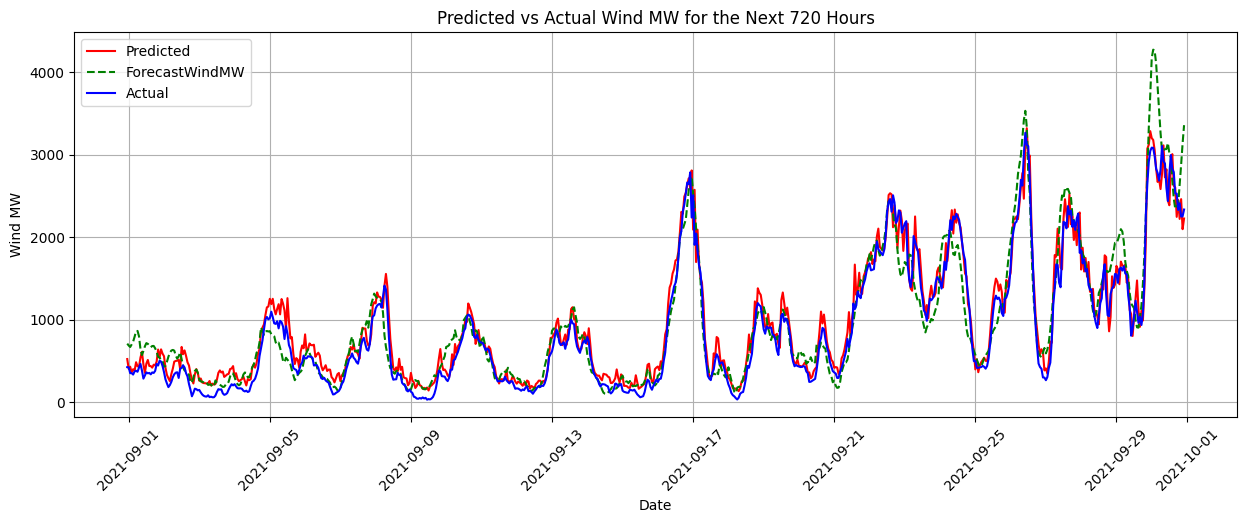

In [39]:

# The index for predictions should match the last 72 observations
predictions_index = data_filtered.index[-720:]  # Ensure this index is correct

# Create a DataFrame for predictions with the correct future index
predictions_df = pd.DataFrame(y_pred, index=predictions_index, columns=['Predicted'])

# Ensure actuals_df aligns with these 72 predictions
actuals_df = pd.DataFrame(data_filtered['ActualWindMW'].iloc[-720:].values, index=predictions_index, columns=['Actual'])

# Ensure forecast_wind_df is prepared correctly for the last 72 hours as well
forecast_wind_df = pd.DataFrame(data['ForecastWndMW'].iloc[-720:].values, index=predictions_index, columns=['ForecastWindMW'])

# Combine all three DataFrames
combined_df = pd.concat([predictions_df, actuals_df, forecast_wind_df], axis=1)

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(combined_df.index, combined_df['Predicted'], 'r-', label='Predicted')
plt.plot(combined_df.index, combined_df['ForecastWindMW'], 'g--', label='ForecastWindMW')
plt.plot(combined_df.index, combined_df['Actual'], 'b-', label='Actual')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Wind MW')
plt.title('Predicted vs Actual Wind MW for the Next 720 Hours')
plt.xticks(rotation=45)
plt.grid(True)

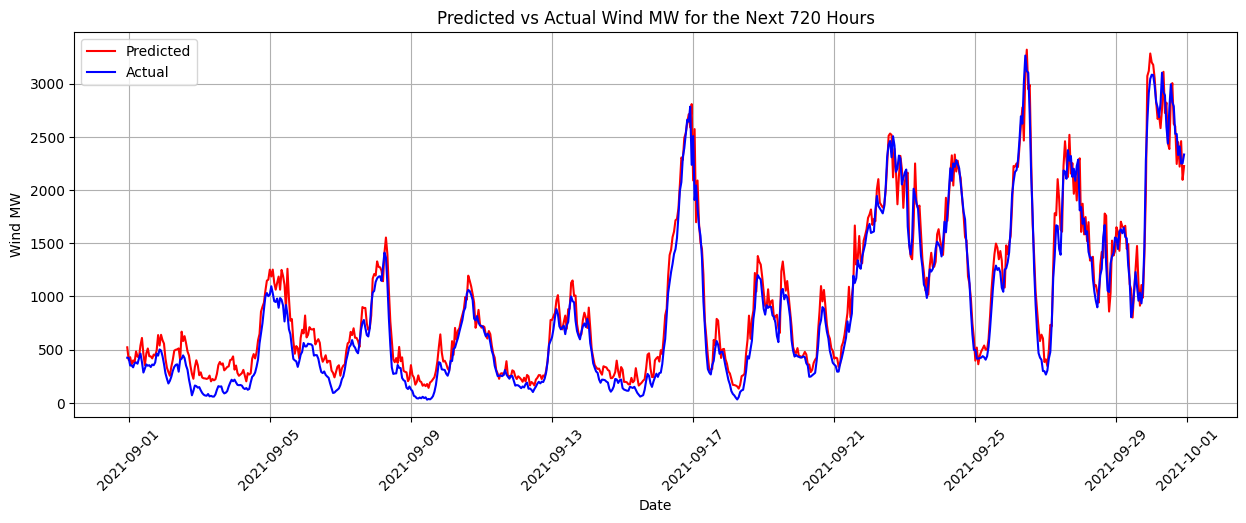

In [40]:

# The index for predictions should match the last 72 observations
predictions_index = data_filtered.index[-720:]  # Ensure this index is correct

# Create a DataFrame for predictions with the correct future index
predictions_df = pd.DataFrame(y_pred, index=predictions_index, columns=['Predicted'])

# Ensure actuals_df aligns with these 72 predictions
actuals_df = pd.DataFrame(data_filtered['ActualWindMW'].iloc[-720:].values, index=predictions_index, columns=['Actual'])

# Combine all three DataFrames
combined_df = pd.concat([predictions_df, actuals_df ], axis=1)

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(combined_df.index, combined_df['Predicted'], 'r-', label='Predicted')
plt.plot(combined_df.index, combined_df['Actual'], 'b-', label='Actual')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Wind MW')
plt.title('Predicted vs Actual Wind MW for the Next 720 Hours')
plt.xticks(rotation=45)
plt.grid(True)

### Support vector REGESSION

In [100]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler


In [101]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

import io
import requests
# GitHub URL to your CSV file
github_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/IslandElectricity2017_2021v5.csv'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(github_url)
data['date'] = pd.to_datetime(data['date'])

# Display the first few rows of the DataFrame to understand its structure
print(data.head())

   Unnamed: 0.2  Unnamed: 0.1                date  Unnamed: 0  Year Month  \
0             0             0 2017-01-01 00:00:00           0  2017   Jan   
1             1             1 2017-01-01 01:00:00           4  2017   Jan   
2             2             2 2017-01-01 02:00:00           8  2017   Jan   
3             3             3 2017-01-01 03:00:00          12  2017   Jan   
4             4             4 2017-01-01 04:00:00          16  2017   Jan   

     DayTime      REGION  ActualDemandMW   FORECAST DEMAND(MW)  ...  rhum_DON  \
0  01, 00:00  All Island            3696                   NaN  ...        70   
1  01, 01:00  All Island            3457                   NaN  ...        80   
2  01, 02:00  All Island            3244                   NaN  ...        69   
3  01, 03:00  All Island            3005                   NaN  ...        70   
4  01, 04:00  All Island            2847                   NaN  ...        71   

   msl_DON  wdsp_DON  wddir_DON  TotalWindCapacity

In [102]:

# Simplify the dataset to include only necessary features
# Converting 'date' to datetime format and setting it as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Including specified features plus creating additional necessary features for modeling
selected_columns = [
    'Year', 'Month', 'DayTime', 'hour', 'isweekday',
    'average_temp', 'average_wind_speed', 'average_wind_dir', 'average_rain',
    'ActualWindMW'  # Target variable
]

# Filter the dataset to include only the selected columns
data_filtered = data[selected_columns]

# Generate lag features for ActualWindMW for 24 hours
for lag in range(1, 25):
    data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)

# Adding rolling averages and differences for 'ActualWindMW'
data_filtered['rolling_avg_wind'] = data_filtered['ActualWindMW'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_power'] = data_filtered['ActualWindMW'].diff().shift(1)


data_filtered['rolling_avg_wind_SPEED'] = data_filtered['average_wind_speed'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_SPEED'] = data_filtered['average_wind_speed'].diff().shift(1)

data_filtered['rolling_avg_wind_dir'] = data_filtered['average_wind_dir'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_dir'] = data_filtered['average_wind_dir'].diff().shift(1)
# Shift the target variable by one hour into the future
data_filtered['ActualWindMW_target'] = data_filtered['ActualWindMW'].shift(-1)

# Dropping rows with NaN values created by lagging
data_filtered.dropna(inplace=True)

data_filtered.head()





<ipython-input-102-f5d99be895db>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-102-f5d99be895db>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-102-f5d99be895db>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

Year Month    DayTime  hour  isweekday  average_temp  \
date                                                                        
2017-01-02 00:00:00  2017   Jan  02, 00:00     0       True      6.666667   
2017-01-02 01:00:00  2017   Jan  02, 01:00     1       True      6.500000   
2017-01-02 02:00:00  2017   Jan  02, 02:00     2       True      7.000000   
2017-01-02 03:00:00  2017   Jan  02, 03:00     3       True      6.500000   
2017-01-02 04:00:00  2017   Jan  02, 04:00     4       True      7.333333   

                     average_wind_speed  average_wind_dir  average_rain  \
date                                                                      
2017-01-02 00:00:00            6.666667        125.000000      0.000000   
2017-01-02 01:00:00            6.500000        140.000000      0.000000   
2017-01-02 02:00:00            7.000000        141.666667      0.016667   
2017-01-02 03:00:00            6.500000        146.666667      0.000000   
2017-01-02 04:00:00            7.333333        141.666667      0.000000   

                     ActualWindMW  ...  ActualWindMW_lag22  \
date                               ...                       
2017-01-02 00:00:00          1313  ...              1528.0   
2017-01-02 01:00:00          1269  ...              1612.0   
2017-01-02 02:00:00          1053  ...              1473.0   
2017-01-02 03:00:00          1071  ...              1678.0   
2017-01-02 04:00:00           904  ...              1710.0   

                     ActualWindMW_lag23  ActualWindMW_lag24  rolling_avg_wind  \
date                                                                            
2017-01-02 00:00:00              1123.0              1214.0       1622.000000   
2017-01-02 01:00:00              1528.0              1123.0       1467.666667   
2017-01-02 02:00:00              1612.0              1528.0       1354.333333   
2017-01-02 03:00:00              1473.0              1612.0       1211.666667   
2017-01-02 04:00:00              1678.0              1473.0       1131.000000   

                     diff_wind_power  rolling_avg_wind_SPEED  diff_wind_SPEED  \
date                                                                            
2017-01-02 00:00:00           -128.0               14.277778        -1.666667   
2017-01-02 01:00:00           -168.0               11.555556        -6.500000   
2017-01-02 02:00:00            -44.0                8.777778        -0.166667   
2017-01-02 03:00:00           -216.0                6.722222         0.500000   
2017-01-02 04:00:00             18.0                6.666667        -0.500000   

                     rolling_avg_wind_dir  diff_wind_dir  ActualWindMW_target  
date                                                                           
2017-01-02 00:00:00             81.111111     -55.000000               1269.0  
2017-01-02 01:00:00             77.777778      98.333333               1053.0  
2017-01-02 02:00:00             97.222222      15.000000               1071.0  
2017-01-02 03:00:00            135.555556       1.666667                904.0  
2017-01-02 04:00:00            142.777778       5.000000                818.0  

[5 rows x 41 columns]

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
le = LabelEncoder()
data_filtered['Month'] = le.fit_transform(data_filtered['Month'])

# Splitting the dataset into training and testing sets
training_data = data_filtered.iloc[:-24]
testing_data = data_filtered.iloc[-24:]
# Prepare the features and target variable
# Exclude target variable and non-numeric 'DayTime'
X_train = training_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_train = training_data['ActualWindMW']

X_test = testing_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_test = testing_data['ActualWindMW']

# Set up the SVR pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Define a range of hyperparameters for the SVR
param_grid = {
    'svr__C': [50],  # Now 4 different values for C
    'svr__epsilon': [1],  # Now 5 different values for epsilon
    'svr__kernel': ['linear']  # different kernels
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='neg_mean_squared_error', verbose=2)

# Fit the model with the grid search
grid_search.fit(X_train, y_train)

# The best hyperparameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# You can then use the best estimator to make predictions and evaluate the model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


<ipython-input-103-60958dcd5107>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Month'] = le.fit_transform(data_filtered['Month'])


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END ......svr__C=50, svr__epsilon=1, svr__kernel=linear; total time= 1.2min


In [ ]:

predictions = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


# Calculate metrics
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}")

In [ ]:

import numpy as np

# Assuming y_true and y_pred are your arrays of actual and predicted values
y_true = np.array(y_test)    # Your actual values
predictions = predictions.flatten()  # Your predictions

# Calculate MAPE
mape = np.mean(np.abs((y_true - predictions) / y_true)) * 100

print(f"MAPE: {mape}%")




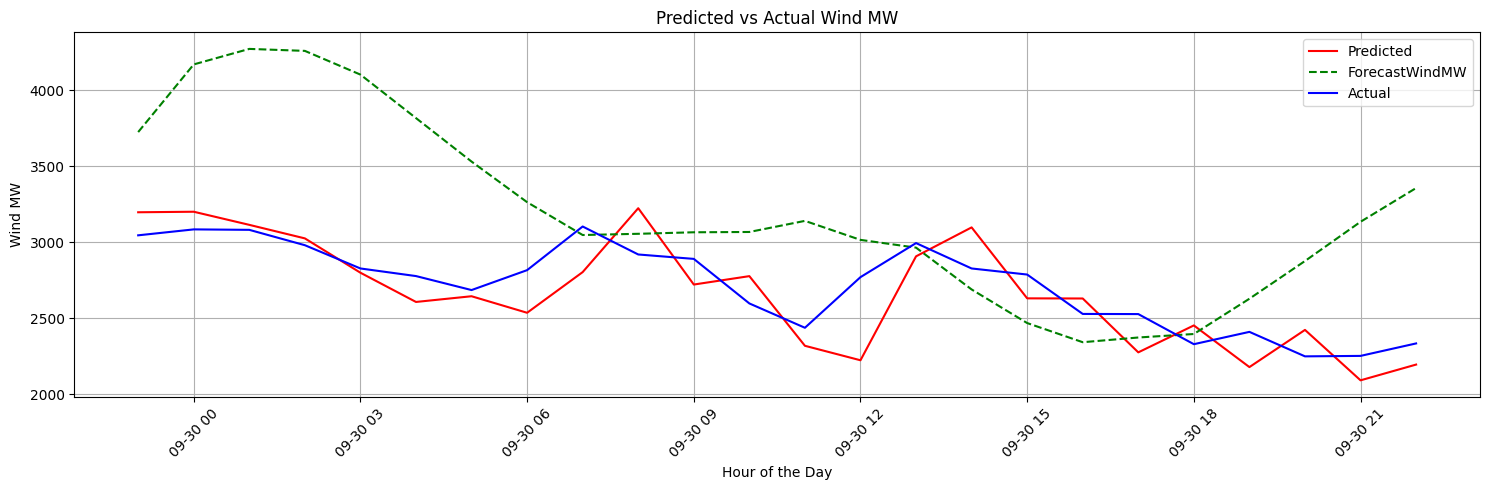

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

predictions_index = data_filtered.index[-24:] + pd.Timedelta(hours=-1)# This assumes predictions are for the next hour

# Create a DataFrame for predictions with the correct future index
predictions_df = pd.DataFrame(predictions, index=predictions_index, columns=['Predicted'])

# Create a DataFrame for actuals
actuals_df = pd.DataFrame(data_filtered['ActualWindMW'].iloc[-24:].values, index=data_filtered.index[-24:], columns=['Actual'])
# Create a DataFrame for the forecasted wind MW from another model or source
forecast_wind_df = pd.DataFrame(data['ForecastWndMW'].iloc[-24:].values, index=data_filtered.index[-24:], columns=['ForecastWindMW'])

# Combine all three DataFrames: predictions, actuals, and forecast wind
combined_df = pd.concat([predictions_df, actuals_df, forecast_wind_df], axis=1)

# Assuming combined_df is correctly aligned
combined_df['Hour'] = combined_df.index.hour

# Now plot the data
plt.figure(figsize=(15, 5))
plt.plot(combined_df.index, combined_df['Predicted'], 'r-', label='Predicted')
plt.plot(combined_df.index, combined_df['ForecastWindMW'], 'g--', label='ForecastWindMW')
plt.plot(combined_df.index, combined_df['Actual'], 'b-', label='Actual')  # Make sure this is correct

plt.legend()
plt.xlabel('Hour of the Day')
plt.ylabel('Wind MW')
plt.title('Predicted vs Actual Wind MW')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:


# Creating a DataFrame with the forecast dates and the predicted values
forecast_df = pd.DataFrame({
    #'DateTime': data_filtered['DayTime'].iloc[-24:],
    'ForecastedActualWindMW': predictions, #  predictions_ contains the last forecast
    'ActualWindMW': data_filtered['ActualWindMW'].iloc[-24:]
})


forecast_df


ForecastedActualWindMW  ActualWindMW
date                                                     
2021-09-30 00:00:00             3134.735649          3084
2021-09-30 01:00:00             3109.132396          3081
2021-09-30 02:00:00             3063.493400          2980
2021-09-30 03:00:00             2889.196443          2827
2021-09-30 04:00:00             2705.207106          2777
2021-09-30 05:00:00             2708.764472          2685
2021-09-30 06:00:00             2611.954126          2816
2021-09-30 07:00:00             2835.002613          3103
2021-09-30 08:00:00             3202.781128          2919
2021-09-30 09:00:00             2814.602839          2890
2021-09-30 10:00:00             2839.767107          2597
2021-09-30 11:00:00             2436.252843          2437
2021-09-30 12:00:00             2322.645457          2770
2021-09-30 13:00:00             2877.939716          2994
2021-09-30 14:00:00             3080.347309          2827
2021-09-30 15:00:00             2734.946119          2787
2021-09-30 16:00:00             2714.657446          2528
2021-09-30 17:00:00             2373.287830          2527
2021-09-30 18:00:00             2491.551231          2329
2021-09-30 19:00:00             2238.798009          2410
2021-09-30 20:00:00             2423.982097          2249
2021-09-30 21:00:00             2160.104725          2252
2021-09-30 22:00:00             2229.492069          2334
2021-09-30 23:00:00             2369.306892          2409

In [ ]:
# Extracting the last date from the dataset to start the forecast from the next hour
#last_date = data_filtered.index.max()

# Generating a date range for the next 24 hours starting from the last date + 1 hour
#forecast_dates = pd.date_range(start=last_date + pd.Timedelta(hours=1), periods=24, freq='H')

# Creating a DataFrame with the forecast dates and the predicted values
forecast_df2 = pd.DataFrame({
    #'DateTime': data_filtered['DayTime'].iloc[-24:],
    'ForecastedActualWindMW': predictions, #  predictions_ contains the last forecast
    'ActualWindMW': data_filtered['ActualWindMW'].iloc[-24:],
    'ForecastWindMW': data['ForecastWndMW'].iloc[-24:]
})


forecast_df2

ForecastedActualWindMW  ActualWindMW  ForecastWindMW
date                                                                     
2021-09-30 00:00:00             3134.735649          3084            3724
2021-09-30 01:00:00             3109.132396          3081            4169
2021-09-30 02:00:00             3063.493400          2980            4271
2021-09-30 03:00:00             2889.196443          2827            4258
2021-09-30 04:00:00             2705.207106          2777            4102
2021-09-30 05:00:00             2708.764472          2685            3816
2021-09-30 06:00:00             2611.954126          2816            3530
2021-09-30 07:00:00             2835.002613          3103            3263
2021-09-30 08:00:00             3202.781128          2919            3047
2021-09-30 09:00:00             2814.602839          2890            3055
2021-09-30 10:00:00             2839.767107          2597            3065
2021-09-30 11:00:00             2436.252843          2437            3067
2021-09-30 12:00:00             2322.645457          2770            3140
2021-09-30 13:00:00             2877.939716          2994            3015
2021-09-30 14:00:00             3080.347309          2827            2964
2021-09-30 15:00:00             2734.946119          2787            2689
2021-09-30 16:00:00             2714.657446          2528            2468
2021-09-30 17:00:00             2373.287830          2527            2342
2021-09-30 18:00:00             2491.551231          2329            2373
2021-09-30 19:00:00             2238.798009          2410            2396
2021-09-30 20:00:00             2423.982097          2249            2628
2021-09-30 21:00:00             2160.104725          2252            2876
2021-09-30 22:00:00             2229.492069          2334            3134
2021-09-30 23:00:00             2369.306892          2409            3356

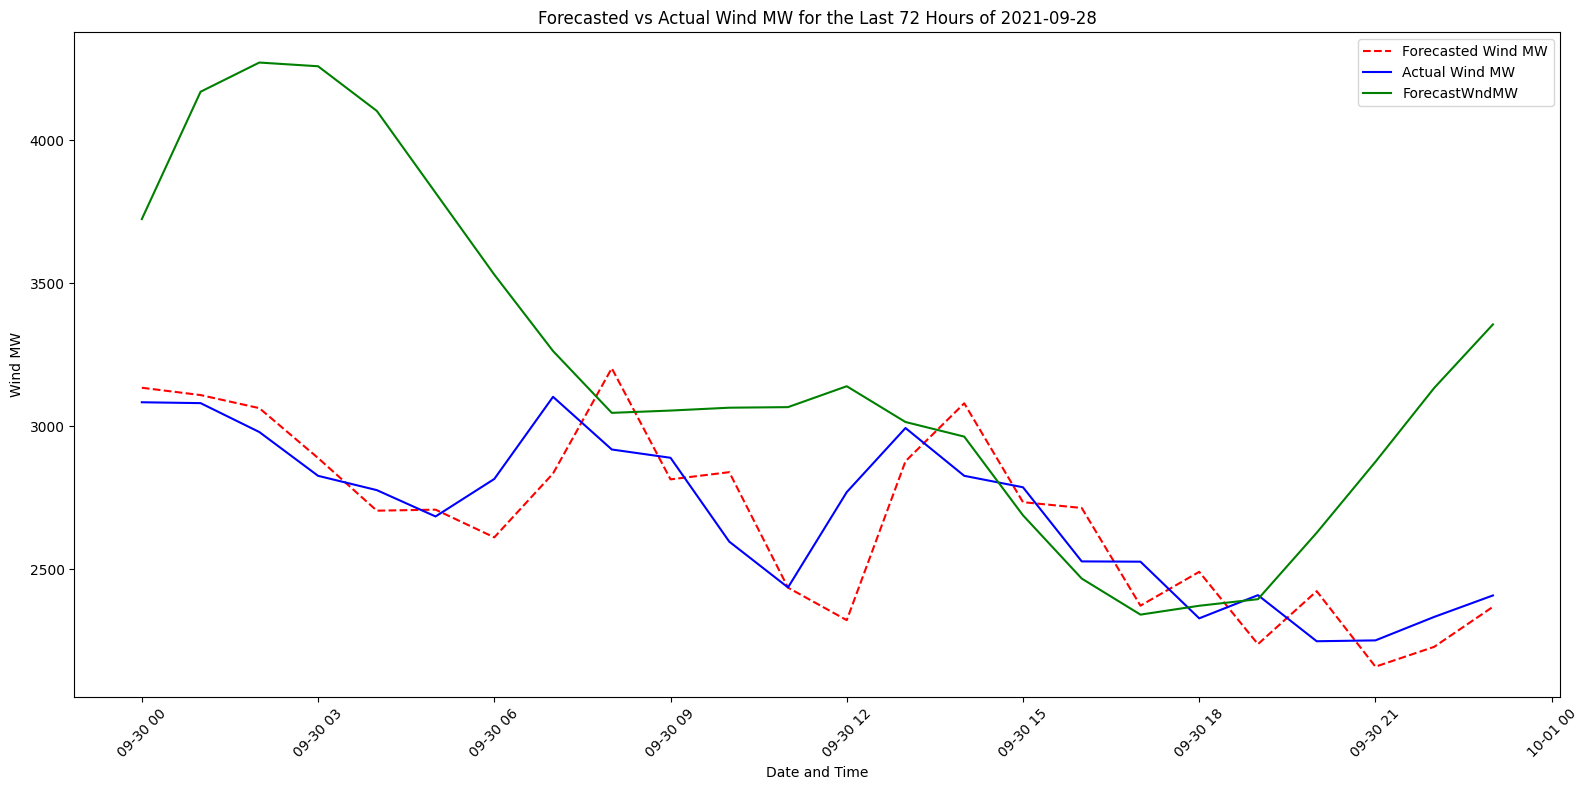

In [ ]:
# Given the structured DataFrame, we can visualize the forecasted versus actual wind MW using matplotlib

# Plotting the forecasted versus actual values
plt.figure(figsize=(16, 8))
plt.plot(forecast_df2.index, forecast_df2['ForecastedActualWindMW'], label='Forecasted Wind MW', color='red', linestyle='--')
plt.plot(forecast_df2.index, forecast_df2['ActualWindMW'], label='Actual Wind MW', color='blue')
plt.plot(forecast_df2.index, forecast_df2['ForecastWindMW'], label='ForecastWndMW', color='green')
plt.title('Forecasted vs Actual Wind MW for the Last 72 Hours of 2021-09-28')
plt.xlabel('Date and Time')
plt.ylabel('Wind MW')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


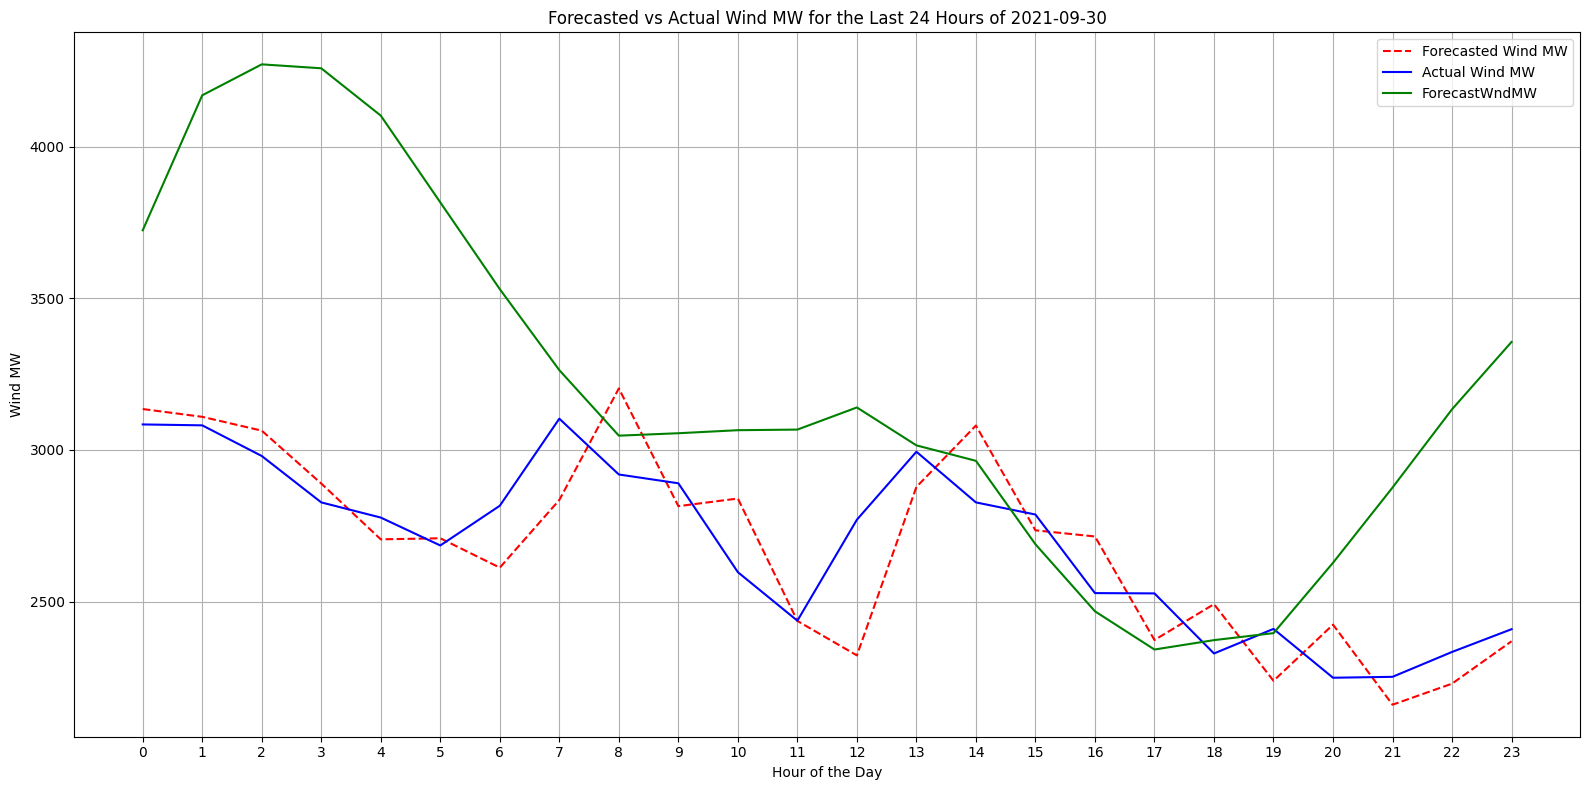

In [ ]:
# Adjusting the plot to display hours more clearly on the x-axis
# Extracting the last date from the dataset to start the forecast from the next hour
#last_date = data_filtered.index.max()

# Generating a date range for the next 24 hours starting from the last date + 1 hour
#forecast_dates = pd.date_range(start=last_date + pd.Timedelta(hours=1), periods=24, freq='H')

# Creating a DataFrame with the forecast dates and the predicted values
forecast_df2 = pd.DataFrame({
    #'DateTime': data_filtered['DayTime'].iloc[-24:],
    'ForecastedActualWindMW': predictions, #  predictions_ contains the last forecast
    'ActualWindMW': data_filtered['ActualWindMW'].iloc[-24:],
    'ForecastWindMW': data['ForecastWndMW'].iloc[-24:]
})


forecast_df2
# Setting the x-axis to display hours only for clarity
forecast_df2['Hour'] = forecast_df2.index.hour

plt.figure(figsize=(16, 8))
plt.plot(forecast_df2['Hour'], forecast_df2['ForecastedActualWindMW'], label='Forecasted Wind MW', color='red', linestyle='--')
plt.plot(forecast_df2['Hour'], forecast_df2['ActualWindMW'], label='Actual Wind MW', color='blue')
plt.plot(forecast_df2['Hour'], forecast_df2['ForecastWindMW'], label='ForecastWndMW', color='green')
plt.title('Forecasted vs Actual Wind MW for the Last 24 Hours of 2021-09-30')
plt.xlabel('Hour of the Day')
plt.ylabel('Wind MW')
plt.xticks(forecast_df2['Hour'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

72 HOUR

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
le = LabelEncoder()
data_filtered['Month'] = le.fit_transform(data_filtered['Month'])

# Splitting the dataset into training and testing sets
training_data = data_filtered.iloc[:-72]
testing_data = data_filtered.iloc[-72:]
# Prepare the features and target variable
X_train = training_data.drop(['ActualWindMW', 'DayTime'], axis=1)  # Exclude target variable and non-numeric 'DayTime'
y_train = training_data['ActualWindMW']

X_test = testing_data.drop(['ActualWindMW', 'DayTime'], axis=1)  # The same for testing set
y_test = testing_data['ActualWindMW']

# Set up the SVR pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])


# Define a range of hyperparameters for the SVR
param_grid = {
    'svr__C': [50],  # Now 4 different values for C
    'svr__epsilon': [1],  # Now 5 different values for epsilon
    'svr__kernel': ['linear']  # 4 different kernels
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='neg_mean_squared_error', verbose=2)

# Fit the model with the grid search
grid_search.fit(X_train, y_train)

# The best hyperparameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# You can then use the best estimator to make predictions and evaluate the model
best_model2 = grid_search.best_estimator_
predictions = best_model2.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

<ipython-input-13-d503b09aab2f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Month'] = le.fit_transform(data_filtered['Month'])


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END ......svr__C=50, svr__epsilon=1, svr__kernel=linear; total time= 1.3min
[CV] END ......svr__C=50, svr__epsilon=1, svr__kernel=linear; total time= 1.4min
Best Parameters: {'svr__C': 50, 'svr__epsilon': 1, 'svr__kernel': 'linear'}
Mean Squared Error: 31597.25404645214
R^2 Score: 0.9398628414521843


In [ ]:

predictions = best_model2.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


# Calculate metrics
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}")


Mean Squared Error: 31597.25404645214
R^2 Score: 0.9398628414521843
MAE: 137.33449644142104, MSE: 31597.25404645214, RMSE: 177.7561645807316, R^2: 0.9398628414521843


In [ ]:


# Creating a DataFrame with the forecast dates and the predicted values
forecast_df2 = pd.DataFrame({
    #'DateTime': data_filtered['DayTime'].iloc[-24:],
    'ForecastedActualWindMW': predictions, #  predictions_ contains the last forecast
    'ActualWindMW': data_filtered['ActualWindMW'].iloc[-72:],
    'ForecastWindMW': data['ForecastWndMW'].iloc[-72:]
})


forecast_df2


ForecastedActualWindMW  ActualWindMW  ForecastWindMW
date                                                                     
2021-09-28 00:00:00             1574.318694          1840            2016
2021-09-28 01:00:00             1813.568080          1682            1874
2021-09-28 02:00:00             1586.931234          1733            1793
2021-09-28 03:00:00             1723.605735          1585            1759
2021-09-28 04:00:00             1513.896193          1613            1679
...                                     ...           ...             ...
2021-09-30 19:00:00             2238.943652          2410            2396
2021-09-30 20:00:00             2423.929950          2249            2628
2021-09-30 21:00:00             2160.036945          2252            2876
2021-09-30 22:00:00             2229.437259          2334            3134
2021-09-30 23:00:00             2369.467389          2409            3356

[72 rows x 3 columns]

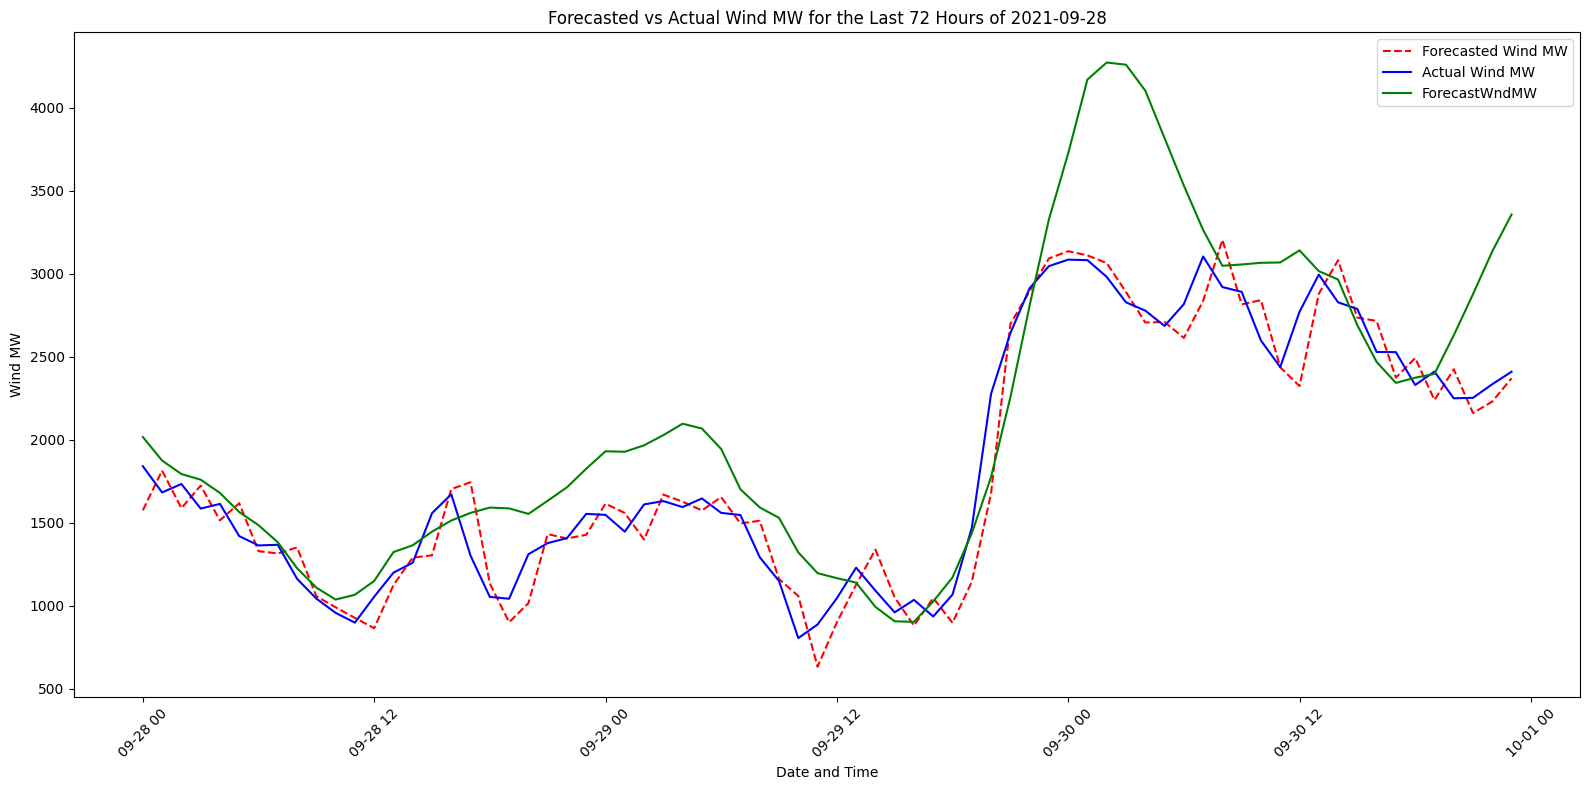

In [ ]:
# Given the structured DataFrame, we can visualize the forecasted versus actual wind MW using matplotlib

# Plotting the forecasted versus actual values
plt.figure(figsize=(16, 8))
plt.plot(forecast_df2.index, forecast_df2['ForecastedActualWindMW'], label='Forecasted Wind MW', color='red', linestyle='--')
plt.plot(forecast_df2.index, forecast_df2['ActualWindMW'], label='Actual Wind MW', color='blue')
plt.plot(forecast_df2.index, forecast_df2['ForecastWindMW'], label='ForecastWndMW', color='green')
plt.title('Forecasted vs Actual Wind MW for the Last 72 Hours of 2021-09-28')
plt.xlabel('Date and Time')
plt.ylabel('Wind MW')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Time series models

### SARIMA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
!pip install statsmodels


In [ ]:

# GitHub URL to your CSV file
github_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/IslandElectricity2017_2021v5.csv'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(github_url)
data['date'] = pd.to_datetime(data['date'])

# Display the first few rows of the DataFrame to understand its structure
print(data.columns)

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'date', 'Unnamed: 0', 'Year', 'Month',
       'DayTime', ' REGION', 'ActualDemandMW', ' FORECAST DEMAND(MW)',
       'ForecastWndMW', 'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW',
       'EWIC_MW', 'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 'ra

In [ ]:


from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Given the preprocessing steps are already defined, we continue from the prepared `data_filtered` DataFrame
# However, since the DataFrame has been processed in prior steps, we directly start from SARIMA modeling

# Ensure the date column is in datetime format and set as the DataFrame index
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')
data_filtered = data.set_index('date')[['ActualWindMW']].dropna()

# Here, we focus on columns related to wind and the date column for indexing
columns_of_interest = ['date', 'TotalWindCapacityMW', 'average_wind_speed', 'average_wind_dir', 'ActualWindMW', 'average_rain', 'average_temp']

# Creating a new DataFrame with only the relevant columns
data_filtered = data[columns_of_interest]

# Creating lag features for the previous 24 hours
for i in range(1, 25):
    data_filtered[f'lag_wind_speed_{i}h'] = data_filtered['average_wind_speed'].shift(i)
    data_filtered[f'lag_wind_dir_{i}h'] = data_filtered['ActualWindMW'].shift(i)

# Dropping rows with missing values that result from lag creation
data_filtered = data_filtered.dropna()

# To properly fit a SARIMA model, we split the data into training and testing sets
# We'll use the last 24 hours as the testing set for forecast evaluation
train, test = data_filtered.iloc[:-24], data_filtered.iloc[-24:]


# Displaying the first few rows of the training data for a sanity check
train.head(), train.shape


<ipython-input-4-9a5d2a56e366>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'lag_wind_speed_{i}h'] = data_filtered['average_wind_speed'].shift(i)
<ipython-input-4-9a5d2a56e366>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'lag_wind_dir_{i}h'] = data_filtered['ActualWindMW'].shift(i)
<ipython-input-4-9a5d2a56e366>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

(                  date  TotalWindCapacityMW  average_wind_speed  \
 24 2017-01-02 00:00:00             3747.979            6.666667   
 25 2017-01-02 01:00:00             3747.979            6.500000   
 26 2017-01-02 02:00:00             3747.979            7.000000   
 27 2017-01-02 03:00:00             3747.979            6.500000   
 28 2017-01-02 04:00:00             3747.979            7.333333   
 
     average_wind_dir  ActualWindMW  average_rain  average_temp  \
 24        125.000000          1313      0.000000      6.666667   
 25        140.000000          1269      0.000000      6.500000   
 26        141.666667          1053      0.016667      7.000000   
 27        146.666667          1071      0.000000      6.500000   
 28        141.666667           904      0.000000      7.333333   
 
     lag_wind_speed_1h  lag_wind_dir_1h  lag_wind_speed_2h  ...  \
 24          13.166667           1481.0          14.833333  ...   
 25           6.666667           1313.0          13.

In [ ]:
pip install pmdarima


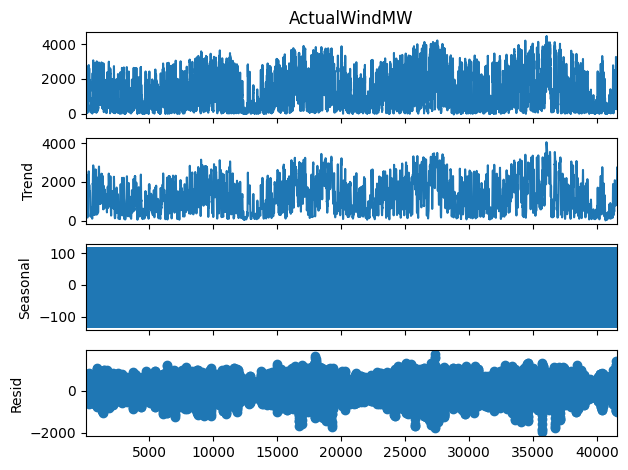

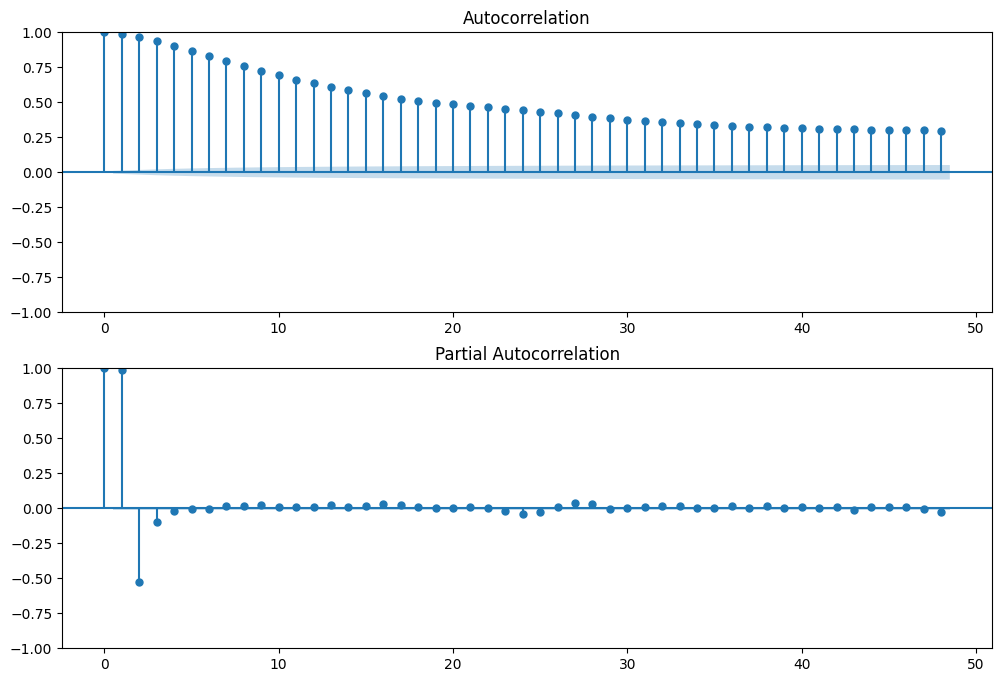

Performing stepwise search to minimize aic


In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from pmdarima import auto_arima
# Conduct a seasonal decomposition to assess trends and seasonality
seasonal_decomposition = seasonal_decompose(data_filtered['ActualWindMW'], model='additive', period=24)

# Plot the seasonal decomposition
seasonal_decomposition.plot()
plt.show()

# Evaluate ACF and PACF plots to choose SARIMA parameters
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data_filtered['ActualWindMW'], lags=48, ax=ax[0])
plot_pacf(data_filtered['ActualWindMW'], lags=48, ax=ax[1])
plt.show()


# Split data into train and test sets
n_test = 24  # Number of periods to forecast
train = data_filtered.iloc[:-n_test, :]
test = data_filtered.iloc[-n_test:, :]


# Running auto_arima
auto_model = auto_arima(train['ActualWindMW'],
                        start_p=0, start_q=0,
                        max_p=3, max_q=3, m=24,
                        start_P=0, seasonal=True,
                        d=1, D=1, trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)

# Summary of the best model
print(auto_model.summary())






In [ ]:

# Summarize the model results
print(sarima_result.summary())

# Forecast
forecast = sarima_result.get_forecast(steps=n_test)
forecast_mean = forecast.predicted_mean

# Calculate forecast accuracy
mse = mean_squared_error(test['ActualWindMW'], forecast_mean)
mae = mean_absolute_error(test['ActualWindMW'], forecast_mean)
r2 = r2_score(test['ActualWindMW'], forecast_mean)

# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['ActualWindMW'], label='Actual Wind MW', color='blue')
plt.plot(test.index, forecast_mean, label='Forecasted Wind MW', color='red', linestyle='--')
plt.fill_between(test.index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.title('Actual vs Forecasted Wind MW')
plt.xlabel('Date')
plt.ylabel('Wind MW')
plt.legend()
plt.show()

# Print out the accuracy metrics
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

# Check the diagnostics to ensure no patterns in residuals
sarima_result.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from pmdarima import auto_arima
# Conduct a seasonal decomposition to assess trends and seasonality
seasonal_decomposition = seasonal_decompose(data_filtered['ActualWindMW'], model='additive', period=24)

# Plot the seasonal decomposition
seasonal_decomposition.plot()
plt.show()

# Evaluate ACF and PACF plots to choose SARIMA parameters
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data_filtered['ActualWindMW'], lags=48, ax=ax[0])
plot_pacf(data_filtered['ActualWindMW'], lags=48, ax=ax[1])
plt.show()

# Define SARIMA parameters based on ACF and PACF plots
p, d, q = 1, 1, 1  # Adjust these based on the ACF and PACF plots
P, D, Q, s = 1, 1, 1, 24  # Adjust these based on the seasonal decomposition

# Split data into train and test sets
n_test = 24  # Number of periods to forecast
train = data_filtered.iloc[:-n_test, :]
test = data_filtered.iloc[-n_test:, :]

# Fit the SARIMA model
sarima_model = SARIMAX(train['ActualWindMW'],
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, s),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit()


# Summarize the model results
print(sarima_result.summary())

# Forecast
forecast = sarima_result.get_forecast(steps=n_test)
forecast_mean = forecast.predicted_mean

# Calculate forecast accuracy
mse = mean_squared_error(test['ActualWindMW'], forecast_mean)
mae = mean_absolute_error(test['ActualWindMW'], forecast_mean)
r2 = r2_score(test['ActualWindMW'], forecast_mean)

# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['ActualWindMW'], label='Actual Wind MW', color='blue')
plt.plot(test.index, forecast_mean, label='Forecasted Wind MW', color='red', linestyle='--')
plt.fill_between(test.index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.title('Actual vs Forecasted Wind MW')
plt.xlabel('Date')
plt.ylabel('Wind MW')
plt.legend()
plt.show()

# Print out the accuracy metrics
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')



In [ ]:

# Check the diagnostics to ensure no patterns in residuals
sarima_result.plot_diagnostics(figsize=(15, 12))
plt.show()

### Linear regression (LR)



Setting up for lr

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# GitHub URL to your CSV file
github_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/IslandElectricity2017_2021v5.csv'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(github_url)
data['date'] = pd.to_datetime(data['date'])

# Display the first few rows of the DataFrame to understand its structure
print(data.head())

   Unnamed: 0.2  Unnamed: 0.1                date  Unnamed: 0  Year Month  \
0             0             0 2017-01-01 00:00:00           0  2017   Jan   
1             1             1 2017-01-01 01:00:00           4  2017   Jan   
2             2             2 2017-01-01 02:00:00           8  2017   Jan   
3             3             3 2017-01-01 03:00:00          12  2017   Jan   
4             4             4 2017-01-01 04:00:00          16  2017   Jan   

     DayTime      REGION  ActualDemandMW   FORECAST DEMAND(MW)  ...  rhum_DON  \
0  01, 00:00  All Island            3696                   NaN  ...        70   
1  01, 01:00  All Island            3457                   NaN  ...        80   
2  01, 02:00  All Island            3244                   NaN  ...        69   
3  01, 03:00  All Island            3005                   NaN  ...        70   
4  01, 04:00  All Island            2847                   NaN  ...        71   

   msl_DON  wdsp_DON  wddir_DON  TotalWindCapacity

In [40]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
data['season'] = (data['date'].dt.month % 12 + 3) // 3  # Divide months into seasons (1: Winter, 2: Spring, 3: Summer, 4: Fall)

# Simplify the dataset to include only necessary features
# Converting 'date' to datetime format and setting it as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Including specified features plus creating additional necessary features for modeling
selected_columns = [
    'Year', 'Month', 'DayTime', 'hour', 'isweekday', 'season',
    'average_temp', 'average_wind_speed', 'average_wind_dir', 'average_rain',
    'ActualWindMW'  # Target variable
]
# Filter the dataset to include only the selected columns
data_filtered = data[selected_columns]

# Generate lag features for ActualWindMW for 24 hours
for lag in range(1, 25):
    data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)

# Adding rolling averages and differences for 'ActualWindMW'
data_filtered['rolling_avg_wind'] = data_filtered['ActualWindMW'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_power'] = data_filtered['ActualWindMW'].diff().shift(1)


data_filtered['rolling_avg_wind_SPEED'] = data_filtered['average_wind_speed'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_SPEED'] = data_filtered['average_wind_speed'].diff().shift(1)

data_filtered['rolling_avg_wind_dir'] = data_filtered['average_wind_dir'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_dir'] = data_filtered['average_wind_dir'].diff().shift(1)
# Dropping rows with NaN values created by lagging
# Shift the target variable by one hour into the future
data_filtered['ActualWindMW_target'] = data_filtered['ActualWindMW'].shift(-1)

data_filtered.dropna(inplace=True)

data_filtered.head()




<ipython-input-40-f0f557f97246>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-40-f0f557f97246>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-40-f0f557f97246>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Year Month    DayTime  hour  isweekday  season  \
date                                                                  
2017-01-02 00:00:00  2017   Jan  02, 00:00     0       True       1   
2017-01-02 01:00:00  2017   Jan  02, 01:00     1       True       1   
2017-01-02 02:00:00  2017   Jan  02, 02:00     2       True       1   
2017-01-02 03:00:00  2017   Jan  02, 03:00     3       True       1   
2017-01-02 04:00:00  2017   Jan  02, 04:00     4       True       1   

                     average_temp  average_wind_speed  average_wind_dir  \
date                                                                      
2017-01-02 00:00:00      6.666667            6.666667        125.000000   
2017-01-02 01:00:00      6.500000            6.500000        140.000000   
2017-01-02 02:00:00      7.000000            7.000000        141.666667   
2017-01-02 03:00:00      6.500000            6.500000        146.666667   
2017-01-02 04:00:00      7.333333            7.333333        141.666667   

                     average_rain  ...  ActualWindMW_lag22  \
date                               ...                       
2017-01-02 00:00:00      0.000000  ...              1528.0   
2017-01-02 01:00:00      0.000000  ...              1612.0   
2017-01-02 02:00:00      0.016667  ...              1473.0   
2017-01-02 03:00:00      0.000000  ...              1678.0   
2017-01-02 04:00:00      0.000000  ...              1710.0   

                     ActualWindMW_lag23  ActualWindMW_lag24  rolling_avg_wind  \
date                                                                            
2017-01-02 00:00:00              1123.0              1214.0       1622.000000   
2017-01-02 01:00:00              1528.0              1123.0       1467.666667   
2017-01-02 02:00:00              1612.0              1528.0       1354.333333   
2017-01-02 03:00:00              1473.0              1612.0       1211.666667   
2017-01-02 04:00:00              1678.0              1473.0       1131.000000   

                     diff_wind_power  rolling_avg_wind_SPEED  diff_wind_SPEED  \
date                                                                            
2017-01-02 00:00:00           -128.0               14.277778        -1.666667   
2017-01-02 01:00:00           -168.0               11.555556        -6.500000   
2017-01-02 02:00:00            -44.0                8.777778        -0.166667   
2017-01-02 03:00:00           -216.0                6.722222         0.500000   
2017-01-02 04:00:00             18.0                6.666667        -0.500000   

                     rolling_avg_wind_dir  diff_wind_dir  ActualWindMW_target  
date                                                                           
2017-01-02 00:00:00             81.111111     -55.000000               1269.0  
2017-01-02 01:00:00             77.777778      98.333333               1053.0  
2017-01-02 02:00:00             97.222222      15.000000               1071.0  
2017-01-02 03:00:00            135.555556       1.666667                904.0  
2017-01-02 04:00:00            142.777778       5.000000                818.0  

[5 rows x 42 columns]

In [41]:

# Encoding categorical variables
le = LabelEncoder()
data_filtered['Month'] = le.fit_transform(data_filtered['Month'])

# Splitting the dataset into training and testing sets
# We reserve the last 24 observations for testing to simulate forecasting the next 24 hours It's good practice to reserve the last 24 observations for testing
training_data = data_filtered.iloc[:-24]
testing_data = data_filtered.iloc[-24:]

# Exclude target variable and non-numeric 'DayTime'
X_train = training_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_train = training_data['ActualWindMW_target']

X_test = testing_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_test = testing_data['ActualWindMW_target']


<ipython-input-41-f76c775b406b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Month'] = le.fit_transform(data_filtered['Month'])


In [42]:

# Step 5: Model Selection
from sklearn.linear_model import LinearRegression
# Step 6: Model Training
model = LinearRegression()
model.fit(X_train , y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 70744.24877149392


In [44]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ... (Previous code remains unchanged)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

cv = np.std(y_test) / np.mean(y_test)
print(f'Coefficient of Variation: {cv}')

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred)
print(f'Explained Variance Score: {evs}')



R-squared: 0.030104265308506406
Root Mean Squared Error: 265.9779103074049
Coefficient of Variation: 0.10031851672193405
Explained Variance Score: 0.04134821138652356


In [53]:

import numpy as np

# Assuming y_true and y_pred are your arrays of actual and predicted values
y_true = np.array(y_test)    # Your actual values
y_pred = predictions.flatten()  # Your predictions

# Calculate MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"MAPE: {mape}%")


MAPE: 5.27287483165626%


In [45]:
!pip install joblib
import joblib

# ... (previous code)

# Save the model to a file
model_filename = 'linear_regression_model.joblib'
joblib.dump(model, model_filename)

print(f'Model saved as {model_filename}')

Model saved as linear_regression_model.joblib


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Your existing code to generate 'predictions'

# Align predictions with the hour they are predicting, not the hour of data used
# The index for predictions should be one hour ahead of the actuals
predictions_index = data_filtered.index[-24:] + pd.Timedelta(hours=-1)  # This gives you the index for predictions

# Create a DataFrame for predictions with the correct future index

# Create a DataFrame for predictions with the correct future index
predictions_df = pd.DataFrame(y_pred, index=predictions_index, columns=['Predicted'])

# Create a DataFrame for actuals
actuals_df = pd.DataFrame(data_filtered['ActualWindMW'].iloc[-24:].values, index=data_filtered.index[-24:], columns=['Actual'])

# Combine the two DataFrames
combined_df = pd.concat([predictions_df, actuals_df], axis=1)
combined_df



Predicted  Actual
date                                    
2021-09-29 22:00:00  3186.200928     NaN
2021-09-29 23:00:00  3171.192383  3045.0
2021-09-30 00:00:00  3095.307129  3084.0
2021-09-30 01:00:00  2915.282227  3081.0
2021-09-30 02:00:00  2736.279053  2980.0
2021-09-30 03:00:00  2740.299316  2827.0
2021-09-30 04:00:00  2652.532715  2777.0
2021-09-30 05:00:00  2855.533203  2685.0
2021-09-30 06:00:00  3230.521484  2816.0
2021-09-30 07:00:00  2871.168457  3103.0
2021-09-30 08:00:00  2917.759521  2919.0
2021-09-30 09:00:00  2533.833008  2890.0
2021-09-30 10:00:00  2430.982910  2597.0
2021-09-30 11:00:00  2929.208984  2437.0
2021-09-30 12:00:00  3122.736084  2770.0
2021-09-30 13:00:00  2798.432617  2994.0
2021-09-30 14:00:00  2773.321533  2827.0
2021-09-30 15:00:00  2443.341797  2787.0
2021-09-30 16:00:00  2539.918457  2528.0
2021-09-30 17:00:00  2292.626221  2527.0
2021-09-30 18:00:00  2474.915527  2329.0
2021-09-30 19:00:00  2192.744385  2410.0
2021-09-30 20:00:00  2264.453369  2249.0
2021-09-30 21:00:00  2397.206299  2252.0
2021-09-30 22:00:00          NaN  2334.0

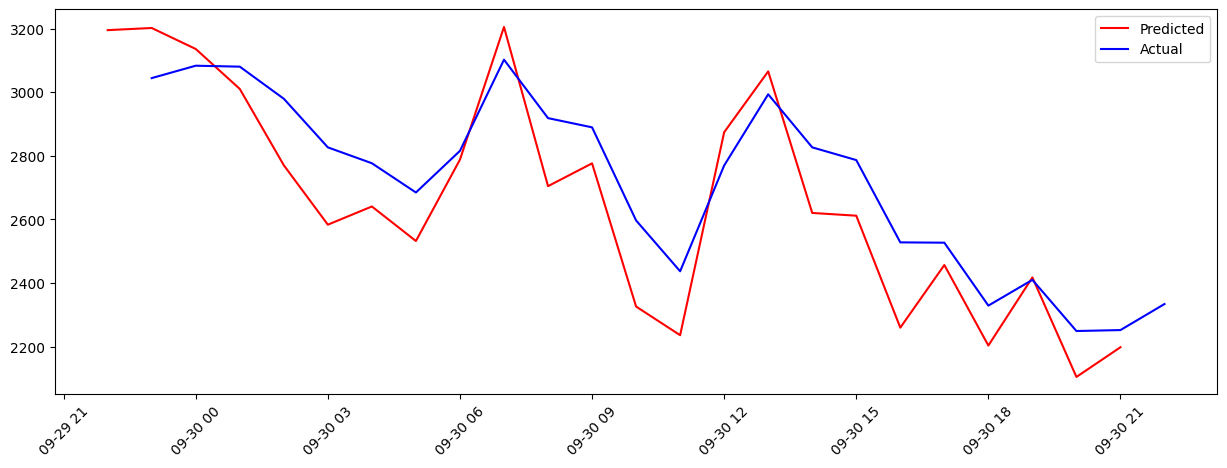

In [52]:

# Now, plot the data
plt.figure(figsize=(15, 5))
plt.plot(combined_df.index, combined_df['Predicted'], 'r-', label='Predicted')
plt.plot(combined_df.index, combined_df['Actual'], 'b-', label='Actual')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

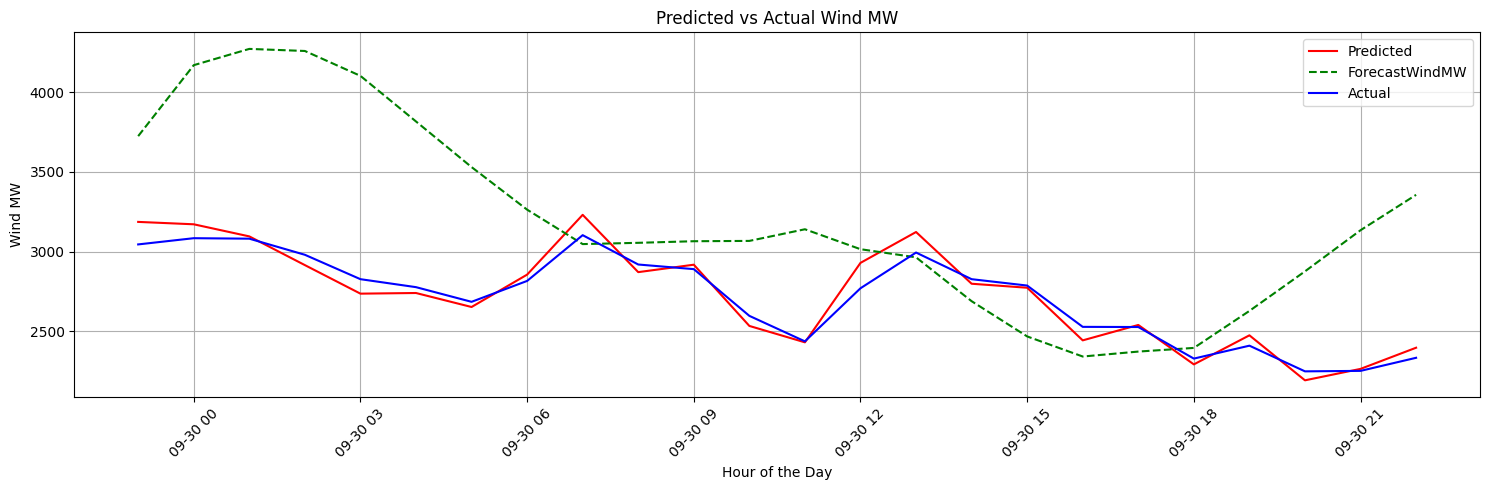

In [67]:


import pandas as pd
import matplotlib.pyplot as plt


# Align predictions with the hour they are predicting, not the hour of data used
# The index for predictions should be one hour ahead of the actuals
predictions_index = data_filtered.index[-24:]  # This assumes predictions are for the next hour

# Create a DataFrame for predictions with the correct future index
predictions_df = pd.DataFrame(y_pred, index=predictions_index, columns=['Predicted'])

# Create a DataFrame for actuals
actuals_df = pd.DataFrame(data_filtered['ActualWindMW'].iloc[-24:].values, index=data_filtered.index[-24:], columns=['Actual'])
# Create a DataFrame for the forecasted wind MW from another model or source
forecast_wind_df = pd.DataFrame(data['ForecastWndMW'].iloc[-24:].values, index=data_filtered.index[-24:], columns=['ForecastWindMW'])

# Combine all three DataFrames: predictions, actuals, and forecast wind
combined_df = pd.concat([predictions_df, actuals_df, forecast_wind_df], axis=1)

# Assuming combined_df is correctly aligned
combined_df['Hour'] = combined_df.index.hour

# Now plot the data
plt.figure(figsize=(15, 5))
plt.plot(combined_df.index, combined_df['Predicted'], 'r-', label='Predicted')
plt.plot(combined_df.index, combined_df['ForecastWindMW'], 'g--', label='ForecastWindMW')
plt.plot(combined_df.index, combined_df['Actual'], 'b-', label='Actual')  # Make sure this is correct

plt.legend()
plt.xlabel('Hour of the Day')
plt.ylabel('Wind MW')
plt.title('Predicted vs Actual Wind MW')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Shifting the target variable by one hour into the future is a common technique in time series forecasting when you want to predict the value of the next time step. Here’s how it works and why it’s done:

Time Series Forecasting Context: In time series forecasting, you typically have a sequence of time-ordered values, and you want to predict future values. For example, if you’re predicting wind power generation, you have historical wind power measurements at different times, and you use this historical data to forecast the wind power for future time periods.

72 hour

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# GitHub URL to your CSV file
github_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/IslandElectricity2017_2021v5.csv'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(github_url)
data['date'] = pd.to_datetime(data['date'])

# Display the first few rows of the DataFrame to understand its structure
print(data.head())

   Unnamed: 0.2  Unnamed: 0.1                date  Unnamed: 0  Year Month  \
0             0             0 2017-01-01 00:00:00           0  2017   Jan   
1             1             1 2017-01-01 01:00:00           4  2017   Jan   
2             2             2 2017-01-01 02:00:00           8  2017   Jan   
3             3             3 2017-01-01 03:00:00          12  2017   Jan   
4             4             4 2017-01-01 04:00:00          16  2017   Jan   

     DayTime      REGION  ActualDemandMW   FORECAST DEMAND(MW)  ...  rhum_DON  \
0  01, 00:00  All Island            3696                   NaN  ...        70   
1  01, 01:00  All Island            3457                   NaN  ...        80   
2  01, 02:00  All Island            3244                   NaN  ...        69   
3  01, 03:00  All Island            3005                   NaN  ...        70   
4  01, 04:00  All Island            2847                   NaN  ...        71   

   msl_DON  wdsp_DON  wddir_DON  TotalWindCapacity

In [2]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
data['season'] = (data['date'].dt.month % 12 + 3) // 3  # Divide months into seasons (1: Winter, 2: Spring, 3: Summer, 4: Fall)

# Simplify the dataset to include only necessary features
# Converting 'date' to datetime format and setting it as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Including specified features plus creating additional necessary features for modeling
selected_columns = [
    'Year', 'Month', 'DayTime', 'hour', 'isweekday', 'season',
    'average_temp', 'average_wind_speed', 'average_wind_dir', 'average_rain',
    'ActualWindMW'  # Target variable
]
# Filter the dataset to include only the selected columns
data_filtered = data[selected_columns]

# Generate lag features for ActualWindMW for 24 hours
for lag in range(1, 25):
    data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)

data_filtered['wind_power_lag48'] = data_filtered['ActualWindMW'].shift(48)
data_filtered['wind_power_lag72'] = data_filtered['ActualWindMW'].shift(72)
# Adding rolling averages and differences for 'ActualWindMW'
data_filtered['rolling_avg_wind'] = data_filtered['ActualWindMW'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_power'] = data_filtered['ActualWindMW'].diff().shift(1)


data_filtered['rolling_avg_wind_SPEED'] = data_filtered['average_wind_speed'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_SPEED'] = data_filtered['average_wind_speed'].diff().shift(1)

data_filtered['rolling_avg_wind_dir'] = data_filtered['average_wind_dir'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_dir'] = data_filtered['average_wind_dir'].diff().shift(1)
# Dropping rows with NaN values created by lagging
# Shift the target variable by one hour into the future
data_filtered['ActualWindMW_target'] = data_filtered['ActualWindMW'].shift(-1)

data_filtered.dropna(inplace=True)

data_filtered.head()


<ipython-input-2-bfbf16b180da>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-2-bfbf16b180da>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-2-bfbf16b180da>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Year Month    DayTime  hour  isweekday  season  \
date                                                                  
2017-01-04 00:00:00  2017   Jan  04, 00:00     0       True       1   
2017-01-04 01:00:00  2017   Jan  04, 01:00     1       True       1   
2017-01-04 02:00:00  2017   Jan  04, 02:00     2       True       1   
2017-01-04 03:00:00  2017   Jan  04, 03:00     3       True       1   
2017-01-04 04:00:00  2017   Jan  04, 04:00     4       True       1   

                     average_temp  average_wind_speed  average_wind_dir  \
date                                                                      
2017-01-04 00:00:00      3.666667            3.666667        191.666667   
2017-01-04 01:00:00      2.833333            2.833333        216.666667   
2017-01-04 02:00:00      4.333333            4.333333        265.000000   
2017-01-04 03:00:00      4.833333            4.833333        273.333333   
2017-01-04 04:00:00      5.666667            5.666667        263.333333   

                     average_rain  ...  ActualWindMW_lag24  wind_power_lag48  \
date                               ...                                         
2017-01-04 00:00:00      0.066667  ...               262.0            1313.0   
2017-01-04 01:00:00      0.000000  ...               259.0            1269.0   
2017-01-04 02:00:00      0.000000  ...               364.0            1053.0   
2017-01-04 03:00:00      0.033333  ...               364.0            1071.0   
2017-01-04 04:00:00      0.000000  ...               466.0             904.0   

                     wind_power_lag72  rolling_avg_wind  diff_wind_power  \
date                                                                       
2017-01-04 00:00:00            1214.0        634.000000             13.0   
2017-01-04 01:00:00            1123.0        623.666667             -6.0   
2017-01-04 02:00:00            1528.0        638.000000             36.0   
2017-01-04 03:00:00            1612.0        637.333333            -32.0   
2017-01-04 04:00:00            1473.0        632.000000            -20.0   

                     rolling_avg_wind_SPEED  diff_wind_SPEED  \
date                                                           
2017-01-04 00:00:00               14.833333         1.500000   
2017-01-04 01:00:00               11.277778       -12.166667   
2017-01-04 02:00:00                7.444444        -0.833333   
2017-01-04 03:00:00                3.611111         1.500000   
2017-01-04 04:00:00                4.000000         0.500000   

                     rolling_avg_wind_dir  diff_wind_dir  ActualWindMW_target  
date                                                                           
2017-01-04 00:00:00            235.000000      10.000000                660.0  
2017-01-04 01:00:00            222.777778     -51.666667                628.0  
2017-01-04 02:00:00            217.222222      25.000000                608.0  
2017-01-04 03:00:00            224.444444      48.333333                520.0  
2017-01-04 04:00:00            251.666667       8.333333                449.0  

[5 rows x 44 columns]

In [3]:
# Encoding categorical variables
le = LabelEncoder()
data_filtered['Month'] = le.fit_transform(data_filtered['Month'])

# Splitting the dataset into training and testing sets
# We reserve the last 24 observations for testing to simulate forecasting the next 24 hours It's good practice to reserve the last 24 observations for testing
training_data = data_filtered.iloc[:-72]
testing_data = data_filtered.iloc[-72:]

# Exclude target variable and non-numeric 'DayTime'
X_train = training_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_train = training_data['ActualWindMW_target']

X_test = testing_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_test = testing_data['ActualWindMW_target']
# Step 5: Model Selection
from sklearn.linear_model import LinearRegression
# Step 6: Model Training
model = LinearRegression()
model.fit(X_train , y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ... (Previous code remains unchanged)



Mean Squared Error: 92190.03267682536


<ipython-input-3-ee72fb6602ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Month'] = le.fit_transform(data_filtered['Month'])


In [10]:

import numpy as np
# Step 7: Model Evaluation
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

cv = np.std(y_test) / np.mean(y_test)
print(f'Coefficient of Variation: {cv}')

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred)
print(f'Explained Variance Score: {evs}')

R-squared: 0.8245402400011066
Root Mean Squared Error: 303.62811575482493
Coefficient of Variation: 0.3910139875006043
Explained Variance Score: 0.8258781018084516


In [12]:

import numpy as np

# Ensure y_test and y_pred are correctly aligned and both are numpy arrays or similar structures that support element-wise operations
# Calculate the MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')



Mean Absolute Percentage Error (MAPE): 13.698039705351627%


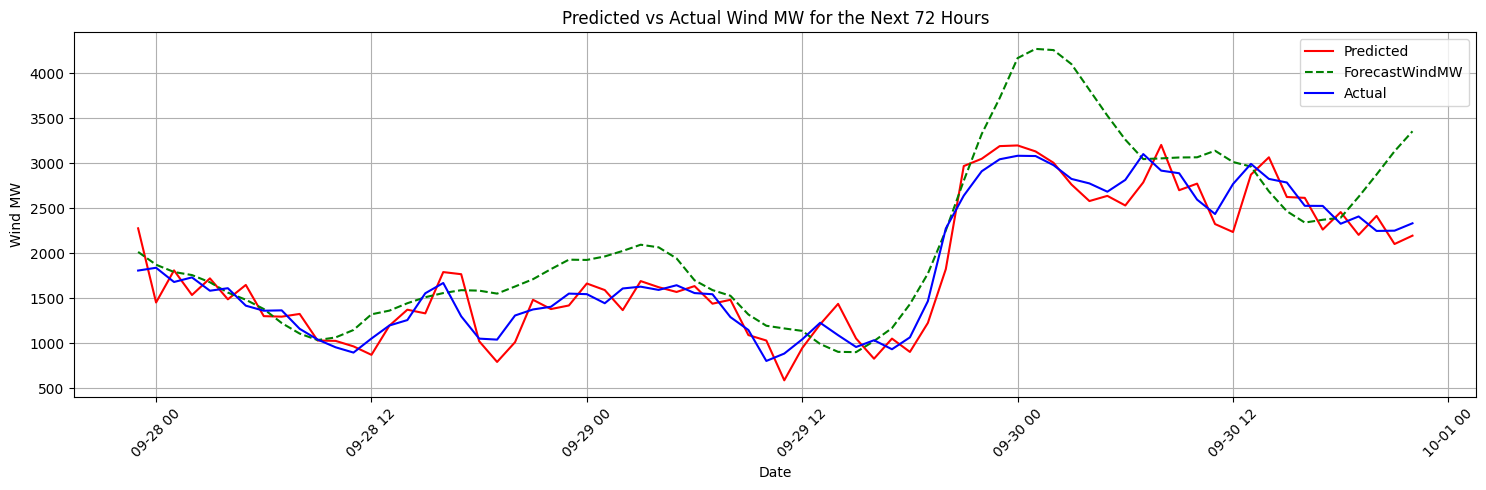

In [11]:

# The index for predictions should match the last 72 observations
predictions_index = data_filtered.index[-72:]  # Ensure this index is correct

# Create a DataFrame for predictions with the correct future index
predictions_df = pd.DataFrame(y_pred, index=predictions_index, columns=['Predicted'])

# Ensure actuals_df aligns with these 72 predictions
actuals_df = pd.DataFrame(data_filtered['ActualWindMW'].iloc[-72:].values, index=predictions_index, columns=['Actual'])

# Ensure forecast_wind_df is prepared correctly for the last 72 hours as well
forecast_wind_df = pd.DataFrame(data['ForecastWndMW'].iloc[-72:].values, index=predictions_index, columns=['ForecastWindMW'])

# Combine all three DataFrames
combined_df = pd.concat([predictions_df, actuals_df, forecast_wind_df], axis=1)

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(combined_df.index, combined_df['Predicted'], 'r-', label='Predicted')
plt.plot(combined_df.index, combined_df['ForecastWindMW'], 'g--', label='ForecastWindMW')
plt.plot(combined_df.index, combined_df['Actual'], 'b-', label='Actual')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Wind MW')
plt.title('Predicted vs Actual Wind MW for the Next 72 Hours')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



1 month

In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
data['season'] = (data['date'].dt.month % 12 + 3) // 3  # Divide months into seasons (1: Winter, 2: Spring, 3: Summer, 4: Fall)

# Simplify the dataset to include only necessary features
# Converting 'date' to datetime format and setting it as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Including specified features plus creating additional necessary features for modeling
selected_columns = [
    'Year', 'Month', 'DayTime', 'hour', 'isweekday', 'season',
    'average_temp', 'average_wind_speed', 'average_wind_dir', 'average_rain',
    'ActualWindMW'  # Target variable
]
# Filter the dataset to include only the selected columns
data_filtered = data[selected_columns]

# Generate lag features for ActualWindMW for 24 hours
for lag in range(1, 25):
    data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)

data_filtered['wind_power_lag48'] = data_filtered['ActualWindMW'].shift(48)
data_filtered['wind_power_lag72'] = data_filtered['ActualWindMW'].shift(72)
data_filtered['wind_power_lag48'] = data_filtered['ActualWindMW'].shift(124)
data_filtered['wind_power_lag72'] = data_filtered['ActualWindMW'].shift(250)
# Adding rolling averages and differences for 'ActualWindMW'
data_filtered['rolling_avg_wind'] = data_filtered['ActualWindMW'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_power'] = data_filtered['ActualWindMW'].diff().shift(1)


data_filtered['rolling_avg_wind_SPEED'] = data_filtered['average_wind_speed'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_SPEED'] = data_filtered['average_wind_speed'].diff().shift(1)

data_filtered['rolling_avg_wind_dir'] = data_filtered['average_wind_dir'].rolling(window=3).mean().shift(1)
data_filtered['diff_wind_dir'] = data_filtered['average_wind_dir'].diff().shift(1)
# Dropping rows with NaN values created by lagging
# Shift the target variable by one hour into the future
data_filtered['ActualWindMW_target'] = data_filtered['ActualWindMW'].shift(-1)

data_filtered.dropna(inplace=True)

data_filtered.head()


<ipython-input-14-2bac7c63762e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-14-2bac7c63762e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'ActualWindMW_lag{lag}'] = data_filtered['ActualWindMW'].shift(lag)
<ipython-input-14-2bac7c63762e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Year Month    DayTime  hour  isweekday  season  \
date                                                                  
2017-01-11 10:00:00  2017   Jan  11, 10:00    10       True       1   
2017-01-11 11:00:00  2017   Jan  11, 11:00    11       True       1   
2017-01-11 12:00:00  2017   Jan  11, 12:00    12       True       1   
2017-01-11 13:00:00  2017   Jan  11, 13:00    13       True       1   
2017-01-11 14:00:00  2017   Jan  11, 14:00    14       True       1   

                     average_temp  average_wind_speed  average_wind_dir  \
date                                                                      
2017-01-11 10:00:00      8.833333            8.833333        196.666667   
2017-01-11 11:00:00      9.833333            9.833333        201.666667   
2017-01-11 12:00:00      9.333333            9.333333        205.000000   
2017-01-11 13:00:00      9.333333            9.333333        218.333333   
2017-01-11 14:00:00      8.500000            8.500000        220.000000   

                     average_rain  ...  ActualWindMW_lag24  wind_power_lag48  \
date                               ...                                         
2017-01-11 10:00:00      0.300000  ...              2009.0            1155.0   
2017-01-11 11:00:00      0.000000  ...              2225.0            1035.0   
2017-01-11 12:00:00      0.166667  ...              2508.0             887.0   
2017-01-11 13:00:00      0.133333  ...              2699.0             868.0   
2017-01-11 14:00:00      0.133333  ...              2679.0             807.0   

                     wind_power_lag72  rolling_avg_wind  diff_wind_power  \
date                                                                       
2017-01-11 10:00:00            1214.0            2776.0            -14.0   
2017-01-11 11:00:00            1123.0            2737.0            -77.0   
2017-01-11 12:00:00            1528.0            2681.0            -77.0   
2017-01-11 13:00:00            1612.0            2631.0              4.0   
2017-01-11 14:00:00            1473.0            2623.0             49.0   

                     rolling_avg_wind_SPEED  diff_wind_SPEED  \
date                                                           
2017-01-11 10:00:00                8.888889        -0.500000   
2017-01-11 11:00:00                8.555556         0.666667   
2017-01-11 12:00:00                8.944444         1.000000   
2017-01-11 13:00:00                9.333333        -0.500000   
2017-01-11 14:00:00                9.500000         0.000000   

                     rolling_avg_wind_dir  diff_wind_dir  ActualWindMW_target  
date                                                                           
2017-01-11 10:00:00            195.000000      -1.666667               2604.0  
2017-01-11 11:00:00            195.000000       3.333333               2608.0  
2017-01-11 12:00:00            197.222222       5.000000               2657.0  
2017-01-11 13:00:00            201.111111       3.333333               2675.0  
2017-01-11 14:00:00            208.333333      13.333333               2627.0  

[5 rows x 44 columns]

In [15]:
# Encoding categorical variables
le = LabelEncoder()
data_filtered['Month'] = le.fit_transform(data_filtered['Month'])

# Splitting the dataset into training and testing sets

training_data = data_filtered.iloc[:-720]
testing_data = data_filtered.iloc[-720:]

# Exclude target variable and non-numeric 'DayTime'
X_train = training_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_train = training_data['ActualWindMW_target']

X_test = testing_data.drop(['ActualWindMW', 'ActualWindMW_target', 'DayTime'], axis=1)
y_test = testing_data['ActualWindMW_target']
# Step 5: Model Selection
from sklearn.linear_model import LinearRegression
# Step 6: Model Training
model = LinearRegression()
model.fit(X_train , y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import numpy as np
# Step 7: Model Evaluation
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

cv = np.std(y_test) / np.mean(y_test)
print(f'Coefficient of Variation: {cv}')

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred)
print(f'Explained Variance Score: {evs}')
import numpy as np

# Ensure y_test and y_pred are correctly aligned and both are numpy arrays or similar structures that support element-wise operations
# Calculate the MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Mean Squared Error: 33737.76061518797
R-squared: 0.9415832862813227
Root Mean Squared Error: 183.6784163019378
Coefficient of Variation: 0.8715475084854781
Explained Variance Score: 0.9419939632317428
Mean Absolute Percentage Error (MAPE): 25.984809139251862%


<ipython-input-15-4739bb396fab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Month'] = le.fit_transform(data_filtered['Month'])


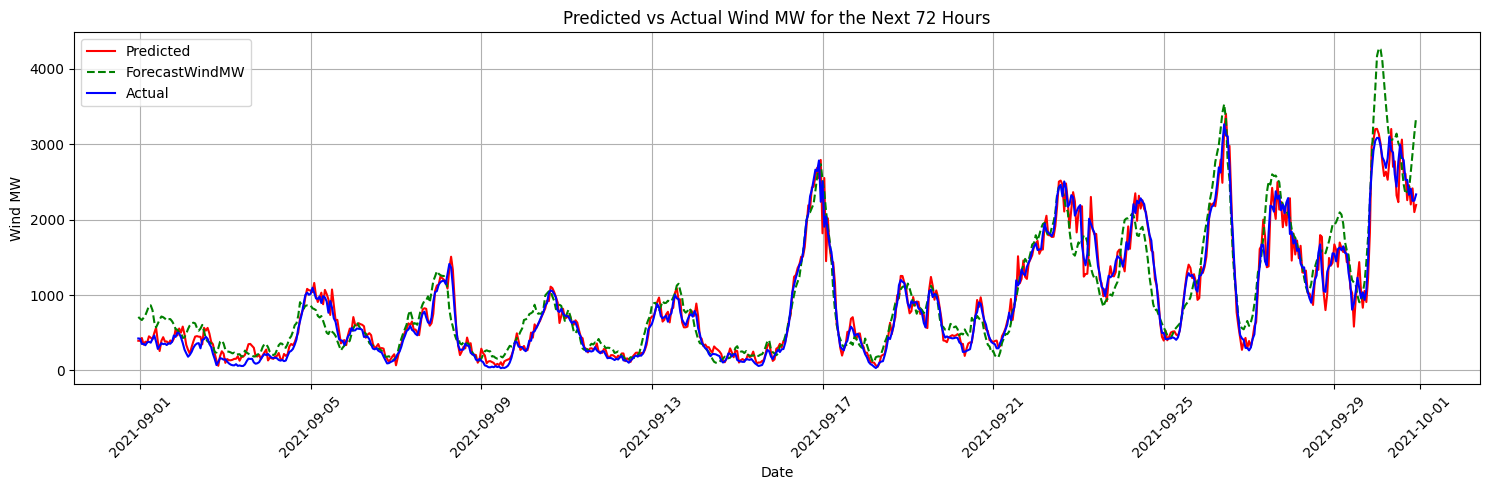

In [16]:

# The index for predictions should match the last 72 observations
predictions_index = data_filtered.index[-720:]  # Ensure this index is correct

# Create a DataFrame for predictions with the correct future index
predictions_df = pd.DataFrame(y_pred, index=predictions_index, columns=['Predicted'])

# Ensure actuals_df aligns with these 72 predictions
actuals_df = pd.DataFrame(data_filtered['ActualWindMW'].iloc[-720:].values, index=predictions_index, columns=['Actual'])

# Ensure forecast_wind_df is prepared correctly for the last 72 hours as well
forecast_wind_df = pd.DataFrame(data['ForecastWndMW'].iloc[-720:].values, index=predictions_index, columns=['ForecastWindMW'])

# Combine all three DataFrames
combined_df = pd.concat([predictions_df, actuals_df, forecast_wind_df], axis=1)

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(combined_df.index, combined_df['Predicted'], 'r-', label='Predicted')
plt.plot(combined_df.index, combined_df['ForecastWindMW'], 'g--', label='ForecastWindMW')
plt.plot(combined_df.index, combined_df['Actual'], 'b-', label='Actual')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Wind MW')
plt.title('Predicted vs Actual Wind MW for the Next 72 Hours')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

### Autoregressive model


## Comparing models